#**Initialization**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np

#**Data**

In [2]:
data= pd.read_csv("TrainingDataCifar100Vgg19Size500.csv")
data_test=pd.read_csv("TestingDataCifar100Vgg19Size500.csv")

In [3]:
#github
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [4]:
Features = data.drop(classLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159'
 '160' '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171'
 '172' '173' '174' '175' '176' '177' '178' '179' '180' '181' '182

In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:

Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [7]:
iteration=len(X_t)

# **Classifier**

In [1015]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 500,nu = 10)
trainedModel = model.fit(X,Y)

# **Rule Data**

In [1016]:
trainedModel.export_iteration_tracking_data("iterationData_cifar100_Vgg19_500_XCS.csv")

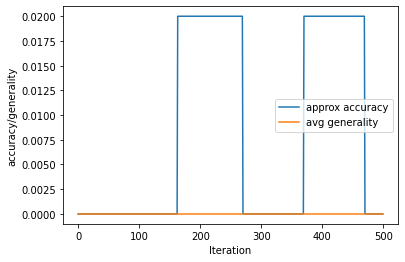

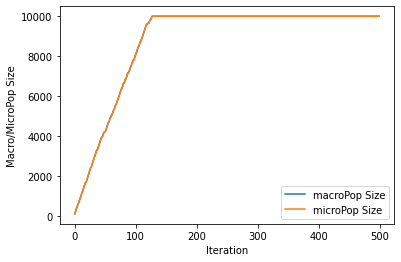

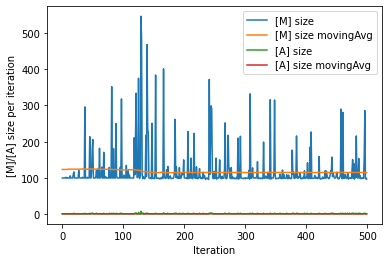

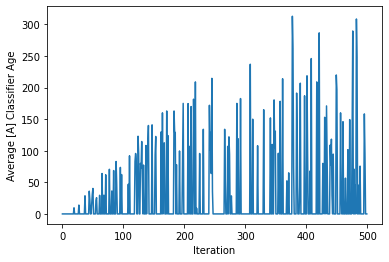

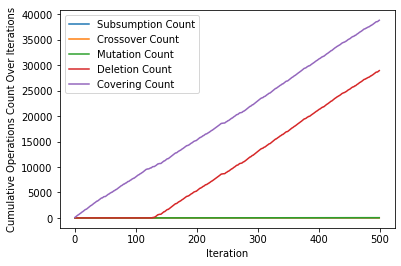

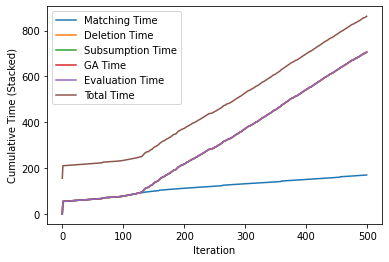

In [1017]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_cifar100_Vgg19_500_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [1018]:
trainedModel.export_final_rule_population("RulePopulationCifar100Vgg19500_XCS.csv",Features,classLabel)

populationData2 = pd.read_csv("RulePopulationCifar100Vgg19500_XCS.csv")
display(populationData2)

,0,1,2,3,4,5,6,7,8,9,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,#,"-6.2453186498,3.664890287799999",#,"-2.9986509811399995,7.6397456651399995","-8.59158677047,1.58533066647","-3.3707171632799997,4.98044025528",#,"-3.11984440256,6.37507411456","-6.223318386000001,2.9142907140000003","-3.9633519393700007,5.499787423370001",...,0.0,1.0,1,1.0,0,0,0.528,0.000099,0,4
1,"-4.36779228338,9.673588907380001",#,#,"-0.2367595441249999,4.877854228124999",#,#,#,"-1.2406417793799998,4.49587149138",#,"-2.6939064151000003,4.230341899100001",...,0.0,1.0,1,1.0,0,0,0.500,0.000099,0,2
2,"-2.69619928448,8.00199590848",#,"-8.655265159735,4.722794837735","-2.1803127775799998,6.82140746158",#,"-4.87856503052,6.488288122519999",#,#,"-7.137079296,3.828051624",#,...,0.0,1.0,1,1.0,0,0,0.490,0.000099,0,3
3,#,#,#,"-1.9757282266899998,6.616822910689999","-8.179009036540002,1.1727529325400008",#,"-9.412441053495,3.4323366074949995",#,#,"-3.7325436622300003,5.26897914623",...,0.0,1.0,1,1.0,0,0,0.454,0.000099,0,4
4,"-4.25635275012,9.56214937412","-8.655910013,6.0754816510000005","-9.39849071515,5.466020393150001",#,"-9.141690415710002,2.135434311710001",#,#,#,"-4.738456907250001,1.4294292352500002",#,...,0.0,1.0,1,1.0,0,0,0.526,0.000099,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,#,"-9.981740114599999,5.821025488599998","-0.6693420693150003,5.064112215315",#,"-11.02182393853,6.30644088653","-8.46372248788,4.526966829880001",#,#,"-11.739409827500001,4.2514060975",#,...,0.0,1.0,1,1.0,499,499,0.454,0.000099,0,1
9996,#,"-5.562322615399999,1.4016079894",#,#,"-7.858727978400001,3.143344926400001",#,#,"-7.091636280320001,3.985768656320001",#,"-3.6323079829500005,4.44598171695",...,0.0,1.0,1,1.0,499,499,0.484,0.000099,0,1
9997,#,#,"-5.341045560495001,9.735815706495","-5.783289624815,7.923875284814999","-12.39708305163,7.68169999963","-7.99976929796,4.063013639959999","-6.655869531775,2.8197861197750007","-4.0255688425,0.9197012185000002",#,#,...,0.0,1.0,1,1.0,499,499,0.516,0.000099,0,1
9998,"-9.226685925560002,3.254541799560001","-9.847818372199999,5.687103746199998","-4.38546984639,8.780239992390001","-5.783289624815,7.923875284814999","-8.271305712330001,3.5559226603300003",#,#,"-4.5200958486000005,1.4142282246",#,#,...,0.0,1.0,1,1.0,499,499,0.524,0.000099,0,1


# **Real curve LCS**

##**0-19**

###**0-9**

#### Class 0

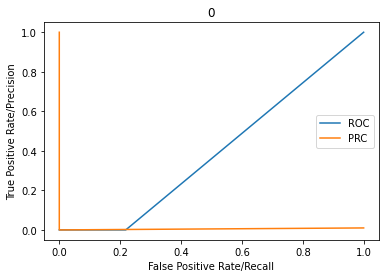

PRC AUC:0.005
ROC AUC:0.3908080808080808


In [1019]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [1020]:
score_true_1=[]

In [1021]:
for x in range(0,iteration):
  if probs[x][0]>=0.5:
    score_true_1.append(1)
  else:
    score_true_1.append(0)

score_true_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1022]:
score_true_correct_index_1_LCS=[]
score_true_wrong_index_1_LCS=[]

In [1023]:
for x in range(0,iteration):
  if score_true_1[x]!=Y_test[x,0]:
    score_true_wrong_index_1_LCS.append(x+1)
  else:
    score_true_correct_index_1_LCS.append(x+1)

In [1024]:
correct_0=len(score_true_correct_index_1_LCS)
accuracy_1=correct_0/iteration

#### Class 1

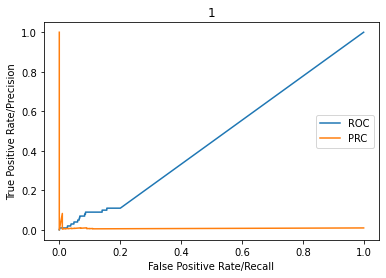

PRC AUC:0.008094168097887877
ROC AUC:0.45804848484848487


In [1025]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

In [1026]:
score_true_2=[]

In [1027]:
for x in range(0,iteration):
  if probs[x][1]>=0.5:
    score_true_2.append(1)
  else:
    score_true_2.append(0)

score_true_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1028]:
score_true_correct_index_2_LCS=[]
score_true_wrong_index_2_LCS=[]

In [1029]:
for x in range(0,iteration):
  if score_true_2[x]!=Y_test[x,1]:
    score_true_wrong_index_2_LCS.append(x+1)
  else:
    score_true_correct_index_2_LCS.append(x+1)

In [1030]:
correct_1=len(score_true_correct_index_2_LCS)
accuracy_2=correct_1/iteration

#### Class 2

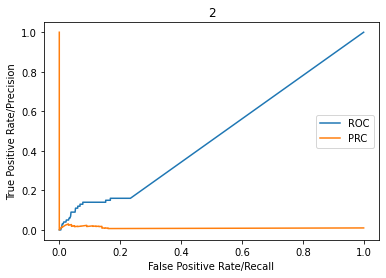

PRC AUC:0.009958460853802696
ROC AUC:0.4735489898989899


In [1031]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [1032]:
score_true_3=[]

In [1033]:
for x in range(0,iteration):
  if probs[x][2]>=0.5:
    score_true_3.append(1)
  else:
    score_true_3.append(0)

score_true_3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [1034]:
score_true_correct_index_3_LCS=[]
score_true_wrong_index_3_LCS=[]

In [1035]:
for x in range(0,iteration):
  if score_true_3[x]!=Y_test[x,2]:
    score_true_wrong_index_3_LCS.append(x+1)
  else:
    score_true_correct_index_3_LCS.append(x+1)

In [1036]:
correct_2=len(score_true_correct_index_3_LCS)
accuracy_3=correct_2/iteration

#### Class 3

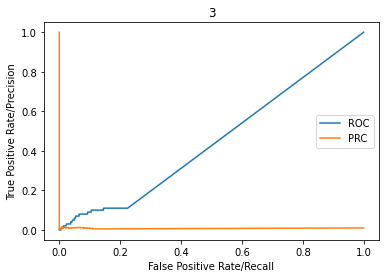

PRC AUC:0.007750246964423282
ROC AUC:0.4487661616161616


In [1037]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

In [1038]:
score_true_4=[]

In [1039]:
for x in range(0,iteration):
  if probs[x][3]>=0.5:
    score_true_4.append(1)
  else:
    score_true_4.append(0)

score_true_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1040]:
score_true_correct_index_4_LCS=[]
score_true_wrong_index_4_LCS=[]

In [1041]:
for x in range(0,iteration):
  if score_true_4[x]!=Y_test[x,3]:
    score_true_wrong_index_4_LCS.append(x+1)
  else:
    score_true_correct_index_4_LCS.append(x+1)

In [1042]:
correct_3=len(score_true_correct_index_4_LCS)
accuracy_4=correct_3/iteration

#### Class 4

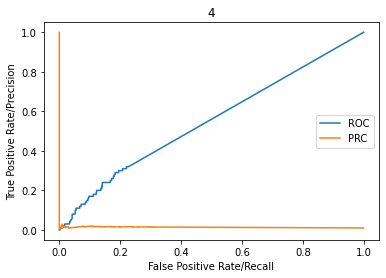

PRC AUC:0.013090161993244958
ROC AUC:0.5495353535353535


In [1043]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

In [1044]:
score_true_5=[]

In [1045]:
for x in range(0,iteration):
  if probs[x][4]>=0.5:
    score_true_5.append(1)
  else:
    score_true_5.append(0)

score_true_5

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1046]:
score_true_correct_index_5_LCS=[]
score_true_wrong_index_5_LCS=[]

In [1047]:
for x in range(0,iteration):
  if score_true_5[x]!=Y_test[x,4]:
    score_true_wrong_index_5_LCS.append(x+1)
  else:
    score_true_correct_index_5_LCS.append(x+1)

In [1048]:
correct_4=len(score_true_correct_index_5_LCS)
accuracy_5=correct_4/iteration

#### Class 5

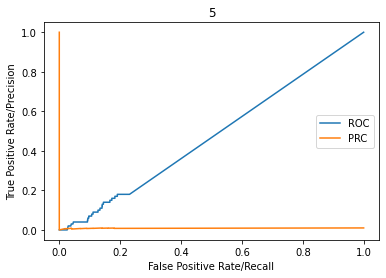

PRC AUC:0.008618459128684372
ROC AUC:0.47502070707070704


In [1049]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

In [1050]:
score_true_6=[]

In [1051]:
for x in range(0,iteration):
  if probs[x][5]>=0.5:
    score_true_6.append(1)
  else:
    score_true_6.append(0)

score_true_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1052]:
score_true_correct_index_6_LCS=[]
score_true_wrong_index_6_LCS=[]

In [1053]:
for x in range(0,iteration):
  if score_true_6[x]!=Y_test[x,5]:
    score_true_wrong_index_6_LCS.append(x+1)
  else:
    score_true_correct_index_6_LCS.append(x+1)

In [1054]:
correct_5=len(score_true_correct_index_6_LCS)
accuracy_6=correct_5/iteration

#### Class 6

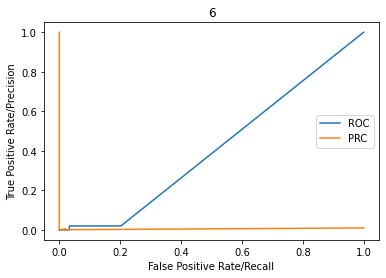

PRC AUC:0.005449019018718264
ROC AUC:0.41020202020202023


In [1055]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

In [1056]:
score_true_7=[]

In [1057]:
for x in range(0,iteration):
  if probs[x][6]>=0.5:
    score_true_7.append(1)
  else:
    score_true_7.append(0)

score_true_7

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1058]:
score_true_correct_index_7_LCS=[]
score_true_wrong_index_7_LCS=[]

In [1059]:
for x in range(0,iteration):
  if score_true_7[x]!=Y_test[x,6]:
    score_true_wrong_index_7_LCS.append(x+1)
  else:
    score_true_correct_index_7_LCS.append(x+1)

In [1060]:
correct_6=len(score_true_correct_index_7_LCS)
accuracy_7=correct_6/iteration

#### Class 7

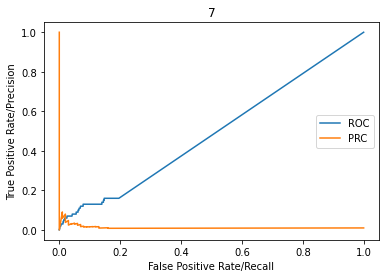

PRC AUC:0.01164520285309044
ROC AUC:0.4889747474747474


In [1061]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

In [1062]:
score_true_8=[]

In [1063]:
for x in range(0,iteration):
  if probs[x][7]>=0.5:
    score_true_8.append(1)
  else:
    score_true_8.append(0)

score_true_8

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1064]:
score_true_correct_index_8_LCS=[]
score_true_wrong_index_8_LCS=[]

In [1065]:
for x in range(0,iteration):
  if score_true_8[x]!=Y_test[x,7]:
    score_true_wrong_index_8_LCS.append(x+1)
  else:
    score_true_correct_index_8_LCS.append(x+1)

In [1066]:
correct_7=len(score_true_correct_index_8_LCS)
accuracy_8=correct_7/iteration

#### Class 8

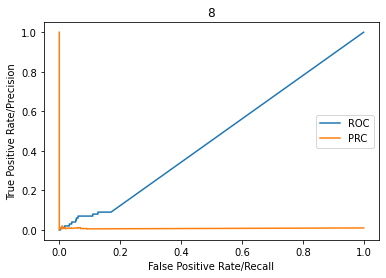

PRC AUC:0.007748348463533315
ROC AUC:0.46261212121212125


In [1067]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

In [1068]:
score_true_9=[]

In [1069]:
for x in range(0,iteration):
  if probs[x][8]>=0.5:
    score_true_9.append(1)
  else:
    score_true_9.append(0)

score_true_9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1070]:
score_true_correct_index_9_LCS=[]
score_true_wrong_index_9_LCS=[]

In [1071]:
for x in range(0,iteration):
  if score_true_9[x]!=Y_test[x,8]:
    score_true_wrong_index_9_LCS.append(x+1)
  else:
    score_true_correct_index_9_LCS.append(x+1)

In [1072]:
correct_8=len(score_true_correct_index_9_LCS)
accuracy_9=correct_8/iteration

#### Class 9

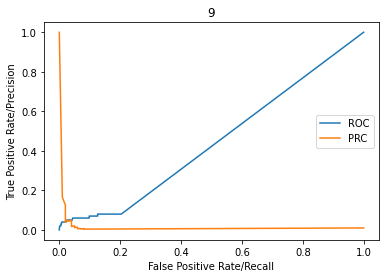

PRC AUC:0.015054168563025126
ROC AUC:0.44332373737373737


In [1073]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [1074]:
score_true_10=[]

In [1075]:
for x in range(0,iteration):
  if probs[x][9]>=0.5:
    score_true_10.append(1)
  else:
    score_true_10.append(0)

score_true_10

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1076]:
score_true_correct_index_10_LCS=[]
score_true_wrong_index_10_LCS=[]

In [1077]:
for x in range(0,iteration):
  if score_true_10[x]!=Y_test[x,9]:
    score_true_wrong_index_10_LCS.append(x+1)
  else:
    score_true_correct_index_10_LCS.append(x+1)

In [1078]:
correct_9=len(score_true_correct_index_10_LCS)
accuracy_10=correct_9/iteration

###**10-19**

#### Class 10

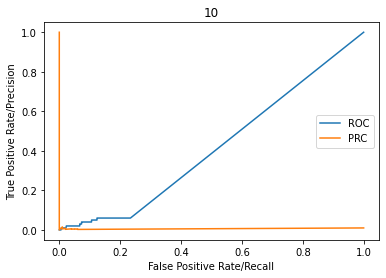

PRC AUC:0.0062306091469198945
ROC AUC:0.4161575757575757


In [1079]:
fpr11, tpr11, thresholds11 = roc_curve(Y_test[:,10], probs[:,10])
prec11, recall11, thresholds11 = precision_recall_curve(Y_test[:,10], probs[:,10])

plt.plot(fpr11,tpr11,label="ROC")
plt.plot(recall11,prec11,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('10')
plt.show()

print("PRC AUC:" + str(auc(recall11, prec11)))
print("ROC AUC:" + str(auc(fpr11, tpr11)))

In [1080]:
score_true_11=[]

In [1081]:
for x in range(0,iteration):
  if probs[x][10]>=0.5:
    score_true_11.append(1)
  else:
    score_true_11.append(0)

score_true_11

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1082]:
score_true_correct_index_11_LCS=[]
score_true_wrong_index_11_LCS=[]

In [1083]:
for x in range(0,iteration):
  if score_true_11[x]!=Y_test[x,10]:
    score_true_wrong_index_11_LCS.append(x+1)
  else:
    score_true_correct_index_11_LCS.append(x+1)

In [1084]:
correct_10=len(score_true_correct_index_11_LCS)
accuracy_11=correct_10/iteration

#### Class 11

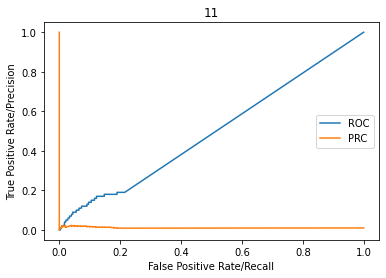

PRC AUC:0.010638313383503937
ROC AUC:0.495210101010101


In [1085]:
fpr12, tpr12, thresholds12 = roc_curve(Y_test[:,11], probs[:, 11])
prec12, recall12, thresholds12 = precision_recall_curve(Y_test[:,11], probs[:, 11])

plt.plot(fpr12,tpr12,label="ROC")
plt.plot(recall12,prec12,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('11')
plt.show()

print("PRC AUC:" + str(auc(recall12, prec12)))
print("ROC AUC:" + str(auc(fpr12, tpr12)))

In [1086]:
score_true_12=[]

In [1087]:
for x in range(0,iteration):
  if probs[x][11]>=0.5:
    score_true_12.append(1)
  else:
    score_true_12.append(0)

score_true_12

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1088]:
score_true_correct_index_12_LCS=[]
score_true_wrong_index_12_LCS=[]

In [1089]:
for x in range(0,iteration):
  if score_true_12[x]!=Y_test[x,11]:
    score_true_wrong_index_12_LCS.append(x+1)
  else:
    score_true_correct_index_12_LCS.append(x+1)

In [1090]:
correct_11=len(score_true_correct_index_12_LCS)
accuracy_12=correct_11/iteration

#### Class 12

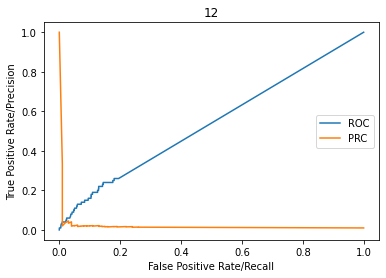

PRC AUC:0.020274125315884146
ROC AUC:0.5380252525252526


In [1091]:
fpr13, tpr13, thresholds13 = roc_curve(Y_test[:,12], probs[:, 12])
prec13, recall13, thresholds13 = precision_recall_curve(Y_test[:,12], probs[:, 12])

plt.plot(fpr13,tpr13,label="ROC")
plt.plot(recall13,prec13,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('12')
plt.show()

print("PRC AUC:" + str(auc(recall13, prec13)))
print("ROC AUC:" + str(auc(fpr13, tpr13)))

In [1092]:
score_true_13=[]

In [1093]:
for x in range(0,iteration):
  if probs[x][12]>=0.5:
    score_true_13.append(1)
  else:
    score_true_13.append(0)

score_true_13

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1094]:
score_true_correct_index_13_LCS=[]
score_true_wrong_index_13_LCS=[]

In [1095]:
for x in range(0,iteration):
  if score_true_13[x]!=Y_test[x,12]:
    score_true_wrong_index_13_LCS.append(x+1)
  else:
    score_true_correct_index_13_LCS.append(x+1)

In [1096]:
correct_12=len(score_true_correct_index_13_LCS)
accuracy_13=correct_12/iteration

#### Class 13

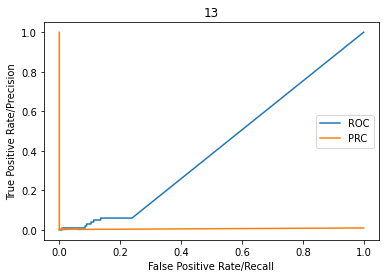

PRC AUC:0.006101364174474556
ROC AUC:0.41230757575757576


In [1097]:
fpr14, tpr14, thresholds14 = roc_curve(Y_test[:,13], probs[:, 13])
prec14, recall14, thresholds14 = precision_recall_curve(Y_test[:,13], probs[:, 13])

plt.plot(fpr14,tpr14,label="ROC")
plt.plot(recall14,prec14,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('13')
plt.show()

print("PRC AUC:" + str(auc(recall14, prec14)))
print("ROC AUC:" + str(auc(fpr14, tpr14)))

In [1098]:
score_true_14=[]

In [1099]:
for x in range(0,iteration):
  if probs[x][13]>=0.5:
    score_true_14.append(1)
  else:
    score_true_14.append(0)

score_true_14

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1100]:
score_true_correct_index_14_LCS=[]
score_true_wrong_index_14_LCS=[]

In [1101]:
for x in range(0,iteration):
  if score_true_14[x]!=Y_test[x,13]:
    score_true_wrong_index_14_LCS.append(x+1)
  else:
    score_true_correct_index_14_LCS.append(x+1)

In [1102]:
correct_13=len(score_true_correct_index_14_LCS)
accuracy_14=correct_13/iteration

#### Class 14

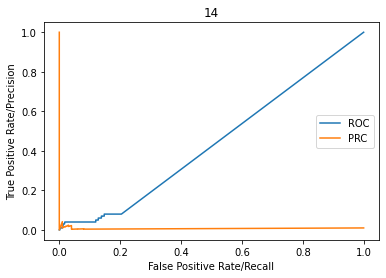

PRC AUC:0.007337843511184791
ROC AUC:0.4403772727272728


In [1103]:
fpr15, tpr15, thresholds15 = roc_curve(Y_test[:,14], probs[:, 14])
prec15, recall15, thresholds15 = precision_recall_curve(Y_test[:,14], probs[:, 14])

plt.plot(fpr15,tpr15,label="ROC")
plt.plot(recall15,prec15,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('14')
plt.show()

print("PRC AUC:" + str(auc(recall15, prec15)))
print("ROC AUC:" + str(auc(fpr15, tpr15)))

In [1104]:
score_true_15=[]

In [1105]:
for x in range(0,iteration):
  if probs[x][14]>=0.5:
    score_true_15.append(1)
  else:
    score_true_15.append(0)

score_true_15

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1106]:
score_true_correct_index_15_LCS=[]
score_true_wrong_index_15_LCS=[]

In [1107]:
for x in range(0,iteration):
  if score_true_15[x]!=Y_test[x,14]:
    score_true_wrong_index_15_LCS.append(x+1)
  else:
    score_true_correct_index_15_LCS.append(x+1)

In [1108]:
correct_14=len(score_true_correct_index_15_LCS)
accuracy_15=correct_14/iteration

#### Class 15

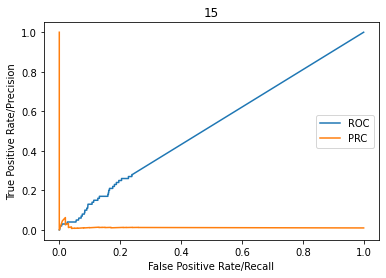

PRC AUC:0.011757649936770486
ROC AUC:0.5208146464646464


In [1109]:
fpr16, tpr16, thresholds16 = roc_curve(Y_test[:,15], probs[:, 15])
prec16, recall16, thresholds16 = precision_recall_curve(Y_test[:,15], probs[:, 15])

plt.plot(fpr16,tpr16,label="ROC")
plt.plot(recall16,prec16,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('15')
plt.show()

print("PRC AUC:" + str(auc(recall16, prec16)))
print("ROC AUC:" + str(auc(fpr16, tpr16)))

In [1110]:
score_true_16=[]

In [1111]:
for x in range(0,iteration):
  if probs[x][15]>=0.5:
    score_true_16.append(1)
  else:
    score_true_16.append(0)

score_true_16

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1112]:
score_true_correct_index_16_LCS=[]
score_true_wrong_index_16_LCS=[]

In [1113]:
for x in range(0,iteration):
  if score_true_16[x]!=Y_test[x,15]:
    score_true_wrong_index_16_LCS.append(x+1)
  else:
    score_true_correct_index_16_LCS.append(x+1)

In [1114]:
correct_15=len(score_true_correct_index_16_LCS)
accuracy_16=correct_15/iteration

#### Class 16

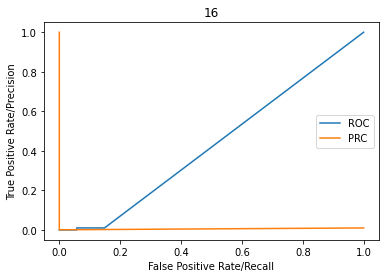

PRC AUC:0.005295262345807622
ROC AUC:0.43092525252525254


In [1115]:
fpr17, tpr17, thresholds17 = roc_curve(Y_test[:,16], probs[:, 16])
prec17, recall17, thresholds17 = precision_recall_curve(Y_test[:,16], probs[:, 16])

plt.plot(fpr17,tpr17,label="ROC")
plt.plot(recall17,prec17,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('16')
plt.show()

print("PRC AUC:" + str(auc(recall17, prec17)))
print("ROC AUC:" + str(auc(fpr17, tpr17)))

In [1116]:
score_true_17=[]

In [1117]:
for x in range(0,iteration):
  if probs[x][16]>=0.5:
    score_true_17.append(1)
  else:
    score_true_17.append(0)

score_true_17

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1118]:
score_true_correct_index_17_LCS=[]
score_true_wrong_index_17_LCS=[]

In [1119]:
for x in range(0,iteration):
  if score_true_17[x]!=Y_test[x,16]:
    score_true_wrong_index_17_LCS.append(x+1)
  else:
    score_true_correct_index_17_LCS.append(x+1)

In [1120]:
correct_16=len(score_true_correct_index_17_LCS)
accuracy_17=correct_16/iteration

#### Class 17

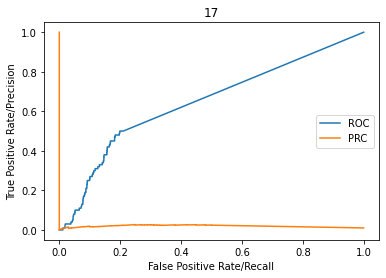

PRC AUC:0.01893592906929284
ROC AUC:0.6443984848484848


In [1121]:
fpr18, tpr18, thresholds18 = roc_curve(Y_test[:,17], probs[:, 17])
prec18, recall18, thresholds18 = precision_recall_curve(Y_test[:,17], probs[:, 17])

plt.plot(fpr18,tpr18,label="ROC")
plt.plot(recall18,prec18,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('17')
plt.show()

print("PRC AUC:" + str(auc(recall18, prec18)))
print("ROC AUC:" + str(auc(fpr18, tpr18)))

In [1122]:
score_true_18=[]

In [1123]:
for x in range(0,iteration):
  if probs[x][17]>=0.5:
    score_true_18.append(1)
  else:
    score_true_18.append(0)

score_true_18

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1124]:
score_true_correct_index_18_LCS=[]
score_true_wrong_index_18_LCS=[]

In [1125]:
for x in range(0,iteration):
  if score_true_18[x]!=Y_test[x,17]:
    score_true_wrong_index_18_LCS.append(x+1)
  else:
    score_true_correct_index_18_LCS.append(x+1)

In [1126]:
correct_17=len(score_true_correct_index_18_LCS)
accuracy_18=correct_17/iteration

#### Class 18

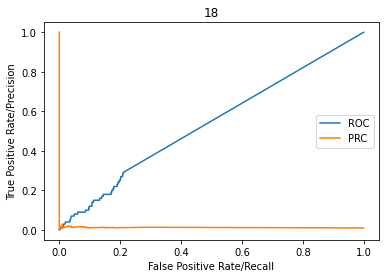

PRC AUC:0.012215880092445992
ROC AUC:0.5367777777777778


In [1127]:
fpr19, tpr19, thresholds19 = roc_curve(Y_test[:,18], probs[:, 18])
prec19, recall19, thresholds19 = precision_recall_curve(Y_test[:,18], probs[:, 18])

plt.plot(fpr19,tpr19,label="ROC")
plt.plot(recall19,prec19,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('18')
plt.show()

print("PRC AUC:" + str(auc(recall19, prec19)))
print("ROC AUC:" + str(auc(fpr19, tpr19)))

In [1128]:
score_true_19=[]

In [1129]:
for x in range(0,iteration):
  if probs[x][18]>=0.5:
    score_true_19.append(1)
  else:
    score_true_19.append(0)

score_true_19

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1130]:
score_true_correct_index_19_LCS=[]
score_true_wrong_index_19_LCS=[]

In [1131]:
for x in range(0,iteration):
  if score_true_19[x]!=Y_test[x,18]:
    score_true_wrong_index_19_LCS.append(x+1)
  else:
    score_true_correct_index_19_LCS.append(x+1)

In [1132]:
correct_18=len(score_true_correct_index_19_LCS)
accuracy_19=correct_18/iteration

#### Class 19

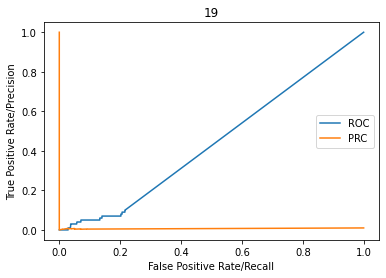

PRC AUC:0.0070565183138387244
ROC AUC:0.4415297979797981


In [1133]:
fpr20, tpr20, thresholds20 = roc_curve(Y_test[:,19], probs[:, 19])
prec20, recall20, thresholds20 = precision_recall_curve(Y_test[:,19], probs[:, 19])

plt.plot(fpr20,tpr20,label="ROC")
plt.plot(recall20,prec20,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('19')
plt.show()

print("PRC AUC:" + str(auc(recall20, prec20)))
print("ROC AUC:" + str(auc(fpr20, tpr20)))

In [1134]:
score_true_20=[]

In [1135]:
for x in range(0,iteration):
  if probs[x][19]>=0.5:
    score_true_20.append(1)
  else:
    score_true_20.append(0)

score_true_20

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1136]:
score_true_correct_index_20_LCS=[]
score_true_wrong_index_20_LCS=[]

In [1137]:
for x in range(0,iteration):
  if score_true_20[x]!=Y_test[x,19]:
    score_true_wrong_index_20_LCS.append(x+1)
  else:
    score_true_correct_index_20_LCS.append(x+1)

In [1138]:
correct_19=len(score_true_correct_index_20_LCS)
accuracy_20=correct_19/iteration

##**20-39**

###**20-29**

#### Class 20

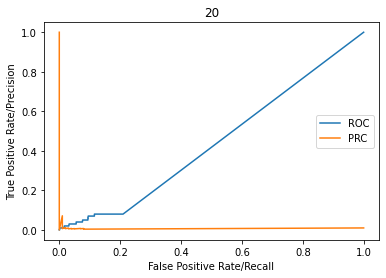

PRC AUC:0.007213636383216565
ROC AUC:0.43883636363636364


In [1139]:
fpr21, tpr21, thresholds21 = roc_curve(Y_test[:,20], probs[:,20])
prec21, recall21, thresholds21 = precision_recall_curve(Y_test[:,20], probs[:,20])

plt.plot(fpr21,tpr21,label="ROC")
plt.plot(recall21,prec21,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('20')
plt.show()

print("PRC AUC:" + str(auc(recall21, prec21)))
print("ROC AUC:" + str(auc(fpr21, tpr21)))

In [1140]:
score_true_21=[]

In [1141]:
for x in range(0,iteration):
  if probs[x][20]>=0.5:
    score_true_21.append(1)
  else:
    score_true_21.append(0)

score_true_21

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1142]:
score_true_correct_index_21_LCS=[]
score_true_wrong_index_21_LCS=[]

In [1143]:
for x in range(0,iteration):
  if score_true_21[x]!=Y_test[x,20]:
    score_true_wrong_index_21_LCS.append(x+1)
  else:
    score_true_correct_index_21_LCS.append(x+1)

In [1144]:
correct_20=len(score_true_correct_index_21_LCS)
accuracy_21=correct_20/iteration

#### Class 21

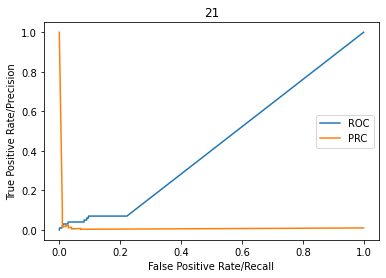

PRC AUC:0.012298071579964749
ROC AUC:0.4284934343434344


In [1145]:
fpr22, tpr22, thresholds22 = roc_curve(Y_test[:,21], probs[:, 21])
prec22, recall22, thresholds22 = precision_recall_curve(Y_test[:,21], probs[:, 21])

plt.plot(fpr22,tpr22,label="ROC")
plt.plot(recall22,prec22,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('21')
plt.show()

print("PRC AUC:" + str(auc(recall22, prec22)))
print("ROC AUC:" + str(auc(fpr22, tpr22)))

In [1146]:
score_true_22=[]

In [1147]:
for x in range(0,iteration):
  if probs[x][21]>=0.5:
    score_true_22.append(1)
  else:
    score_true_22.append(0)

score_true_22

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1148]:
score_true_correct_index_22_LCS=[]
score_true_wrong_index_22_LCS=[]

In [1149]:
for x in range(0,iteration):
  if score_true_22[x]!=Y_test[x,21]:
    score_true_wrong_index_22_LCS.append(x+1)
  else:
    score_true_correct_index_22_LCS.append(x+1)

In [1150]:
correct_21=len(score_true_correct_index_22_LCS)
accuracy_22=correct_21/iteration

#### Class 22

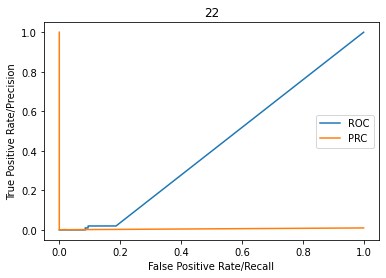

PRC AUC:0.005452207318587307
ROC AUC:0.41683434343434345


In [1151]:
fpr23, tpr23, thresholds23 = roc_curve(Y_test[:,22], probs[:, 22])
prec23, recall23, thresholds23 = precision_recall_curve(Y_test[:,22], probs[:, 22])

plt.plot(fpr23,tpr23,label="ROC")
plt.plot(recall23,prec23,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('22')
plt.show()

print("PRC AUC:" + str(auc(recall23, prec23)))
print("ROC AUC:" + str(auc(fpr23, tpr23)))

In [1152]:
score_true_23=[]

In [1153]:
for x in range(0,iteration):
  if probs[x][22]>=0.5:
    score_true_23.append(1)
  else:
    score_true_23.append(0)

score_true_23

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1154]:
score_true_correct_index_23_LCS=[]
score_true_wrong_index_23_LCS=[]

In [1155]:
for x in range(0,iteration):
  if score_true_23[x]!=Y_test[x,22]:
    score_true_wrong_index_23_LCS.append(x+1)
  else:
    score_true_correct_index_23_LCS.append(x+1)

In [1156]:
correct_22=len(score_true_correct_index_23_LCS)
accuracy_23=correct_22/iteration

#### Class 23

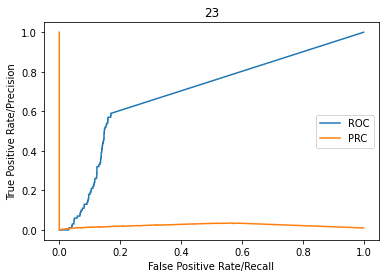

PRC AUC:0.022205292446299856
ROC AUC:0.6918651515151515


In [1157]:
fpr24, tpr24, thresholds24 = roc_curve(Y_test[:,23], probs[:, 23])
prec24, recall24, thresholds24 = precision_recall_curve(Y_test[:,23], probs[:, 23])

plt.plot(fpr24,tpr24,label="ROC")
plt.plot(recall24,prec24,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('23')
plt.show()

print("PRC AUC:" + str(auc(recall24, prec24)))
print("ROC AUC:" + str(auc(fpr24, tpr24)))

In [1158]:
score_true_24=[]

In [1159]:
for x in range(0,iteration):
  if probs[x][23]>=0.5:
    score_true_24.append(1)
  else:
    score_true_24.append(0)

score_true_24

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1160]:
score_true_correct_index_24_LCS=[]
score_true_wrong_index_24_LCS=[]

In [1161]:
for x in range(0,iteration):
  if score_true_24[x]!=Y_test[x,23]:
    score_true_wrong_index_24_LCS.append(x+1)
  else:
    score_true_correct_index_24_LCS.append(x+1)

In [1162]:
correct_23=len(score_true_correct_index_24_LCS)
accuracy_24=correct_23/iteration

#### Class 24

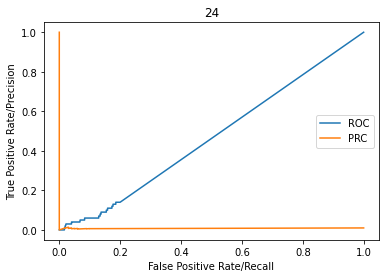

PRC AUC:0.008274768133224518
ROC AUC:0.4691126262626263


In [1163]:
fpr25, tpr25, thresholds25 = roc_curve(Y_test[:,24], probs[:, 24])
prec25, recall25, thresholds25 = precision_recall_curve(Y_test[:,24], probs[:, 24])

plt.plot(fpr25,tpr25,label="ROC")
plt.plot(recall25,prec25,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('24')
plt.show()

print("PRC AUC:" + str(auc(recall25, prec25)))
print("ROC AUC:" + str(auc(fpr25, tpr25)))

In [1164]:
score_true_25=[]

In [1165]:
for x in range(0,iteration):
  if probs[x][24]>=0.5:
    score_true_25.append(1)
  else:
    score_true_25.append(0)

score_true_25

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1166]:
score_true_correct_index_25_LCS=[]
score_true_wrong_index_25_LCS=[]

In [1167]:
for x in range(0,iteration):
  if score_true_25[x]!=Y_test[x,24]:
    score_true_wrong_index_25_LCS.append(x+1)
  else:
    score_true_correct_index_25_LCS.append(x+1)

In [1168]:
correct_24=len(score_true_correct_index_25_LCS)
accuracy_25=correct_24/iteration

#### Class 25

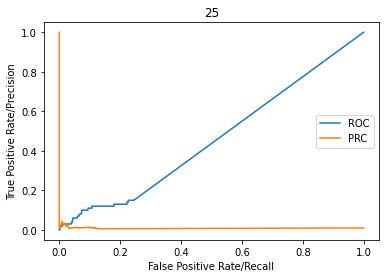

PRC AUC:0.00879282289957963
ROC AUC:0.4584292929292929


In [1169]:
fpr26, tpr26, thresholds26 = roc_curve(Y_test[:,25], probs[:, 25])
prec26, recall26, thresholds26 = precision_recall_curve(Y_test[:,25], probs[:, 25])

plt.plot(fpr26,tpr26,label="ROC")
plt.plot(recall26,prec26,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('25')
plt.show()

print("PRC AUC:" + str(auc(recall26, prec26)))
print("ROC AUC:" + str(auc(fpr26, tpr26)))

In [1170]:
score_true_26=[]

In [1171]:
for x in range(0,iteration):
  if probs[x][25]>=0.5:
    score_true_26.append(1)
  else:
    score_true_26.append(0)

score_true_26

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [1172]:
score_true_correct_index_26_LCS=[]
score_true_wrong_index_26_LCS=[]

In [1173]:
for x in range(0,iteration):
  if score_true_26[x]!=Y_test[x,25]:
    score_true_wrong_index_26_LCS.append(x+1)
  else:
    score_true_correct_index_26_LCS.append(x+1)

In [1174]:
correct_25=len(score_true_correct_index_26_LCS)
accuracy_26=correct_25/iteration

#### Class 26

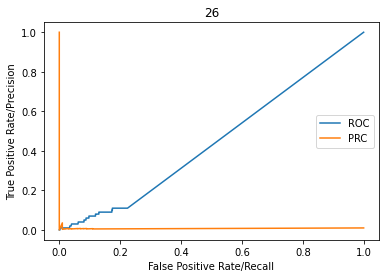

PRC AUC:0.007418613848660903
ROC AUC:0.4452621212121212


In [1175]:
fpr27, tpr27, thresholds27 = roc_curve(Y_test[:,26], probs[:, 26])
prec27, recall27, thresholds27 = precision_recall_curve(Y_test[:,26], probs[:, 26])

plt.plot(fpr27,tpr27,label="ROC")
plt.plot(recall27,prec27,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('26')
plt.show()

print("PRC AUC:" + str(auc(recall27, prec27)))
print("ROC AUC:" + str(auc(fpr27, tpr27)))

In [1176]:
score_true_27=[]

In [1177]:
for x in range(0,iteration):
  if probs[x][26]>=0.5:
    score_true_27.append(1)
  else:
    score_true_27.append(0)

score_true_27

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1178]:
score_true_correct_index_27_LCS=[]
score_true_wrong_index_27_LCS=[]

In [1179]:
for x in range(0,iteration):
  if score_true_27[x]!=Y_test[x,26]:
    score_true_wrong_index_27_LCS.append(x+1)
  else:
    score_true_correct_index_27_LCS.append(x+1)

In [1180]:
correct_26=len(score_true_correct_index_27_LCS)
accuracy_27=correct_26/iteration

#### Class 27

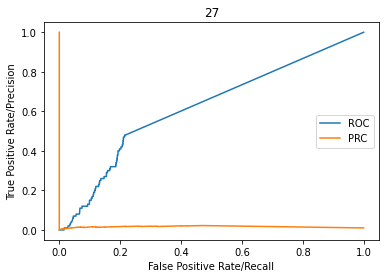

PRC AUC:0.016150528226899677
ROC AUC:0.620350505050505


In [1181]:
fpr28, tpr28, thresholds28 = roc_curve(Y_test[:,27], probs[:, 27])
prec28, recall28, thresholds28 = precision_recall_curve(Y_test[:,27], probs[:, 27])

plt.plot(fpr28,tpr28,label="ROC")
plt.plot(recall28,prec28,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('27')
plt.show()

print("PRC AUC:" + str(auc(recall28, prec28)))
print("ROC AUC:" + str(auc(fpr28, tpr28)))

In [1182]:
score_true_28=[]

In [1183]:
for x in range(0,iteration):
  if probs[x][27]>=0.5:
    score_true_28.append(1)
  else:
    score_true_28.append(0)

score_true_28

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1184]:
score_true_correct_index_28_LCS=[]
score_true_wrong_index_28_LCS=[]

In [1185]:
for x in range(0,iteration):
  if score_true_28[x]!=Y_test[x,27]:
    score_true_wrong_index_28_LCS.append(x+1)
  else:
    score_true_correct_index_28_LCS.append(x+1)

In [1186]:
correct_27=len(score_true_correct_index_28_LCS)
accuracy_28=correct_27/iteration

#### Class 28

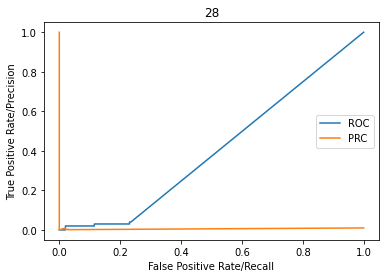

PRC AUC:0.005759520928764556
ROC AUC:0.40326414141414146


In [1187]:
fpr29, tpr29, thresholds29 = roc_curve(Y_test[:,28], probs[:, 28])
prec29, recall29, thresholds29 = precision_recall_curve(Y_test[:,28], probs[:, 28])

plt.plot(fpr29,tpr29,label="ROC")
plt.plot(recall29,prec29,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('28')
plt.show()

print("PRC AUC:" + str(auc(recall29, prec29)))
print("ROC AUC:" + str(auc(fpr29, tpr29)))

In [1188]:
score_true_29=[]

In [1189]:
for x in range(0,iteration):
  if probs[x][28]>=0.5:
    score_true_29.append(1)
  else:
    score_true_29.append(0)

score_true_29

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1190]:
score_true_correct_index_29_LCS=[]
score_true_wrong_index_29_LCS=[]

In [1191]:
for x in range(0,iteration):
  if score_true_29[x]!=Y_test[x,28]:
    score_true_wrong_index_29_LCS.append(x+1)
  else:
    score_true_correct_index_29_LCS.append(x+1)

In [1192]:
correct_28=len(score_true_correct_index_29_LCS)
accuracy_29=correct_28/iteration

#### Class 29

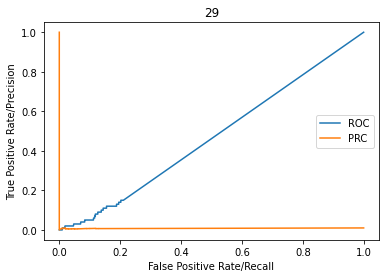

PRC AUC:0.008236061435550494
ROC AUC:0.46829141414141406


In [1193]:
fpr30, tpr30, thresholds30 = roc_curve(Y_test[:,29], probs[:, 29])
prec30, recall30, thresholds30 = precision_recall_curve(Y_test[:,29], probs[:, 29])

plt.plot(fpr30,tpr30,label="ROC")
plt.plot(recall30,prec30,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('29')
plt.show()

print("PRC AUC:" + str(auc(recall30, prec30)))
print("ROC AUC:" + str(auc(fpr30, tpr30)))

In [1194]:
score_true_30=[]

In [1195]:
for x in range(0,iteration):
  if probs[x][29]>=0.5:
    score_true_30.append(1)
  else:
    score_true_30.append(0)

score_true_30

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1196]:
score_true_correct_index_30_LCS=[]
score_true_wrong_index_30_LCS=[]

In [1197]:
for x in range(0,iteration):
  if score_true_30[x]!=Y_test[x,29]:
    score_true_wrong_index_30_LCS.append(x+1)
  else:
    score_true_correct_index_30_LCS.append(x+1)

In [1198]:
correct_29=len(score_true_correct_index_30_LCS)
accuracy_30=correct_29/iteration

###**30-39**

#### Class 30

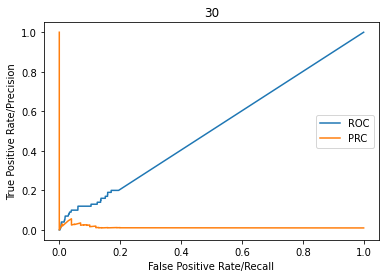

PRC AUC:0.012325512890071597
ROC AUC:0.5076676767676768


In [1199]:
fpr31, tpr31, thresholds31 = roc_curve(Y_test[:,30], probs[:,30])
prec31, recall31, thresholds31 = precision_recall_curve(Y_test[:,30], probs[:,30])

plt.plot(fpr31,tpr31,label="ROC")
plt.plot(recall31,prec31,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('30')
plt.show()

print("PRC AUC:" + str(auc(recall31, prec31)))
print("ROC AUC:" + str(auc(fpr31, tpr31)))

In [1200]:
score_true_31=[]

In [1201]:
for x in range(0,iteration):
  if probs[x][30]>=0.5:
    score_true_31.append(1)
  else:
    score_true_31.append(0)

score_true_31

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1202]:
score_true_correct_index_31_LCS=[]
score_true_wrong_index_31_LCS=[]

In [1203]:
for x in range(0,iteration):
  if score_true_31[x]!=Y_test[x,30]:
    score_true_wrong_index_31_LCS.append(x+1)
  else:
    score_true_correct_index_31_LCS.append(x+1)

In [1204]:
correct_30=len(score_true_correct_index_31_LCS)
accuracy_31=correct_30/iteration

#### Class 31

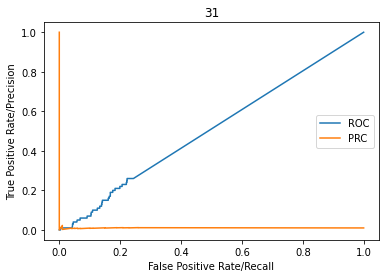

PRC AUC:0.010042944064934653
ROC AUC:0.5054979797979798


In [1205]:
fpr32, tpr32, thresholds32 = roc_curve(Y_test[:,31], probs[:, 31])
prec32, recall32, thresholds32 = precision_recall_curve(Y_test[:,31], probs[:, 31])

plt.plot(fpr32,tpr32,label="ROC")
plt.plot(recall32,prec32,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('31')
plt.show()

print("PRC AUC:" + str(auc(recall32, prec32)))
print("ROC AUC:" + str(auc(fpr32, tpr32)))

In [1206]:
score_true_32=[]

In [1207]:
for x in range(0,iteration):
  if probs[x][31]>=0.5:
    score_true_32.append(1)
  else:
    score_true_32.append(0)

score_true_32

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1208]:
score_true_correct_index_32_LCS=[]
score_true_wrong_index_32_LCS=[]

In [1209]:
for x in range(0,iteration):
  if score_true_32[x]!=Y_test[x,31]:
    score_true_wrong_index_32_LCS.append(x+1)
  else:
    score_true_correct_index_32_LCS.append(x+1)

In [1210]:
correct_31=len(score_true_correct_index_32_LCS)
accuracy_32=correct_31/iteration

#### Class 32

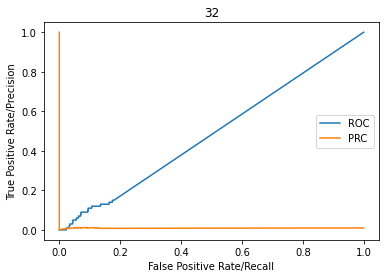

PRC AUC:0.009135842281579439
ROC AUC:0.48668333333333325


In [1211]:
fpr33, tpr33, thresholds33 = roc_curve(Y_test[:,32], probs[:, 32])
prec33, recall33, thresholds33 = precision_recall_curve(Y_test[:,32], probs[:, 32])

plt.plot(fpr33,tpr33,label="ROC")
plt.plot(recall33,prec33,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('32')
plt.show()

print("PRC AUC:" + str(auc(recall33, prec33)))
print("ROC AUC:" + str(auc(fpr33, tpr33)))

In [1212]:
score_true_33=[]

In [1213]:
for x in range(0,iteration):
  if probs[x][32]>=0.5:
    score_true_33.append(1)
  else:
    score_true_33.append(0)

score_true_33

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1214]:
score_true_correct_index_33_LCS=[]
score_true_wrong_index_33_LCS=[]

In [1215]:
for x in range(0,iteration):
  if score_true_33[x]!=Y_test[x,32]:
    score_true_wrong_index_33_LCS.append(x+1)
  else:
    score_true_correct_index_33_LCS.append(x+1)

In [1216]:
correct_32=len(score_true_correct_index_33_LCS)
accuracy_33=correct_32/iteration

#### Class 33

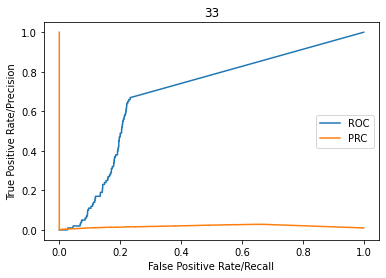

PRC AUC:0.018399872328180876
ROC AUC:0.6868318181818182


In [1217]:
fpr34, tpr34, thresholds34 = roc_curve(Y_test[:,33], probs[:, 33])
prec34, recall34, thresholds34 = precision_recall_curve(Y_test[:,33], probs[:, 33])

plt.plot(fpr34,tpr34,label="ROC")
plt.plot(recall34,prec34,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('33')
plt.show()

print("PRC AUC:" + str(auc(recall34, prec34)))
print("ROC AUC:" + str(auc(fpr34, tpr34)))

In [1218]:
score_true_34=[]

In [1219]:
for x in range(0,iteration):
  if probs[x][33]>=0.5:
    score_true_34.append(1)
  else:
    score_true_34.append(0)

score_true_34

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1220]:
score_true_correct_index_34_LCS=[]
score_true_wrong_index_34_LCS=[]

In [1221]:
for x in range(0,iteration):
  if score_true_34[x]!=Y_test[x,33]:
    score_true_wrong_index_34_LCS.append(x+1)
  else:
    score_true_correct_index_34_LCS.append(x+1)

In [1222]:
correct_33=len(score_true_correct_index_34_LCS)
accuracy_34=correct_33/iteration

#### Class 34

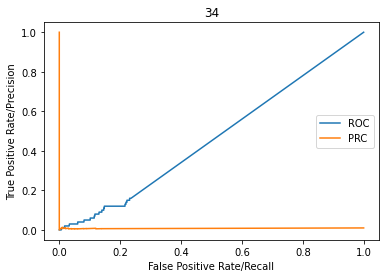

PRC AUC:0.00812021154238783
ROC AUC:0.4612338383838384


In [1223]:
fpr35, tpr35, thresholds35 = roc_curve(Y_test[:,34], probs[:, 34])
prec35, recall35, thresholds35 = precision_recall_curve(Y_test[:,34], probs[:, 34])

plt.plot(fpr35,tpr35,label="ROC")
plt.plot(recall35,prec35,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('34')
plt.show()

print("PRC AUC:" + str(auc(recall35, prec35)))
print("ROC AUC:" + str(auc(fpr35, tpr35)))

In [1224]:
score_true_35=[]

In [1225]:
for x in range(0,iteration):
  if probs[x][34]>=0.5:
    score_true_35.append(1)
  else:
    score_true_35.append(0)

score_true_35

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1226]:
score_true_correct_index_35_LCS=[]
score_true_wrong_index_35_LCS=[]

In [1227]:
for x in range(0,iteration):
  if score_true_35[x]!=Y_test[x,34]:
    score_true_wrong_index_35_LCS.append(x+1)
  else:
    score_true_correct_index_35_LCS.append(x+1)

In [1228]:
correct_34=len(score_true_correct_index_35_LCS)
accuracy_35=correct_34/iteration

#### Class 35

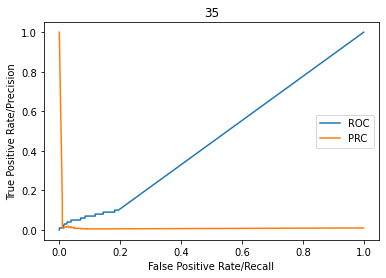

PRC AUC:0.013399283494644754
ROC AUC:0.4556742424242425


In [1229]:
fpr36, tpr36, thresholds36 = roc_curve(Y_test[:,35], probs[:, 35])
prec36, recall36, thresholds36 = precision_recall_curve(Y_test[:,35], probs[:, 35])

plt.plot(fpr36,tpr36,label="ROC")
plt.plot(recall36,prec36,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('35')
plt.show()

print("PRC AUC:" + str(auc(recall36, prec36)))
print("ROC AUC:" + str(auc(fpr36, tpr36)))

In [1230]:
score_true_36=[]

In [1231]:
for x in range(0,iteration):
  if probs[x][35]>=0.5:
    score_true_36.append(1)
  else:
    score_true_36.append(0)

score_true_36

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1232]:
score_true_correct_index_36_LCS=[]
score_true_wrong_index_36_LCS=[]

In [1233]:
for x in range(0,iteration):
  if score_true_36[x]!=Y_test[x,35]:
    score_true_wrong_index_36_LCS.append(x+1)
  else:
    score_true_correct_index_36_LCS.append(x+1)

In [1234]:
correct_35=len(score_true_correct_index_36_LCS)
accuracy_36=correct_35/iteration

#### Class 36

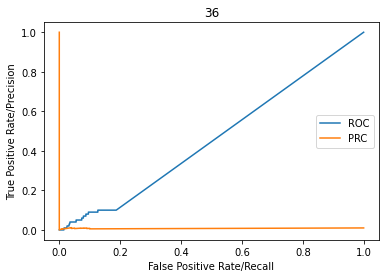

PRC AUC:0.007676505454616889
ROC AUC:0.4595702020202021


In [1235]:
fpr37, tpr37, thresholds37 = roc_curve(Y_test[:,36], probs[:, 36])
prec37, recall37, thresholds37 = precision_recall_curve(Y_test[:,36], probs[:, 36])

plt.plot(fpr37,tpr37,label="ROC")
plt.plot(recall37,prec37,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('36')
plt.show()

print("PRC AUC:" + str(auc(recall37, prec37)))
print("ROC AUC:" + str(auc(fpr37, tpr37)))

In [1236]:
score_true_37=[]

In [1237]:
for x in range(0,iteration):
  if probs[x][36]>=0.5:
    score_true_37.append(1)
  else:
    score_true_37.append(0)

score_true_37

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1238]:
score_true_correct_index_37_LCS=[]
score_true_wrong_index_37_LCS=[]

In [1239]:
for x in range(0,iteration):
  if score_true_37[x]!=Y_test[x,36]:
    score_true_wrong_index_37_LCS.append(x+1)
  else:
    score_true_correct_index_37_LCS.append(x+1)

In [1240]:
correct_36=len(score_true_correct_index_37_LCS)
accuracy_37=correct_36/iteration

#### Class 37

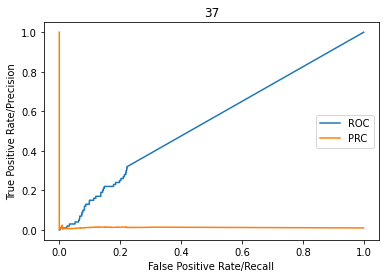

PRC AUC:0.012119244227762846
ROC AUC:0.5442353535353536


In [1241]:
fpr38, tpr38, thresholds38 = roc_curve(Y_test[:,37], probs[:, 37])
prec38, recall38, thresholds38 = precision_recall_curve(Y_test[:,37], probs[:,37])

plt.plot(fpr38,tpr38,label="ROC")
plt.plot(recall38,prec38,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('37')
plt.show()

print("PRC AUC:" + str(auc(recall38, prec38)))
print("ROC AUC:" + str(auc(fpr38, tpr38)))

In [1242]:
score_true_38=[]

In [1243]:
for x in range(0,iteration):
  if probs[x][37]>=0.5:
    score_true_38.append(1)
  else:
    score_true_38.append(0)

score_true_38

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1244]:
score_true_correct_index_38_LCS=[]
score_true_wrong_index_38_LCS=[]

In [1245]:
for x in range(0,iteration):
  if score_true_38[x]!=Y_test[x,37]:
    score_true_wrong_index_38_LCS.append(x+1)
  else:
    score_true_correct_index_38_LCS.append(x+1)

In [1246]:
correct_37=len(score_true_correct_index_38_LCS)
accuracy_38=correct_37/iteration

#### Class 38

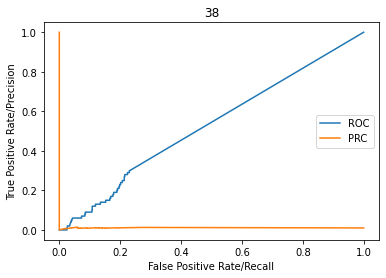

PRC AUC:0.011065754695175916
ROC AUC:0.5275212121212122


In [1247]:
fpr39, tpr39, thresholds39 = roc_curve(Y_test[:,38], probs[:, 38])
prec39, recall39, thresholds39 = precision_recall_curve(Y_test[:,38], probs[:, 38])

plt.plot(fpr39,tpr39,label="ROC")
plt.plot(recall39,prec39,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('38')
plt.show()

print("PRC AUC:" + str(auc(recall39, prec39)))
print("ROC AUC:" + str(auc(fpr39, tpr39)))

In [1248]:
score_true_39=[]

In [1249]:
for x in range(0,iteration):
  if probs[x][38]>=0.5:
    score_true_39.append(1)
  else:
    score_true_39.append(0)

score_true_39

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1250]:
score_true_correct_index_39_LCS=[]
score_true_wrong_index_39_LCS=[]

In [1251]:
for x in range(0,iteration):
  if score_true_39[x]!=Y_test[x,38]:
    score_true_wrong_index_39_LCS.append(x+1)
  else:
    score_true_correct_index_39_LCS.append(x+1)

In [1252]:
correct_38=len(score_true_correct_index_39_LCS)
accuracy_39=correct_38/iteration

#### Class 39

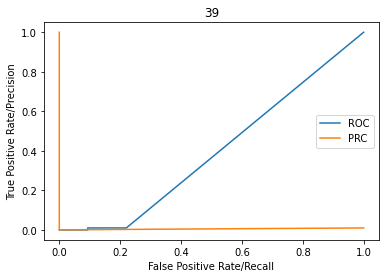

PRC AUC:0.00518237722813444
ROC AUC:0.39506969696969696


In [1253]:
fpr40, tpr40, thresholds40 = roc_curve(Y_test[:,39], probs[:,39])
prec40, recall40, thresholds40 = precision_recall_curve(Y_test[:,39], probs[:, 39])

plt.plot(fpr40,tpr40,label="ROC")
plt.plot(recall40,prec40,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('39')
plt.show()

print("PRC AUC:" + str(auc(recall40, prec40)))
print("ROC AUC:" + str(auc(fpr40, tpr40)))

In [1254]:
score_true_40=[]

In [1255]:
for x in range(0,iteration):
  if probs[x][39]>=0.5:
    score_true_40.append(1)
  else:
    score_true_40.append(0)

score_true_40

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1256]:
score_true_correct_index_40_LCS=[]
score_true_wrong_index_40_LCS=[]

In [1257]:
for x in range(0,iteration):
  if score_true_40[x]!=Y_test[x,39]:
    score_true_wrong_index_40_LCS.append(x+1)
  else:
    score_true_correct_index_40_LCS.append(x+1)

In [1258]:
correct_39=len(score_true_correct_index_40_LCS)
accuracy_40=correct_39/iteration

##**40-59**

###**40-49**

#### Class 40

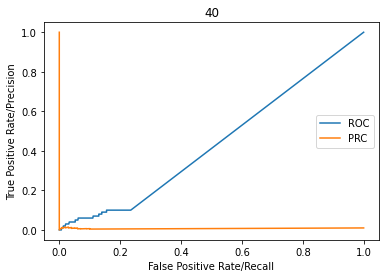

PRC AUC:0.007256036938476619
ROC AUC:0.43715151515151524


In [1259]:
fpr41, tpr41, thresholds41 = roc_curve(Y_test[:,40], probs[:,40])
prec41, recall41, thresholds41 = precision_recall_curve(Y_test[:,40], probs[:,40])

plt.plot(fpr41,tpr41,label="ROC")
plt.plot(recall41,prec41,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('40')
plt.show()

print("PRC AUC:" + str(auc(recall41, prec41)))
print("ROC AUC:" + str(auc(fpr41, tpr41)))

In [1260]:
score_true_41=[]

In [1261]:
for x in range(0,iteration):
  if probs[x][40]>=0.5:
    score_true_41.append(1)
  else:
    score_true_41.append(0)

score_true_41

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1262]:
score_true_correct_index_41_LCS=[]
score_true_wrong_index_41_LCS=[]

In [1263]:
for x in range(0,iteration):
  if score_true_41[x]!=Y_test[x,40]:
    score_true_wrong_index_41_LCS.append(x+1)
  else:
    score_true_correct_index_41_LCS.append(x+1)

In [1264]:
correct_40=len(score_true_correct_index_41_LCS)
accuracy_41=correct_40/iteration

#### Class 41

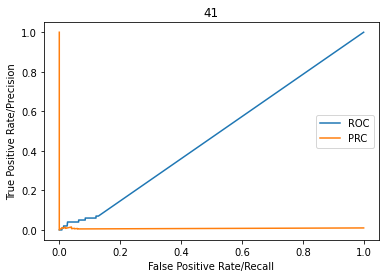

PRC AUC:0.007775501904338305
ROC AUC:0.4718520202020202


In [1265]:
fpr42, tpr42, thresholds42 = roc_curve(Y_test[:,41], probs[:, 41])
prec42, recall42, thresholds42 = precision_recall_curve(Y_test[:,41], probs[:, 41])

plt.plot(fpr42,tpr42,label="ROC")
plt.plot(recall42,prec42,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('41')
plt.show()

print("PRC AUC:" + str(auc(recall42, prec42)))
print("ROC AUC:" + str(auc(fpr42, tpr42)))

In [1266]:
score_true_42=[]

In [1267]:
for x in range(0,iteration):
  if probs[x][41]>=0.5:
    score_true_42.append(1)
  else:
    score_true_42.append(0)

score_true_42

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1268]:
score_true_correct_index_42_LCS=[]
score_true_wrong_index_42_LCS=[]

In [1269]:
for x in range(0,iteration):
  if score_true_42[x]!=Y_test[x,41]:
    score_true_wrong_index_42_LCS.append(x+1)
  else:
    score_true_correct_index_42_LCS.append(x+1)

In [1270]:
correct_41=len(score_true_correct_index_42_LCS)
accuracy_42=correct_41/iteration

#### Class 42

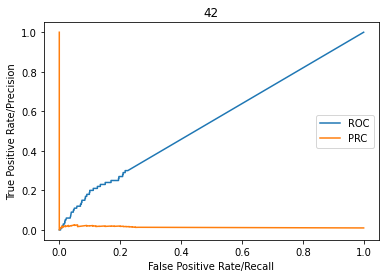

PRC AUC:0.013471889654422992
ROC AUC:0.5437969696969698


In [1271]:
fpr43, tpr43, thresholds43 = roc_curve(Y_test[:,42], probs[:, 42])
prec43, recall43, thresholds43 = precision_recall_curve(Y_test[:,42], probs[:,42])

plt.plot(fpr43,tpr43,label="ROC")
plt.plot(recall43,prec43,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('42')
plt.show()

print("PRC AUC:" + str(auc(recall43, prec43)))
print("ROC AUC:" + str(auc(fpr43, tpr43)))

In [1272]:
score_true_43=[]

In [1273]:
for x in range(0,iteration):
  if probs[x][42]>=0.5:
    score_true_43.append(1)
  else:
    score_true_43.append(0)

score_true_43

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1274]:
score_true_correct_index_43_LCS=[]
score_true_wrong_index_43_LCS=[]

In [1275]:
for x in range(0,iteration):
  if score_true_43[x]!=Y_test[x,42]:
    score_true_wrong_index_43_LCS.append(x+1)
  else:
    score_true_correct_index_43_LCS.append(x+1)

In [1276]:
correct_42=len(score_true_correct_index_43_LCS)
accuracy_43=correct_42/iteration

#### Class 43

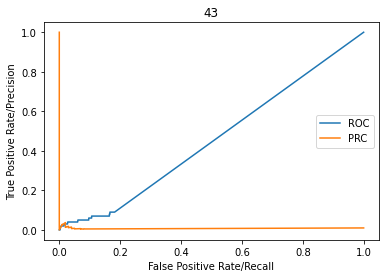

PRC AUC:0.007841984174772302
ROC AUC:0.4558676767676768


In [1277]:
fpr44, tpr44, thresholds44 = roc_curve(Y_test[:,43], probs[:,43])
prec44, recall44, thresholds24 = precision_recall_curve(Y_test[:,43], probs[:,43])

plt.plot(fpr44,tpr44,label="ROC")
plt.plot(recall44,prec44,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('43')
plt.show()

print("PRC AUC:" + str(auc(recall44, prec44)))
print("ROC AUC:" + str(auc(fpr44, tpr44)))

In [1278]:
score_true_44=[]

In [1279]:
for x in range(0,iteration):
  if probs[x][43]>=0.5:
    score_true_44.append(1)
  else:
    score_true_44.append(0)

score_true_44

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1280]:
score_true_correct_index_44_LCS=[]
score_true_wrong_index_44_LCS=[]

In [1281]:
for x in range(0,iteration):
  if score_true_44[x]!=Y_test[x,43]:
    score_true_wrong_index_44_LCS.append(x+1)
  else:
    score_true_correct_index_44_LCS.append(x+1)

In [1282]:
correct_43=len(score_true_correct_index_44_LCS)
accuracy_44=correct_43/iteration

#### Class 44

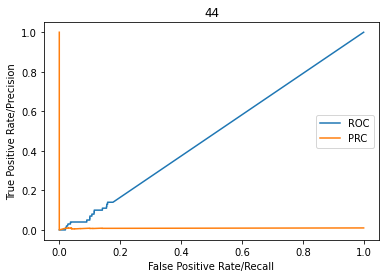

PRC AUC:0.0087071944111663
ROC AUC:0.48069898989898996


In [1283]:
fpr45, tpr45, thresholds45 = roc_curve(Y_test[:,44], probs[:, 44])
prec45, recall45, thresholds45 = precision_recall_curve(Y_test[:,44], probs[:,44])

plt.plot(fpr45,tpr45,label="ROC")
plt.plot(recall45,prec45,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('44')
plt.show()

print("PRC AUC:" + str(auc(recall45, prec45)))
print("ROC AUC:" + str(auc(fpr45, tpr45)))

In [1284]:
score_true_45=[]

In [1285]:
for x in range(0,iteration):
  if probs[x][44]>=0.5:
    score_true_45.append(1)
  else:
    score_true_45.append(0)

score_true_45

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1286]:
score_true_correct_index_45_LCS=[]
score_true_wrong_index_45_LCS=[]

In [1287]:
for x in range(0,iteration):
  if score_true_45[x]!=Y_test[x,44]:
    score_true_wrong_index_45_LCS.append(x+1)
  else:
    score_true_correct_index_45_LCS.append(x+1)

In [1288]:
correct_44=len(score_true_correct_index_45_LCS)
accuracy_45=correct_44/iteration

#### Class 45

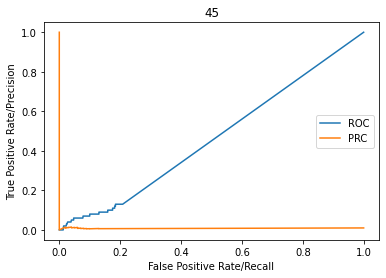

PRC AUC:0.008168919263617376
ROC AUC:0.4627297979797979


In [1289]:
fpr46, tpr46, thresholds46 = roc_curve(Y_test[:,45], probs[:, 45])
prec46, recall46, thresholds46 = precision_recall_curve(Y_test[:,45], probs[:, 45])

plt.plot(fpr46,tpr46,label="ROC")
plt.plot(recall46,prec46,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('45')
plt.show()

print("PRC AUC:" + str(auc(recall46, prec46)))
print("ROC AUC:" + str(auc(fpr46, tpr46)))

In [1290]:
score_true_46=[]

In [1291]:
for x in range(0,iteration):
  if probs[x][45]>=0.5:
    score_true_46.append(1)
  else:
    score_true_46.append(0)

score_true_46

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1292]:
score_true_correct_index_46_LCS=[]
score_true_wrong_index_46_LCS=[]

In [1293]:
for x in range(0,iteration):
  if score_true_46[x]!=Y_test[x,45]:
    score_true_wrong_index_46_LCS.append(x+1)
  else:
    score_true_correct_index_46_LCS.append(x+1)

In [1294]:
correct_45=len(score_true_correct_index_46_LCS)
accuracy_46=correct_45/iteration

#### Class 46

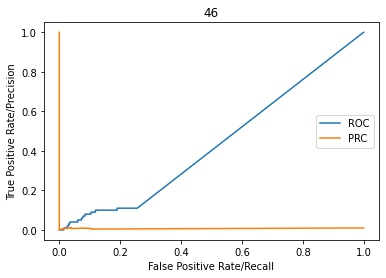

PRC AUC:0.007185083190095266
ROC AUC:0.4328242424242425


In [1295]:
fpr47, tpr47, thresholds47 = roc_curve(Y_test[:,46], probs[:, 46])
prec47, recall47, thresholds47 = precision_recall_curve(Y_test[:,46], probs[:, 46])

plt.plot(fpr47,tpr47,label="ROC")
plt.plot(recall47,prec47,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('46')
plt.show()

print("PRC AUC:" + str(auc(recall47, prec47)))
print("ROC AUC:" + str(auc(fpr47, tpr47)))

In [1296]:
score_true_47=[]

In [1297]:
for x in range(0,iteration):
  if probs[x][46]>=0.5:
    score_true_47.append(1)
  else:
    score_true_47.append(0)

score_true_47

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1298]:
score_true_correct_index_47_LCS=[]
score_true_wrong_index_47_LCS=[]

In [1299]:
for x in range(0,iteration):
  if score_true_47[x]!=Y_test[x,46]:
    score_true_wrong_index_47_LCS.append(x+1)
  else:
    score_true_correct_index_47_LCS.append(x+1)

In [1300]:
correct_46=len(score_true_correct_index_47_LCS)
accuracy_47=correct_46/iteration

#### Class 47

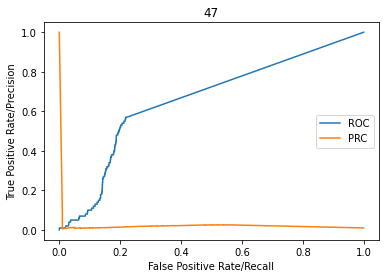

PRC AUC:0.022995475344351368
ROC AUC:0.6550101010101008


In [1301]:
fpr48, tpr48, thresholds48 = roc_curve(Y_test[:,47], probs[:, 47])
prec48, recall48, thresholds48 = precision_recall_curve(Y_test[:,47], probs[:, 47])

plt.plot(fpr48,tpr48,label="ROC")
plt.plot(recall48,prec48,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('47')
plt.show()

print("PRC AUC:" + str(auc(recall48, prec48)))
print("ROC AUC:" + str(auc(fpr48, tpr48)))

In [1302]:
score_true_48=[]

In [1303]:
for x in range(0,iteration):
  if probs[x][47]>=0.5:
    score_true_48.append(1)
  else:
    score_true_48.append(0)

score_true_48

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1304]:
score_true_correct_index_48_LCS=[]
score_true_wrong_index_48_LCS=[]

In [1305]:
for x in range(0,iteration):
  if score_true_48[x]!=Y_test[x,47]:
    score_true_wrong_index_48_LCS.append(x+1)
  else:
    score_true_correct_index_48_LCS.append(x+1)

In [1306]:
correct_47=len(score_true_correct_index_48_LCS)
accuracy_48=correct_47/iteration

#### Class 48

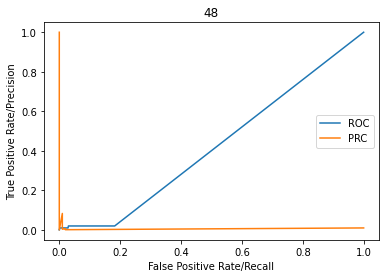

PRC AUC:0.005911004823849979
ROC AUC:0.42050959595959597


In [1307]:
fpr49, tpr49, thresholds49 = roc_curve(Y_test[:,48], probs[:,48])
prec49, recall49, thresholds49 = precision_recall_curve(Y_test[:,48], probs[:,48])

plt.plot(fpr49,tpr49,label="ROC")
plt.plot(recall49,prec49,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('48')
plt.show()

print("PRC AUC:" + str(auc(recall49, prec49)))
print("ROC AUC:" + str(auc(fpr49, tpr49)))

In [1308]:
score_true_49=[]

In [1309]:
for x in range(0,iteration):
  if probs[x][48]>=0.5:
    score_true_49.append(1)
  else:
    score_true_49.append(0)

score_true_49

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1310]:
score_true_correct_index_49_LCS=[]
score_true_wrong_index_49_LCS=[]

In [1311]:
for x in range(0,iteration):
  if score_true_49[x]!=Y_test[x,48]:
    score_true_wrong_index_49_LCS.append(x+1)
  else:
    score_true_correct_index_49_LCS.append(x+1)

In [1312]:
correct_48=len(score_true_correct_index_49_LCS)
accuracy_49=correct_48/iteration

#### Class 49

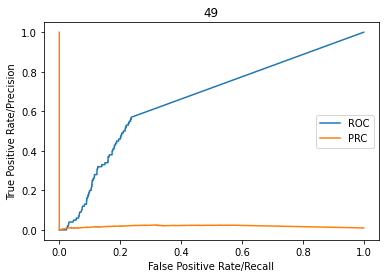

PRC AUC:0.018263174942170727
ROC AUC:0.6588242424242424


In [1313]:
fpr50, tpr50, thresholds50 = roc_curve(Y_test[:,49], probs[:,49])
prec50, recall50, thresholds50 = precision_recall_curve(Y_test[:,49], probs[:,49])

plt.plot(fpr50,tpr50,label="ROC")
plt.plot(recall50,prec50,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('49')
plt.show()

print("PRC AUC:" + str(auc(recall50, prec50)))
print("ROC AUC:" + str(auc(fpr50, tpr50)))

In [1314]:
score_true_50=[]

In [1315]:
for x in range(0,iteration):
  if probs[x][49]>=0.5:
    score_true_50.append(1)
  else:
    score_true_50.append(0)

score_true_50

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1316]:
score_true_correct_index_50_LCS=[]
score_true_wrong_index_50_LCS=[]

In [1317]:
for x in range(0,iteration):
  if score_true_50[x]!=Y_test[x,49]:
    score_true_wrong_index_50_LCS.append(x+1)
  else:
    score_true_correct_index_50_LCS.append(x+1)

In [1318]:
correct_49=len(score_true_correct_index_50_LCS)
accuracy_50=correct_49/iteration

###**50-59**

#### Class 50

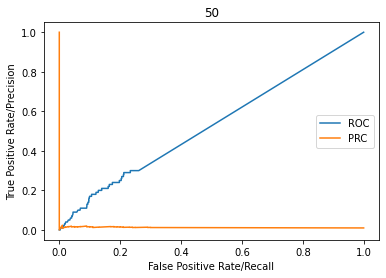

PRC AUC:0.011883025956900464
ROC AUC:0.5266873737373737


In [1319]:
fpr51, tpr51, thresholds51 = roc_curve(Y_test[:,50], probs[:,50])
prec51, recall51, thresholds51 = precision_recall_curve(Y_test[:,50], probs[:,50])

plt.plot(fpr51,tpr51,label="ROC")
plt.plot(recall51,prec51,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('50')
plt.show()

print("PRC AUC:" + str(auc(recall51, prec51)))
print("ROC AUC:" + str(auc(fpr51, tpr51)))

In [1320]:
score_true_51=[]

In [1321]:
for x in range(0,iteration):
  if probs[x][50]>=0.5:
    score_true_51.append(1)
  else:
    score_true_51.append(0)

score_true_51

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1322]:
score_true_correct_index_51_LCS=[]
score_true_wrong_index_51_LCS=[]

In [1323]:
for x in range(0,iteration):
  if score_true_51[x]!=Y_test[x,50]:
    score_true_wrong_index_51_LCS.append(x+1)
  else:
    score_true_correct_index_51_LCS.append(x+1)

In [1324]:
correct_50=len(score_true_correct_index_51_LCS)
accuracy_51=correct_50/iteration

#### Class 51

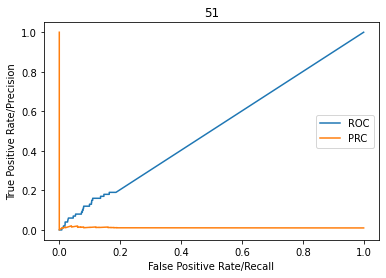

PRC AUC:0.010696097011087683
ROC AUC:0.505710606060606


In [1325]:
fpr52, tpr52, thresholds52 = roc_curve(Y_test[:,51], probs[:, 51])
prec52, recall52, thresholds52 = precision_recall_curve(Y_test[:,51], probs[:, 51])

plt.plot(fpr52,tpr52,label="ROC")
plt.plot(recall52,prec52,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('51')
plt.show()

print("PRC AUC:" + str(auc(recall52, prec52)))
print("ROC AUC:" + str(auc(fpr52, tpr52)))

In [1326]:
score_true_52=[]

In [1327]:
for x in range(0,iteration):
  if probs[x][51]>=0.5:
    score_true_52.append(1)
  else:
    score_true_52.append(0)

score_true_52

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1328]:
score_true_correct_index_52_LCS=[]
score_true_wrong_index_52_LCS=[]

In [1329]:
for x in range(0,iteration):
  if score_true_52[x]!=Y_test[x,51]:
    score_true_wrong_index_52_LCS.append(x+1)
  else:
    score_true_correct_index_52_LCS.append(x+1)

In [1330]:
correct_51=len(score_true_correct_index_52_LCS)
accuracy_52=correct_51/iteration

#### Class 52

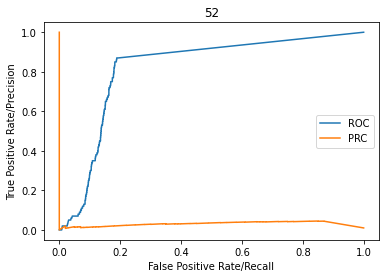

PRC AUC:0.030469703953592404
ROC AUC:0.8161707070707072


In [1331]:
fpr53, tpr53, thresholds53 = roc_curve(Y_test[:,52], probs[:, 52])
prec53, recall53, thresholds53 = precision_recall_curve(Y_test[:,52], probs[:,52])

plt.plot(fpr53,tpr53,label="ROC")
plt.plot(recall53,prec53,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('52')
plt.show()

print("PRC AUC:" + str(auc(recall53, prec53)))
print("ROC AUC:" + str(auc(fpr53, tpr53)))

In [1332]:
score_true_53=[]

In [1333]:
for x in range(0,iteration):
  if probs[x][52]>=0.5:
    score_true_53.append(1)
  else:
    score_true_53.append(0)

score_true_53

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1334]:
score_true_correct_index_53_LCS=[]
score_true_wrong_index_53_LCS=[]

In [1335]:
for x in range(0,iteration):
  if score_true_53[x]!=Y_test[x,52]:
    score_true_wrong_index_53_LCS.append(x+1)
  else:
    score_true_correct_index_53_LCS.append(x+1)

In [1336]:
correct_52=len(score_true_correct_index_53_LCS)
accuracy_53=correct_52/iteration

#### Class 53

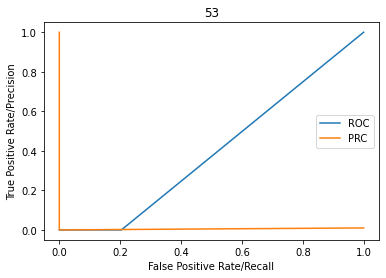

PRC AUC:0.005
ROC AUC:0.397979797979798


In [1337]:
fpr54, tpr54, thresholds54 = roc_curve(Y_test[:,53], probs[:, 53])
prec54, recall54, thresholds54 = precision_recall_curve(Y_test[:,53], probs[:, 53])

plt.plot(fpr54,tpr54,label="ROC")
plt.plot(recall54,prec54,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('53')
plt.show()

print("PRC AUC:" + str(auc(recall54, prec54)))
print("ROC AUC:" + str(auc(fpr54, tpr54)))

In [1338]:
score_true_54=[]

In [1339]:
for x in range(0,iteration):
  if probs[x][53]>=0.5:
    score_true_54.append(1)
  else:
    score_true_54.append(0)

score_true_54

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1340]:
score_true_correct_index_54_LCS=[]
score_true_wrong_index_54_LCS=[]

In [1341]:
for x in range(0,iteration):
  if score_true_54[x]!=Y_test[x,53]:
    score_true_wrong_index_54_LCS.append(x+1)
  else:
    score_true_correct_index_54_LCS.append(x+1)

In [1342]:
correct_53=len(score_true_correct_index_54_LCS)
accuracy_54=correct_53/iteration

#### Class 54

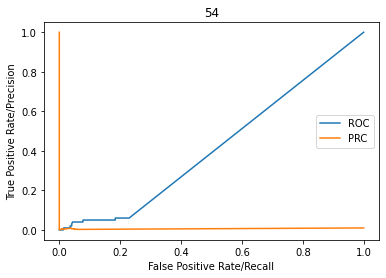

PRC AUC:0.006249240211899789
ROC AUC:0.41825101010101007


In [1343]:
fpr55, tpr55, thresholds55 = roc_curve(Y_test[:,54], probs[:, 54])
prec55, recall55, thresholds55 = precision_recall_curve(Y_test[:,54], probs[:, 54])

plt.plot(fpr55,tpr55,label="ROC")
plt.plot(recall55,prec55,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('54')
plt.show()

print("PRC AUC:" + str(auc(recall55, prec55)))
print("ROC AUC:" + str(auc(fpr55, tpr55)))

In [1344]:
score_true_55=[]

In [1345]:
for x in range(0,iteration):
  if probs[x][54]>=0.5:
    score_true_55.append(1)
  else:
    score_true_55.append(0)

score_true_55

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1346]:
score_true_correct_index_55_LCS=[]
score_true_wrong_index_55_LCS=[]

In [1347]:
for x in range(0,iteration):
  if score_true_55[x]!=Y_test[x,54]:
    score_true_wrong_index_55_LCS.append(x+1)
  else:
    score_true_correct_index_55_LCS.append(x+1)

In [1348]:
correct_54=len(score_true_correct_index_55_LCS)
accuracy_55=correct_54/iteration

#### Class 55

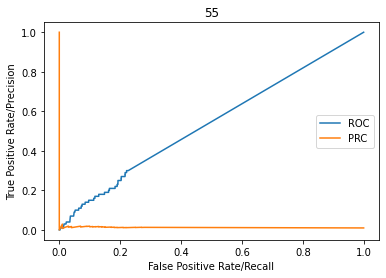

PRC AUC:0.012374355820741856
ROC AUC:0.5371712121212122


In [1349]:
fpr56, tpr56, thresholds56 = roc_curve(Y_test[:,55], probs[:, 55])
prec56, recall56, thresholds56 = precision_recall_curve(Y_test[:,55], probs[:, 55])

plt.plot(fpr56,tpr56,label="ROC")
plt.plot(recall56,prec56,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('55')
plt.show()

print("PRC AUC:" + str(auc(recall56, prec56)))
print("ROC AUC:" + str(auc(fpr56, tpr56)))

In [1350]:
score_true_56=[]

In [1351]:
for x in range(0,iteration):
  if probs[x][55]>=0.5:
    score_true_56.append(1)
  else:
    score_true_56.append(0)

score_true_56

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1352]:
score_true_correct_index_56_LCS=[]
score_true_wrong_index_56_LCS=[]

In [1353]:
for x in range(0,iteration):
  if score_true_56[x]!=Y_test[x,55]:
    score_true_wrong_index_56_LCS.append(x+1)
  else:
    score_true_correct_index_56_LCS.append(x+1)

In [1354]:
correct_55=len(score_true_correct_index_56_LCS)
accuracy_56=correct_55/iteration

#### Class 56

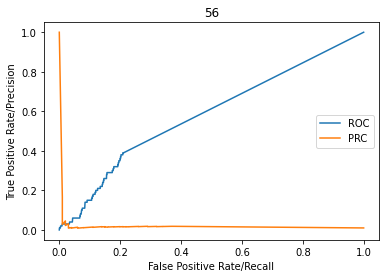

PRC AUC:0.02066478179256326
ROC AUC:0.5843782828282827


In [1355]:
fpr57, tpr57, thresholds57 = roc_curve(Y_test[:,56], probs[:, 56])
prec57, recall57, thresholds57 = precision_recall_curve(Y_test[:,56], probs[:, 56])

plt.plot(fpr57,tpr57,label="ROC")
plt.plot(recall57,prec57,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('56')
plt.show()

print("PRC AUC:" + str(auc(recall57, prec57)))
print("ROC AUC:" + str(auc(fpr57, tpr57)))

In [1356]:
score_true_57=[]

In [1357]:
for x in range(0,iteration):
  if probs[x][56]>=0.5:
    score_true_57.append(1)
  else:
    score_true_57.append(0)

score_true_57

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1358]:
score_true_correct_index_57_LCS=[]
score_true_wrong_index_57_LCS=[]

In [1359]:
for x in range(0,iteration):
  if score_true_57[x]!=Y_test[x,56]:
    score_true_wrong_index_57_LCS.append(x+1)
  else:
    score_true_correct_index_57_LCS.append(x+1)

In [1360]:
correct_56=len(score_true_correct_index_57_LCS)
accuracy_57=correct_56/iteration

#### Class 57

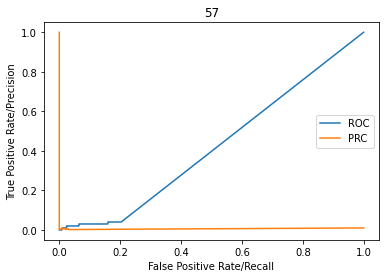

PRC AUC:0.005928513051136454
ROC AUC:0.41983181818181814


In [1361]:
fpr58, tpr58, thresholds58 = roc_curve(Y_test[:,57], probs[:, 57])
prec58, recall58, thresholds58 = precision_recall_curve(Y_test[:,57], probs[:,57])

plt.plot(fpr58,tpr58,label="ROC")
plt.plot(recall58,prec58,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('57')
plt.show()

print("PRC AUC:" + str(auc(recall58, prec58)))
print("ROC AUC:" + str(auc(fpr58, tpr58)))

In [1362]:
score_true_58=[]

In [1363]:
for x in range(0,iteration):
  if probs[x][57]>=0.5:
    score_true_58.append(1)
  else:
    score_true_58.append(0)

score_true_58

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1364]:
score_true_correct_index_58_LCS=[]
score_true_wrong_index_58_LCS=[]

In [1365]:
for x in range(0,iteration):
  if score_true_58[x]!=Y_test[x,57]:
    score_true_wrong_index_58_LCS.append(x+1)
  else:
    score_true_correct_index_58_LCS.append(x+1)

In [1366]:
correct_57=len(score_true_correct_index_58_LCS)
accuracy_58=correct_57/iteration

#### Class 58

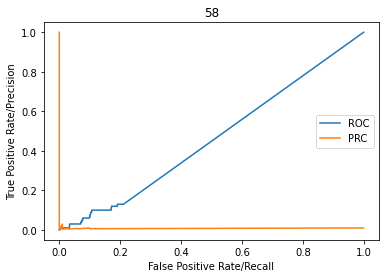

PRC AUC:0.00799514658766121
ROC AUC:0.46086363636363636


In [1367]:
fpr59, tpr59, thresholds59 = roc_curve(Y_test[:,58], probs[:,58])
prec59, recall59, thresholds59 = precision_recall_curve(Y_test[:,58], probs[:,58])

plt.plot(fpr59,tpr59,label="ROC")
plt.plot(recall59,prec59,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('58')
plt.show()

print("PRC AUC:" + str(auc(recall59, prec59)))
print("ROC AUC:" + str(auc(fpr59, tpr59)))

In [1368]:
score_true_59=[]

In [1369]:
for x in range(0,iteration):
  if probs[x][58]>=0.5:
    score_true_59.append(1)
  else:
    score_true_59.append(0)

score_true_59

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1370]:
score_true_correct_index_59_LCS=[]
score_true_wrong_index_59_LCS=[]

In [1371]:
for x in range(0,iteration):
  if score_true_59[x]!=Y_test[x,58]:
    score_true_wrong_index_59_LCS.append(x+1)
  else:
    score_true_correct_index_59_LCS.append(x+1)

In [1372]:
correct_58=len(score_true_correct_index_59_LCS)
accuracy_59=correct_58/iteration

#### Class 59

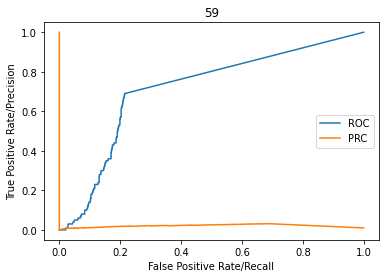

PRC AUC:0.020682831114000457
ROC AUC:0.7104843434343433


In [1373]:
fpr60, tpr60, thresholds60 = roc_curve(Y_test[:,59], probs[:,59])
prec60, recall60, thresholds60 = precision_recall_curve(Y_test[:,59], probs[:,59])

plt.plot(fpr60,tpr60,label="ROC")
plt.plot(recall60,prec60,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('59')
plt.show()

print("PRC AUC:" + str(auc(recall60, prec60)))
print("ROC AUC:" + str(auc(fpr60, tpr60)))

In [1374]:
score_true_60=[]

In [1375]:
for x in range(0,iteration):
  if probs[x][59]>=0.5:
    score_true_60.append(1)
  else:
    score_true_60.append(0)

score_true_60

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1376]:
score_true_correct_index_60_LCS=[]
score_true_wrong_index_60_LCS=[]

In [1377]:
for x in range(0,iteration):
  if score_true_60[x]!=Y_test[x,59]:
    score_true_wrong_index_60_LCS.append(x+1)
  else:
    score_true_correct_index_60_LCS.append(x+1)

In [1378]:
correct_59=len(score_true_correct_index_60_LCS)
accuracy_60=correct_59/iteration

##**60-79**

###**60-69**

#### Class 60

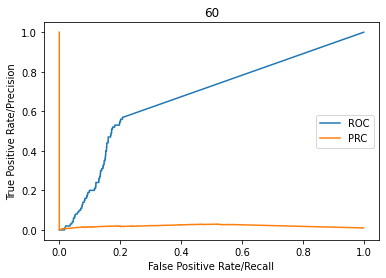

PRC AUC:0.019623569317382853
ROC AUC:0.6701540404040405


In [1379]:
fpr61, tpr61, thresholds61 = roc_curve(Y_test[:,60], probs[:,60])
prec61, recall61, thresholds61 = precision_recall_curve(Y_test[:,60], probs[:,60])

plt.plot(fpr61,tpr61,label="ROC")
plt.plot(recall61,prec61,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('60')
plt.show()

print("PRC AUC:" + str(auc(recall61, prec61)))
print("ROC AUC:" + str(auc(fpr61, tpr61)))

In [1380]:
score_true_61=[]

In [1381]:
for x in range(0,iteration):
  if probs[x][60]>=0.5:
    score_true_61.append(1)
  else:
    score_true_61.append(0)

score_true_61

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1382]:
score_true_correct_index_61_LCS=[]
score_true_wrong_index_61_LCS=[]

In [1383]:
for x in range(0,iteration):
  if score_true_61[x]!=Y_test[x,60]:
    score_true_wrong_index_61_LCS.append(x+1)
  else:
    score_true_correct_index_61_LCS.append(x+1)

In [1384]:
correct_60=len(score_true_correct_index_61_LCS)
accuracy_61=correct_60/iteration

#### Class 61

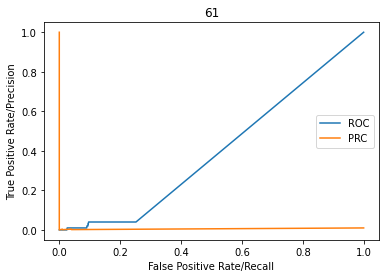

PRC AUC:0.005668321095186305
ROC AUC:0.39602373737373736


In [1385]:
fpr62, tpr62, thresholds62 = roc_curve(Y_test[:,61], probs[:,61])
prec62, recall62, thresholds62 = precision_recall_curve(Y_test[:,61], probs[:,61])

plt.plot(fpr62,tpr62,label="ROC")
plt.plot(recall62,prec62,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('61')
plt.show()

print("PRC AUC:" + str(auc(recall62, prec62)))
print("ROC AUC:" + str(auc(fpr62, tpr62)))

In [1386]:
score_true_62=[]

In [1387]:
for x in range(0,iteration):
  if probs[x][61]>=0.5:
    score_true_62.append(1)
  else:
    score_true_62.append(0)

score_true_62

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1388]:
score_true_correct_index_62_LCS=[]
score_true_wrong_index_62_LCS=[]

In [1389]:
for x in range(0,iteration):
  if score_true_62[x]!=Y_test[x,61]:
    score_true_wrong_index_62_LCS.append(x+1)
  else:
    score_true_correct_index_62_LCS.append(x+1)

In [1390]:
correct_61=len(score_true_correct_index_62_LCS)
accuracy_62=correct_61/iteration

#### Class 62

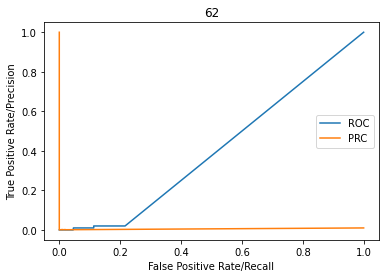

PRC AUC:0.005381948978951921
ROC AUC:0.4025393939393939


In [1391]:
fpr63, tpr63, thresholds63 = roc_curve(Y_test[:,62], probs[:, 62])
prec63, recall63, thresholds63 = precision_recall_curve(Y_test[:,62], probs[:,62])

plt.plot(fpr63,tpr63,label="ROC")
plt.plot(recall63,prec63,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('62')
plt.show()

print("PRC AUC:" + str(auc(recall63, prec63)))
print("ROC AUC:" + str(auc(fpr63, tpr63)))

In [1392]:
score_true_63=[]

In [1393]:
for x in range(0,iteration):
  if probs[x][62]>=0.5:
    score_true_63.append(1)
  else:
    score_true_63.append(0)

score_true_63

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1394]:
score_true_correct_index_63_LCS=[]
score_true_wrong_index_63_LCS=[]

In [1395]:
for x in range(0,iteration):
  if score_true_63[x]!=Y_test[x,62]:
    score_true_wrong_index_63_LCS.append(x+1)
  else:
    score_true_correct_index_63_LCS.append(x+1)

In [1396]:
correct_62=len(score_true_correct_index_63_LCS)
accuracy_63=correct_62/iteration

#### Class 63

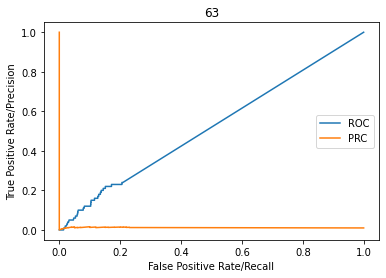

PRC AUC:0.011168486482503076
ROC AUC:0.518759595959596


In [1397]:
fpr64, tpr64, thresholds64 = roc_curve(Y_test[:,63], probs[:,63])
prec64, recall64, thresholds64 = precision_recall_curve(Y_test[:,63], probs[:,63])

plt.plot(fpr64,tpr64,label="ROC")
plt.plot(recall64,prec64,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('63')
plt.show()

print("PRC AUC:" + str(auc(recall64, prec64)))
print("ROC AUC:" + str(auc(fpr64, tpr64)))

In [1398]:
score_true_64=[]

In [1399]:
for x in range(0,iteration):
  if probs[x][63]>=0.5:
    score_true_64.append(1)
  else:
    score_true_64.append(0)

score_true_64

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1400]:
score_true_correct_index_64_LCS=[]
score_true_wrong_index_64_LCS=[]

In [1401]:
for x in range(0,iteration):
  if score_true_64[x]!=Y_test[x,63]:
    score_true_wrong_index_64_LCS.append(x+1)
  else:
    score_true_correct_index_64_LCS.append(x+1)

In [1402]:
correct_63=len(score_true_correct_index_64_LCS)
accuracy_64=correct_63/iteration

#### Class 64

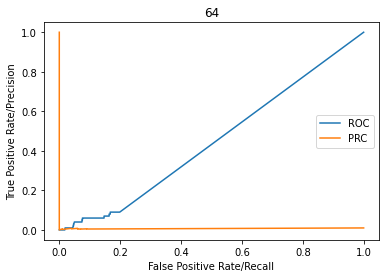

PRC AUC:0.007084152686225643
ROC AUC:0.44677020202020207


In [1403]:
fpr65, tpr65, thresholds65 = roc_curve(Y_test[:,64], probs[:, 64])
prec65, recall65, thresholds65 = precision_recall_curve(Y_test[:,64], probs[:,64])

plt.plot(fpr65,tpr65,label="ROC")
plt.plot(recall65,prec65,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('64')
plt.show()

print("PRC AUC:" + str(auc(recall65, prec65)))
print("ROC AUC:" + str(auc(fpr65, tpr65)))

In [1404]:
score_true_65=[]

In [1405]:
for x in range(0,iteration):
  if probs[x][64]>=0.5:
    score_true_65.append(1)
  else:
    score_true_65.append(0)

score_true_65

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1406]:
score_true_correct_index_65_LCS=[]
score_true_wrong_index_65_LCS=[]

In [1407]:
for x in range(0,iteration):
  if score_true_65[x]!=Y_test[x,64]:
    score_true_wrong_index_65_LCS.append(x+1)
  else:
    score_true_correct_index_65_LCS.append(x+1)

In [1408]:
correct_64=len(score_true_correct_index_65_LCS)
accuracy_65=correct_64/iteration

#### Class 65

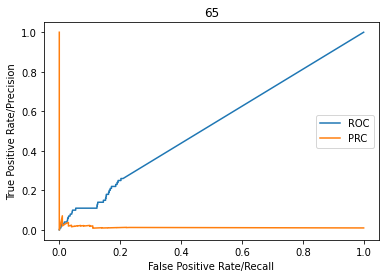

PRC AUC:0.012558535168184337
ROC AUC:0.5254686868686868


In [1409]:
fpr66, tpr66, thresholds66 = roc_curve(Y_test[:,65], probs[:, 65])
prec66, recall66, thresholds66 = precision_recall_curve(Y_test[:,65], probs[:, 65])

plt.plot(fpr66,tpr66,label="ROC")
plt.plot(recall66,prec66,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('65')
plt.show()

print("PRC AUC:" + str(auc(recall66, prec66)))
print("ROC AUC:" + str(auc(fpr66, tpr66)))

In [1410]:
score_true_66=[]

In [1411]:
for x in range(0,iteration):
  if probs[x][65]>=0.5:
    score_true_66.append(1)
  else:
    score_true_66.append(0)

score_true_66

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1412]:
score_true_correct_index_66_LCS=[]
score_true_wrong_index_66_LCS=[]

In [1413]:
for x in range(0,iteration):
  if score_true_66[x]!=Y_test[x,65]:
    score_true_wrong_index_66_LCS.append(x+1)
  else:
    score_true_correct_index_66_LCS.append(x+1)

In [1414]:
correct_65=len(score_true_correct_index_66_LCS)
accuracy_66=correct_65/iteration

#### Class 66

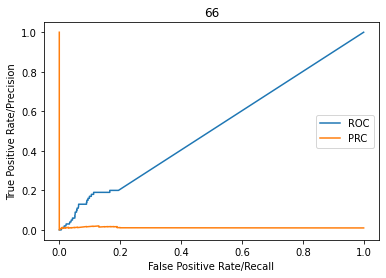

PRC AUC:0.010970660593279509
ROC AUC:0.5090818181818182


In [1415]:
fpr67, tpr67, thresholds67 = roc_curve(Y_test[:,66], probs[:, 66])
prec67, recall67, thresholds67 = precision_recall_curve(Y_test[:,66], probs[:, 66])

plt.plot(fpr67,tpr67,label="ROC")
plt.plot(recall67,prec67,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('66')
plt.show()

print("PRC AUC:" + str(auc(recall67, prec67)))
print("ROC AUC:" + str(auc(fpr67, tpr67)))

In [1416]:
score_true_67=[]

In [1417]:
for x in range(0,iteration):
  if probs[x][66]>=0.5:
    score_true_67.append(1)
  else:
    score_true_67.append(0)

score_true_67

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1418]:
score_true_correct_index_67_LCS=[]
score_true_wrong_index_67_LCS=[]

In [1419]:
for x in range(0,iteration):
  if score_true_67[x]!=Y_test[x,66]:
    score_true_wrong_index_67_LCS.append(x+1)
  else:
    score_true_correct_index_67_LCS.append(x+1)

In [1420]:
correct_66=len(score_true_correct_index_67_LCS)
accuracy_67=correct_66/iteration

#### Class 67

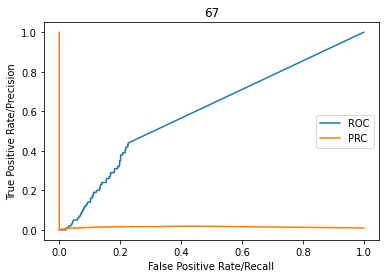

PRC AUC:0.014621453084198148
ROC AUC:0.5970444444444444


In [1421]:
fpr68, tpr68, thresholds68 = roc_curve(Y_test[:,67], probs[:, 67])
prec68, recall68, thresholds68 = precision_recall_curve(Y_test[:,67], probs[:,67])

plt.plot(fpr68,tpr68,label="ROC")
plt.plot(recall68,prec68,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('67')
plt.show()

print("PRC AUC:" + str(auc(recall68, prec68)))
print("ROC AUC:" + str(auc(fpr68, tpr68)))

In [1422]:
score_true_68=[]

In [1423]:
for x in range(0,iteration):
  if probs[x][67]>=0.5:
    score_true_68.append(1)
  else:
    score_true_68.append(0)

score_true_68

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1424]:
score_true_correct_index_68_LCS=[]
score_true_wrong_index_68_LCS=[]

In [1425]:
for x in range(0,iteration):
  if score_true_68[x]!=Y_test[x,67]:
    score_true_wrong_index_68_LCS.append(x+1)
  else:
    score_true_correct_index_68_LCS.append(x+1)

In [1426]:
correct_67=len(score_true_correct_index_68_LCS)
accuracy_68=correct_67/iteration

#### Class 68

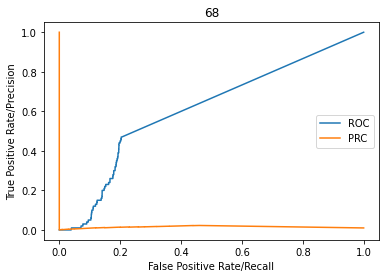

PRC AUC:0.015147052028197452
ROC AUC:0.6093515151515152


In [1427]:
fpr69, tpr69, thresholds69 = roc_curve(Y_test[:,68], probs[:,68])
prec69, recall69, thresholds69 = precision_recall_curve(Y_test[:,68], probs[:,68])

plt.plot(fpr69,tpr69,label="ROC")
plt.plot(recall69,prec69,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('68')
plt.show()

print("PRC AUC:" + str(auc(recall69, prec69)))
print("ROC AUC:" + str(auc(fpr69, tpr69)))

In [1428]:
score_true_69=[]

In [1429]:
for x in range(0,iteration):
  if probs[x][68]>=0.5:
    score_true_69.append(1)
  else:
    score_true_69.append(0)

score_true_69

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1430]:
score_true_correct_index_69_LCS=[]
score_true_wrong_index_69_LCS=[]

In [1431]:
for x in range(0,iteration):
  if score_true_69[x]!=Y_test[x,68]:
    score_true_wrong_index_69_LCS.append(x+1)
  else:
    score_true_correct_index_69_LCS.append(x+1)

In [1432]:
correct_68=len(score_true_correct_index_69_LCS)
accuracy_69=correct_68/iteration

#### Class 69

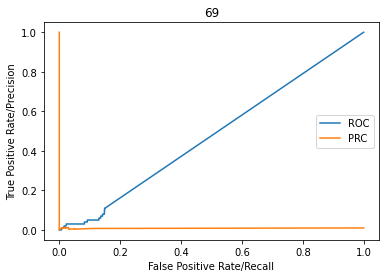

PRC AUC:0.008414053478072185
ROC AUC:0.4774176767676768


In [1433]:
fpr70, tpr70, thresholds70 = roc_curve(Y_test[:,69], probs[:,69])
prec70, recall70, thresholds70 = precision_recall_curve(Y_test[:,69], probs[:,69])

plt.plot(fpr70,tpr70,label="ROC")
plt.plot(recall70,prec70,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('69')
plt.show()

print("PRC AUC:" + str(auc(recall70, prec70)))
print("ROC AUC:" + str(auc(fpr70, tpr70)))

In [1434]:
score_true_70=[]

In [1435]:
for x in range(0,iteration):
  if probs[x][69]>=0.5:
    score_true_70.append(1)
  else:
    score_true_70.append(0)

score_true_70

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1436]:
score_true_correct_index_70_LCS=[]
score_true_wrong_index_70_LCS=[]

In [1437]:
for x in range(0,iteration):
  if score_true_70[x]!=Y_test[x,69]:
    score_true_wrong_index_70_LCS.append(x+1)
  else:
    score_true_correct_index_70_LCS.append(x+1)

In [1438]:
correct_69=len(score_true_correct_index_70_LCS)
accuracy_70=correct_69/iteration

###**70-79**

#### Class 70

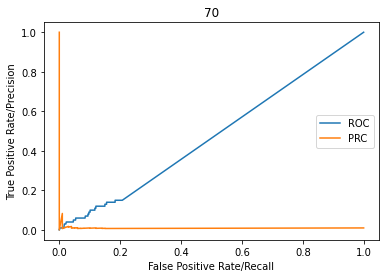

PRC AUC:0.009135503218193883
ROC AUC:0.4744631313131312


In [1439]:
fpr71, tpr71, thresholds71 = roc_curve(Y_test[:,70], probs[:,70])
prec71, recall71, thresholds71 = precision_recall_curve(Y_test[:,70], probs[:,70])

plt.plot(fpr71,tpr71,label="ROC")
plt.plot(recall71,prec71,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('70')
plt.show()

print("PRC AUC:" + str(auc(recall71, prec71)))
print("ROC AUC:" + str(auc(fpr71, tpr71)))

In [1440]:
score_true_71=[]

In [1441]:
for x in range(0,iteration):
  if probs[x][70]>=0.5:
    score_true_71.append(1)
  else:
    score_true_71.append(0)

score_true_71

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1442]:
score_true_correct_index_71_LCS=[]
score_true_wrong_index_71_LCS=[]

In [1443]:
for x in range(0,iteration):
  if score_true_71[x]!=Y_test[x,70]:
    score_true_wrong_index_71_LCS.append(x+1)
  else:
    score_true_correct_index_71_LCS.append(x+1)

In [1444]:
correct_70=len(score_true_correct_index_71_LCS)
accuracy_71=correct_70/iteration

#### Class 71

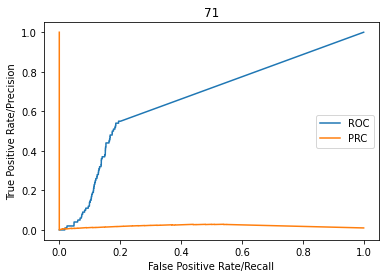

PRC AUC:0.019146912564399376
ROC AUC:0.6622166666666667


In [1445]:
fpr72, tpr72, thresholds72 = roc_curve(Y_test[:,71], probs[:, 71])
prec72, recall72, thresholds72 = precision_recall_curve(Y_test[:,71], probs[:, 71])

plt.plot(fpr72,tpr72,label="ROC")
plt.plot(recall72,prec72,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('71')
plt.show()

print("PRC AUC:" + str(auc(recall72, prec72)))
print("ROC AUC:" + str(auc(fpr72, tpr72)))

In [1446]:
score_true_72=[]

In [1447]:
for x in range(0,iteration):
  if probs[x][71]>=0.5:
    score_true_72.append(1)
  else:
    score_true_72.append(0)

score_true_72

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1448]:
score_true_correct_index_72_LCS=[]
score_true_wrong_index_72_LCS=[]

In [1449]:
for x in range(0,iteration):
  if score_true_72[x]!=Y_test[x,71]:
    score_true_wrong_index_72_LCS.append(x+1)
  else:
    score_true_correct_index_72_LCS.append(x+1)

In [1450]:
correct_71=len(score_true_correct_index_72_LCS)
accuracy_72=correct_71/iteration

#### Class 72

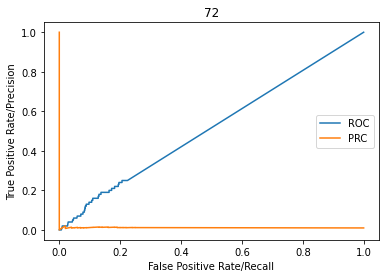

PRC AUC:0.01094233266840107
ROC AUC:0.5157015151515152


In [1451]:
fpr73, tpr73, thresholds73 = roc_curve(Y_test[:,72], probs[:, 72])
prec73, recall73, thresholds73 = precision_recall_curve(Y_test[:,72], probs[:,72])

plt.plot(fpr73,tpr73,label="ROC")
plt.plot(recall73,prec73,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('72')
plt.show()

print("PRC AUC:" + str(auc(recall73, prec73)))
print("ROC AUC:" + str(auc(fpr73, tpr73)))

In [1452]:
score_true_73=[]

In [1453]:
for x in range(0,iteration):
  if probs[x][72]>=0.5:
    score_true_73.append(1)
  else:
    score_true_73.append(0)

score_true_73

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1454]:
score_true_correct_index_73_LCS=[]
score_true_wrong_index_73_LCS=[]

In [1455]:
for x in range(0,iteration):
  if score_true_73[x]!=Y_test[x,72]:
    score_true_wrong_index_73_LCS.append(x+1)
  else:
    score_true_correct_index_73_LCS.append(x+1)

In [1456]:
correct_72=len(score_true_correct_index_73_LCS)
accuracy_73=correct_72/iteration

#### Class 73

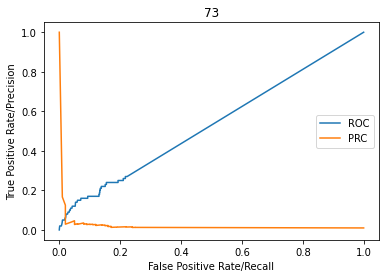

PRC AUC:0.021052792649209118
ROC AUC:0.5321919191919193


In [1457]:
fpr74, tpr74, thresholds74 = roc_curve(Y_test[:,73], probs[:, 73])
prec74, recall74, thresholds74 = precision_recall_curve(Y_test[:,73], probs[:, 73])

plt.plot(fpr74,tpr74,label="ROC")
plt.plot(recall74,prec74,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('73')
plt.show()

print("PRC AUC:" + str(auc(recall74, prec74)))
print("ROC AUC:" + str(auc(fpr74, tpr74)))

In [1458]:
score_true_74=[]

In [1459]:
for x in range(0,iteration):
  if probs[x][73]>=0.5:
    score_true_74.append(1)
  else:
    score_true_74.append(0)

score_true_74

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1460]:
score_true_correct_index_74_LCS=[]
score_true_wrong_index_74_LCS=[]

In [1461]:
for x in range(0,iteration):
  if score_true_74[x]!=Y_test[x,73]:
    score_true_wrong_index_74_LCS.append(x+1)
  else:
    score_true_correct_index_74_LCS.append(x+1)

In [1462]:
correct_73=len(score_true_correct_index_74_LCS)
accuracy_74=correct_73/iteration

#### Class 74

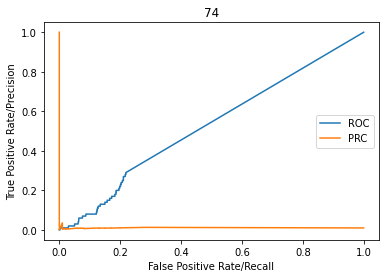

PRC AUC:0.011051639554151126
ROC AUC:0.5260237373737374


In [1463]:
fpr75, tpr75, thresholds75 = roc_curve(Y_test[:,74], probs[:, 74])
prec75, recall75, thresholds75 = precision_recall_curve(Y_test[:,74], probs[:, 74])

plt.plot(fpr75,tpr75,label="ROC")
plt.plot(recall75,prec75,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('74')
plt.show()

print("PRC AUC:" + str(auc(recall75, prec75)))
print("ROC AUC:" + str(auc(fpr75, tpr75)))

In [1464]:
score_true_75=[]

In [1465]:
for x in range(0,iteration):
  if probs[x][74]>=0.5:
    score_true_75.append(1)
  else:
    score_true_75.append(0)

score_true_75

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1466]:
score_true_correct_index_75_LCS=[]
score_true_wrong_index_75_LCS=[]

In [1467]:
for x in range(0,iteration):
  if score_true_75[x]!=Y_test[x,74]:
    score_true_wrong_index_75_LCS.append(x+1)
  else:
    score_true_correct_index_75_LCS.append(x+1)

In [1468]:
correct_74=len(score_true_correct_index_75_LCS)
accuracy_75=correct_74/iteration

#### Class 75

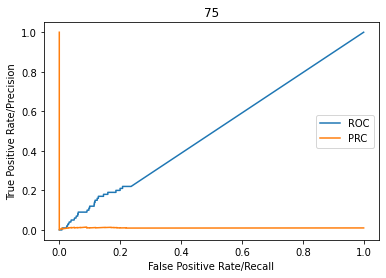

PRC AUC:0.00993136694359206
ROC AUC:0.49652777777777785


In [1469]:
fpr76, tpr76, thresholds76 = roc_curve(Y_test[:,75], probs[:, 75])
prec76, recall76, thresholds76 = precision_recall_curve(Y_test[:,75], probs[:, 75])

plt.plot(fpr76,tpr76,label="ROC")
plt.plot(recall76,prec76,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('75')
plt.show()

print("PRC AUC:" + str(auc(recall76, prec76)))
print("ROC AUC:" + str(auc(fpr76, tpr76)))

In [1470]:
score_true_76=[]

In [1471]:
for x in range(0,iteration):
  if probs[x][75]>=0.5:
    score_true_76.append(1)
  else:
    score_true_76.append(0)

score_true_76

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1472]:
score_true_correct_index_76_LCS=[]
score_true_wrong_index_76_LCS=[]

In [1473]:
for x in range(0,iteration):
  if score_true_76[x]!=Y_test[x,75]:
    score_true_wrong_index_76_LCS.append(x+1)
  else:
    score_true_correct_index_76_LCS.append(x+1)

In [1474]:
correct_75=len(score_true_correct_index_76_LCS)
accuracy_76=correct_75/iteration

#### Class 76

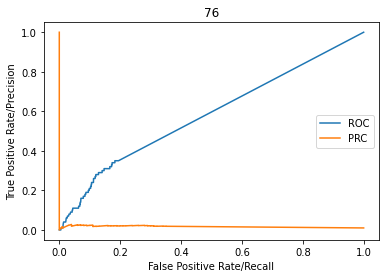

PRC AUC:0.016249044353146357
ROC AUC:0.5823878787878788


In [1475]:
fpr77, tpr77, thresholds77 = roc_curve(Y_test[:,76], probs[:, 76])
prec77, recall77, thresholds77 = precision_recall_curve(Y_test[:,76], probs[:, 76])

plt.plot(fpr77,tpr77,label="ROC")
plt.plot(recall77,prec77,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('76')
plt.show()

print("PRC AUC:" + str(auc(recall77, prec77)))
print("ROC AUC:" + str(auc(fpr77, tpr77)))

In [1476]:
score_true_77=[]

In [1477]:
for x in range(0,iteration):
  if probs[x][76]>=0.5:
    score_true_77.append(1)
  else:
    score_true_77.append(0)

score_true_77

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1478]:
score_true_correct_index_77_LCS=[]
score_true_wrong_index_77_LCS=[]

In [1479]:
for x in range(0,iteration):
  if score_true_77[x]!=Y_test[x,76]:
    score_true_wrong_index_77_LCS.append(x+1)
  else:
    score_true_correct_index_77_LCS.append(x+1)

In [1480]:
correct_76=len(score_true_correct_index_77_LCS)
accuracy_77=correct_76/iteration

#### Class 77

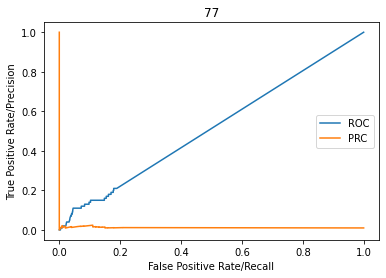

PRC AUC:0.011402673429199674
ROC AUC:0.5136373737373737


In [1481]:
fpr78, tpr78, thresholds78 = roc_curve(Y_test[:,77], probs[:, 77])
prec78, recall78, thresholds78 = precision_recall_curve(Y_test[:,77], probs[:,77])

plt.plot(fpr78,tpr78,label="ROC")
plt.plot(recall78,prec78,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('77')
plt.show()

print("PRC AUC:" + str(auc(recall78, prec78)))
print("ROC AUC:" + str(auc(fpr78, tpr78)))

In [1482]:
score_true_78=[]

In [1483]:
for x in range(0,iteration):
  if probs[x][77]>=0.5:
    score_true_78.append(1)
  else:
    score_true_78.append(0)

score_true_78

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1484]:
score_true_correct_index_78_LCS=[]
score_true_wrong_index_78_LCS=[]

In [1485]:
for x in range(0,iteration):
  if score_true_78[x]!=Y_test[x,77]:
    score_true_wrong_index_78_LCS.append(x+1)
  else:
    score_true_correct_index_78_LCS.append(x+1)

In [1486]:
correct_77=len(score_true_correct_index_78_LCS)
accuracy_78=correct_77/iteration

#### Class 78

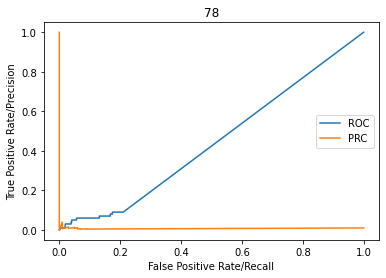

PRC AUC:0.007359354376897069
ROC AUC:0.44299848484848486


In [1487]:
fpr79, tpr79, thresholds79 = roc_curve(Y_test[:,78], probs[:,78])
prec79, recall79, thresholds79 = precision_recall_curve(Y_test[:,78], probs[:,78])

plt.plot(fpr79,tpr79,label="ROC")
plt.plot(recall79,prec79,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('78')
plt.show()

print("PRC AUC:" + str(auc(recall79, prec79)))
print("ROC AUC:" + str(auc(fpr79, tpr79)))

In [1488]:
score_true_79=[]

In [1489]:
for x in range(0,iteration):
  if probs[x][78]>=0.5:
    score_true_79.append(1)
  else:
    score_true_79.append(0)

score_true_79

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1490]:
score_true_correct_index_79_LCS=[]
score_true_wrong_index_79_LCS=[]

In [1491]:
for x in range(0,iteration):
  if score_true_79[x]!=Y_test[x,78]:
    score_true_wrong_index_79_LCS.append(x+1)
  else:
    score_true_correct_index_79_LCS.append(x+1)

In [1492]:
correct_78=len(score_true_correct_index_79_LCS)
accuracy_79=correct_78/iteration

#### Class 79

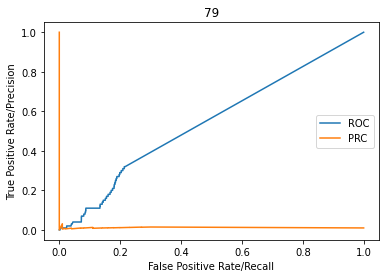

PRC AUC:0.011954664202604761
ROC AUC:0.5432378787878787


In [1493]:
fpr80, tpr80, thresholds80 = roc_curve(Y_test[:,79], probs[:,79])
prec80, recall80, thresholds80 = precision_recall_curve(Y_test[:,79], probs[:,79])

plt.plot(fpr80,tpr80,label="ROC")
plt.plot(recall80,prec80,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('79')
plt.show()

print("PRC AUC:" + str(auc(recall80, prec80)))
print("ROC AUC:" + str(auc(fpr80, tpr80)))

In [1494]:
score_true_80=[]

In [1495]:
for x in range(0,iteration):
  if probs[x][79]>=0.5:
    score_true_80.append(1)
  else:
    score_true_80.append(0)

score_true_80

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1496]:
score_true_correct_index_80_LCS=[]
score_true_wrong_index_80_LCS=[]

In [1497]:
for x in range(0,iteration):
  if score_true_80[x]!=Y_test[x,79]:
    score_true_wrong_index_80_LCS.append(x+1)
  else:
    score_true_correct_index_80_LCS.append(x+1)

In [1498]:
correct_79=len(score_true_correct_index_80_LCS)
accuracy_80=correct_79/iteration

##**80-99**

###**80-89**

#### Class 80

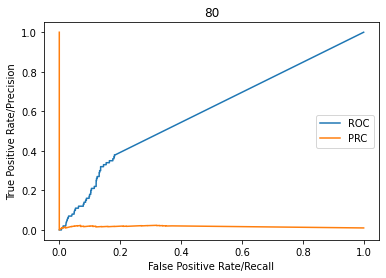

PRC AUC:0.01647962237994864
ROC AUC:0.5965368686868686


In [1499]:
fpr81, tpr81, thresholds81 = roc_curve(Y_test[:,80], probs[:,80])
prec81, recall81, thresholds81 = precision_recall_curve(Y_test[:,80], probs[:,80])

plt.plot(fpr81,tpr81,label="ROC")
plt.plot(recall81,prec81,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('80')
plt.show()

print("PRC AUC:" + str(auc(recall81, prec81)))
print("ROC AUC:" + str(auc(fpr81, tpr81)))

In [1500]:
score_true_81=[]

In [1501]:
for x in range(0,iteration):
  if probs[x][80]>=0.5:
    score_true_81.append(1)
  else:
    score_true_81.append(0)

score_true_81

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1502]:
score_true_correct_index_81_LCS=[]
score_true_wrong_index_81_LCS=[]

In [1503]:
for x in range(0,iteration):
  if score_true_81[x]!=Y_test[x,80]:
    score_true_wrong_index_81_LCS.append(x+1)
  else:
    score_true_correct_index_81_LCS.append(x+1)

In [1504]:
correct_80=len(score_true_correct_index_81_LCS)
accuracy_81=correct_80/iteration

#### Class 81

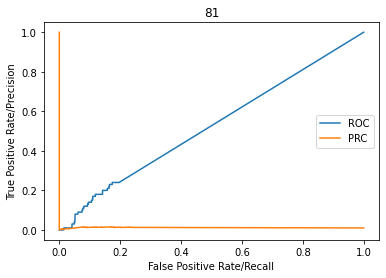

PRC AUC:0.011287098586805175
ROC AUC:0.523120202020202


In [1505]:
fpr82, tpr82, thresholds82 = roc_curve(Y_test[:,81], probs[:,81])
prec82, recall82, thresholds82 = precision_recall_curve(Y_test[:,81], probs[:,81])

plt.plot(fpr82,tpr82,label="ROC")
plt.plot(recall82,prec82,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('81')
plt.show()

print("PRC AUC:" + str(auc(recall82, prec82)))
print("ROC AUC:" + str(auc(fpr82, tpr82)))

In [1506]:
score_true_82=[]

In [1507]:
for x in range(0,iteration):
  if probs[x][81]>=0.5:
    score_true_82.append(1)
  else:
    score_true_82.append(0)

score_true_82

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1508]:
score_true_correct_index_82_LCS=[]
score_true_wrong_index_82_LCS=[]

In [1509]:
for x in range(0,iteration):
  if score_true_82[x]!=Y_test[x,81]:
    score_true_wrong_index_82_LCS.append(x+1)
  else:
    score_true_correct_index_82_LCS.append(x+1)

In [1510]:
correct_81=len(score_true_correct_index_82_LCS)
accuracy_82=correct_81/iteration

#### Class 82

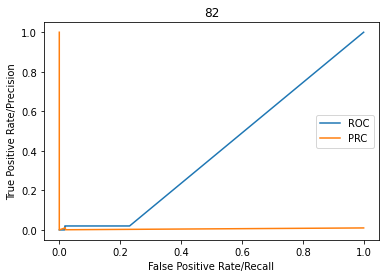

PRC AUC:0.005437724420263148
ROC AUC:0.3964454545454546


In [1511]:
fpr83, tpr83, thresholds83 = roc_curve(Y_test[:,82], probs[:, 82])
prec83, recall83, thresholds83 = precision_recall_curve(Y_test[:,82], probs[:,82])

plt.plot(fpr83,tpr83,label="ROC")
plt.plot(recall83,prec83,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('82')
plt.show()

print("PRC AUC:" + str(auc(recall83, prec83)))
print("ROC AUC:" + str(auc(fpr83, tpr83)))

In [1512]:
score_true_83=[]

In [1513]:
for x in range(0,iteration):
  if probs[x][82]>=0.5:
    score_true_83.append(1)
  else:
    score_true_83.append(0)

score_true_83

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1514]:
score_true_correct_index_83_LCS=[]
score_true_wrong_index_83_LCS=[]

In [1515]:
for x in range(0,iteration):
  if score_true_83[x]!=Y_test[x,82]:
    score_true_wrong_index_83_LCS.append(x+1)
  else:
    score_true_correct_index_83_LCS.append(x+1)

In [1516]:
correct_82=len(score_true_correct_index_83_LCS)
accuracy_83=correct_82/iteration

#### Class 83

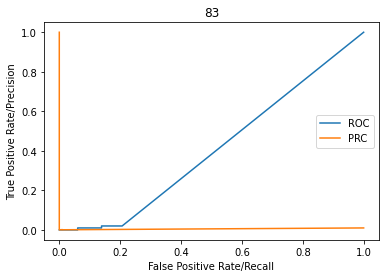

PRC AUC:0.005398220521039351
ROC AUC:0.4068409090909091


In [1517]:
fpr84, tpr84, thresholds84 = roc_curve(Y_test[:,83], probs[:,83])
prec84, recall84, thresholds84 = precision_recall_curve(Y_test[:,83], probs[:,83])

plt.plot(fpr84,tpr84,label="ROC")
plt.plot(recall84,prec84,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('83')
plt.show()

print("PRC AUC:" + str(auc(recall84, prec84)))
print("ROC AUC:" + str(auc(fpr84, tpr84)))

In [1518]:
score_true_84=[]

In [1519]:
for x in range(0,iteration):
  if probs[x][83]>=0.5:
    score_true_84.append(1)
  else:
    score_true_84.append(0)

score_true_84

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1520]:
score_true_correct_index_84_LCS=[]
score_true_wrong_index_84_LCS=[]

In [1521]:
for x in range(0,iteration):
  if score_true_84[x]!=Y_test[x,83]:
    score_true_wrong_index_84_LCS.append(x+1)
  else:
    score_true_correct_index_84_LCS.append(x+1)

In [1522]:
correct_83=len(score_true_correct_index_84_LCS)
accuracy_84=correct_83/iteration

#### Class 84

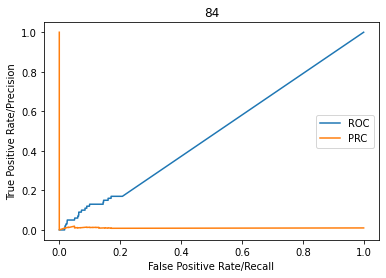

PRC AUC:0.00945048061756559
ROC AUC:0.48579898989898984


In [1523]:
fpr85, tpr85, thresholds85 = roc_curve(Y_test[:,84], probs[:,84])
prec85, recall85, thresholds85 = precision_recall_curve(Y_test[:,84], probs[:,84])

plt.plot(fpr85,tpr85,label="ROC")
plt.plot(recall85,prec85,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('84')
plt.show()

print("PRC AUC:" + str(auc(recall85, prec85)))
print("ROC AUC:" + str(auc(fpr85, tpr85)))

In [1524]:
score_true_85=[]

In [1525]:
for x in range(0,iteration):
  if probs[x][84]>=0.5:
    score_true_85.append(1)
  else:
    score_true_85.append(0)

score_true_85

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1526]:
score_true_correct_index_85_LCS=[]
score_true_wrong_index_85_LCS=[]

In [1527]:
for x in range(0,iteration):
  if score_true_85[x]!=Y_test[x,84]:
    score_true_wrong_index_85_LCS.append(x+1)
  else:
    score_true_correct_index_85_LCS.append(x+1)

In [1528]:
correct_84=len(score_true_correct_index_85_LCS)
accuracy_85=correct_84/iteration

#### Class 85

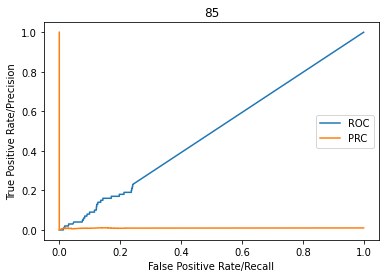

PRC AUC:0.009486686423751934
ROC AUC:0.49248282828282824


In [1529]:
fpr86, tpr86, thresholds86 = roc_curve(Y_test[:,85], probs[:, 85])
prec86, recall86, thresholds86 = precision_recall_curve(Y_test[:,85], probs[:,85])

plt.plot(fpr86,tpr86,label="ROC")
plt.plot(recall86,prec86,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('85')
plt.show()

print("PRC AUC:" + str(auc(recall86, prec86)))
print("ROC AUC:" + str(auc(fpr86, tpr86)))

In [1530]:
score_true_86=[]

In [1531]:
for x in range(0,iteration):
  if probs[x][85]>=0.5:
    score_true_86.append(1)
  else:
    score_true_86.append(0)

score_true_86

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1532]:
score_true_correct_index_86_LCS=[]
score_true_wrong_index_86_LCS=[]

In [1533]:
for x in range(0,iteration):
  if score_true_86[x]!=Y_test[x,85]:
    score_true_wrong_index_86_LCS.append(x+1)
  else:
    score_true_correct_index_86_LCS.append(x+1)

In [1534]:
correct_85=len(score_true_correct_index_86_LCS)
accuracy_86=correct_85/iteration

#### Class 86

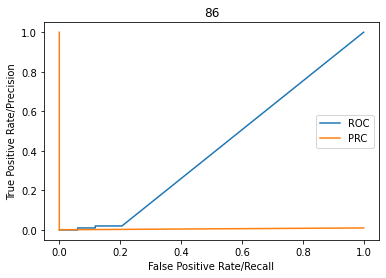

PRC AUC:0.005401513902449949
ROC AUC:0.40734242424242423


In [1535]:
fpr87, tpr87, thresholds87 = roc_curve(Y_test[:,86], probs[:, 86])
prec87, recall87, thresholds87 = precision_recall_curve(Y_test[:,86], probs[:,86])

plt.plot(fpr87,tpr87,label="ROC")
plt.plot(recall87,prec87,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('86')
plt.show()

print("PRC AUC:" + str(auc(recall87, prec87)))
print("ROC AUC:" + str(auc(fpr87, tpr87)))

In [1536]:
score_true_87=[]

In [1537]:
for x in range(0,iteration):
  if probs[x][86]>=0.5:
    score_true_87.append(1)
  else:
    score_true_87.append(0)

score_true_87

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1538]:
score_true_correct_index_87_LCS=[]
score_true_wrong_index_87_LCS=[]

In [1539]:
for x in range(0,iteration):
  if score_true_87[x]!=Y_test[x,86]:
    score_true_wrong_index_87_LCS.append(x+1)
  else:
    score_true_correct_index_87_LCS.append(x+1)

In [1540]:
correct_86=len(score_true_correct_index_87_LCS)
accuracy_87=correct_86/iteration

#### Class 87

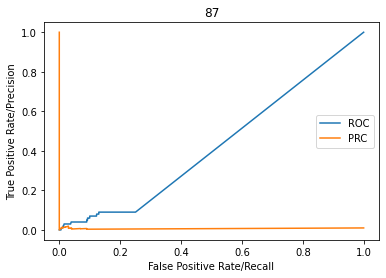

PRC AUC:0.006954439102193251
ROC AUC:0.4249636363636363


In [1541]:
fpr88, tpr88, thresholds88 = roc_curve(Y_test[:,87], probs[:, 87])
prec88, recall88, thresholds88 = precision_recall_curve(Y_test[:,87], probs[:,87])

plt.plot(fpr88,tpr88,label="ROC")
plt.plot(recall88,prec88,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('87')
plt.show()

print("PRC AUC:" + str(auc(recall88, prec88)))
print("ROC AUC:" + str(auc(fpr88, tpr88)))

In [1542]:
score_true_88=[]

In [1543]:
for x in range(0,iteration):
  if probs[x][87]>=0.5:
    score_true_88.append(1)
  else:
    score_true_88.append(0)

score_true_88

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1544]:
score_true_correct_index_88_LCS=[]
score_true_wrong_index_88_LCS=[]

In [1545]:
for x in range(0,iteration):
  if score_true_88[x]!=Y_test[x,87]:
    score_true_wrong_index_88_LCS.append(x+1)
  else:
    score_true_correct_index_88_LCS.append(x+1)

In [1546]:
correct_87=len(score_true_correct_index_88_LCS)
accuracy_88=correct_87/iteration

#### Class 88

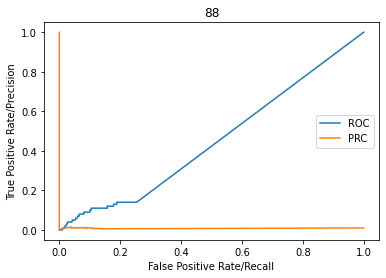

PRC AUC:0.007989710542751065
ROC AUC:0.44961818181818186


In [1547]:
fpr89, tpr89, thresholds89 = roc_curve(Y_test[:,88], probs[:,88])
prec89, recall89, thresholds89 = precision_recall_curve(Y_test[:,88], probs[:,88])

plt.plot(fpr89,tpr89,label="ROC")
plt.plot(recall89,prec89,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('88')
plt.show()

print("PRC AUC:" + str(auc(recall89, prec89)))
print("ROC AUC:" + str(auc(fpr89, tpr89)))

In [1548]:
score_true_89=[]

In [1549]:
for x in range(0,iteration):
  if probs[x][88]>=0.5:
    score_true_89.append(1)
  else:
    score_true_89.append(0)

score_true_89

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1550]:
score_true_correct_index_89_LCS=[]
score_true_wrong_index_89_LCS=[]

In [1551]:
for x in range(0,iteration):
  if score_true_89[x]!=Y_test[x,88]:
    score_true_wrong_index_89_LCS.append(x+1)
  else:
    score_true_correct_index_89_LCS.append(x+1)

In [1552]:
correct_88=len(score_true_correct_index_89_LCS)
accuracy_89=correct_88/iteration

#### Class 89

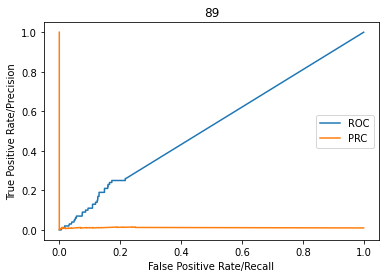

PRC AUC:0.011074673534679537
ROC AUC:0.5217757575757577


In [1553]:
fpr90, tpr90, thresholds90 = roc_curve(Y_test[:,89], probs[:,89])
prec90, recall90, thresholds90 = precision_recall_curve(Y_test[:,89], probs[:,89])

plt.plot(fpr90,tpr90,label="ROC")
plt.plot(recall90,prec90,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('89')
plt.show()

print("PRC AUC:" + str(auc(recall90, prec90)))
print("ROC AUC:" + str(auc(fpr90, tpr90)))

In [1554]:
score_true_90=[]

In [1555]:
for x in range(0,iteration):
  if probs[x][89]>=0.5:
    score_true_90.append(1)
  else:
    score_true_90.append(0)

score_true_90

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1556]:
score_true_correct_index_90_LCS=[]
score_true_wrong_index_90_LCS=[]

In [1557]:
for x in range(0,iteration):
  if score_true_90[x]!=Y_test[x,89]:
    score_true_wrong_index_90_LCS.append(x+1)
  else:
    score_true_correct_index_90_LCS.append(x+1)

In [1558]:
correct_89=len(score_true_correct_index_90_LCS)
accuracy_90=correct_89/iteration

###**90-99**

#### Class 90

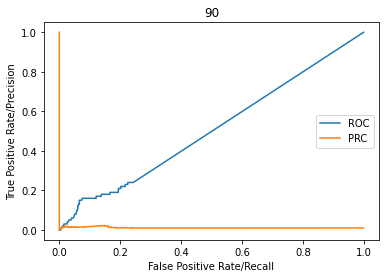

PRC AUC:0.011059763637796451
ROC AUC:0.5058353535353535


In [1559]:
fpr91, tpr91, thresholds91 = roc_curve(Y_test[:,90], probs[:,90])
prec91, recall91, thresholds91 = precision_recall_curve(Y_test[:,90], probs[:,90])

plt.plot(fpr91,tpr91,label="ROC")
plt.plot(recall91,prec91,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('90')
plt.show()

print("PRC AUC:" + str(auc(recall91, prec91)))
print("ROC AUC:" + str(auc(fpr91, tpr91)))

In [1560]:
score_true_91=[]

In [1561]:
for x in range(0,iteration):
  if probs[x][90]>=0.5:
    score_true_91.append(1)
  else:
    score_true_91.append(0)

score_true_91

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1562]:
score_true_correct_index_91_LCS=[]
score_true_wrong_index_91_LCS=[]

In [1563]:
for x in range(0,iteration):
  if score_true_91[x]!=Y_test[x,90]:
    score_true_wrong_index_91_LCS.append(x+1)
  else:
    score_true_correct_index_91_LCS.append(x+1)

In [1564]:
correct_90=len(score_true_correct_index_91_LCS)
accuracy_91=correct_90/iteration

#### Class 91

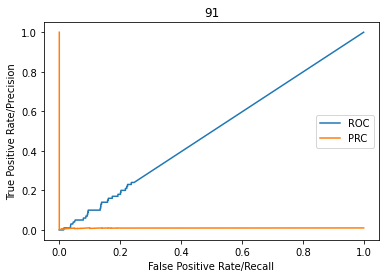

PRC AUC:0.009539434144678595
ROC AUC:0.4949328282828283


In [1565]:
fpr92, tpr92, thresholds92 = roc_curve(Y_test[:,91], probs[:, 91])
prec92, recall92, thresholds92 = precision_recall_curve(Y_test[:,91], probs[:, 91])

plt.plot(fpr92,tpr92,label="ROC")
plt.plot(recall92,prec92,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('91')
plt.show()

print("PRC AUC:" + str(auc(recall92, prec92)))
print("ROC AUC:" + str(auc(fpr92, tpr92)))

In [1566]:
score_true_92=[]

In [1567]:
for x in range(0,iteration):
  if probs[x][91]>=0.5:
    score_true_92.append(1)
  else:
    score_true_92.append(0)

score_true_92

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1568]:
score_true_correct_index_92_LCS=[]
score_true_wrong_index_92_LCS=[]

In [1569]:
for x in range(0,iteration):
  if score_true_92[x]!=Y_test[x,91]:
    score_true_wrong_index_92_LCS.append(x+1)
  else:
    score_true_correct_index_92_LCS.append(x+1)

In [1570]:
correct_91=len(score_true_correct_index_92_LCS)
accuracy_92=correct_91/iteration

#### Class 92

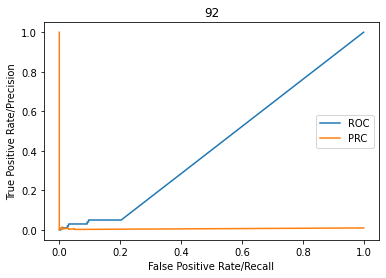

PRC AUC:0.006229893302718088
ROC AUC:0.42591717171717175


In [1571]:
fpr93, tpr93, thresholds93 = roc_curve(Y_test[:,92], probs[:, 92])
prec93, recall93, thresholds93 = precision_recall_curve(Y_test[:,92], probs[:,92])

plt.plot(fpr93,tpr93,label="ROC")
plt.plot(recall93,prec93,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('92')
plt.show()

print("PRC AUC:" + str(auc(recall93, prec93)))
print("ROC AUC:" + str(auc(fpr93, tpr93)))

In [1572]:
score_true_93=[]

In [1573]:
for x in range(0,iteration):
  if probs[x][92]>=0.5:
    score_true_93.append(1)
  else:
    score_true_93.append(0)

score_true_93

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1574]:
score_true_correct_index_93_LCS=[]
score_true_wrong_index_93_LCS=[]

In [1575]:
for x in range(0,iteration):
  if score_true_93[x]!=Y_test[x,92]:
    score_true_wrong_index_93_LCS.append(x+1)
  else:
    score_true_correct_index_93_LCS.append(x+1)

In [1576]:
correct_92=len(score_true_correct_index_93_LCS)
accuracy_93=correct_92/iteration

#### Class 93

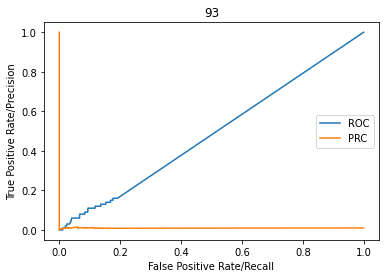

PRC AUC:0.009276954100106972
ROC AUC:0.4865686868686868


In [1577]:
fpr94, tpr94, thresholds94 = roc_curve(Y_test[:,93], probs[:, 93])
prec94, recall94, thresholds94 = precision_recall_curve(Y_test[:,93], probs[:, 93])

plt.plot(fpr94,tpr94,label="ROC")
plt.plot(recall94,prec94,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('93')
plt.show()

print("PRC AUC:" + str(auc(recall94, prec94)))
print("ROC AUC:" + str(auc(fpr94, tpr94)))

In [1578]:
score_true_94=[]

In [1579]:
for x in range(0,iteration):
  if probs[x][93]>=0.5:
    score_true_94.append(1)
  else:
    score_true_94.append(0)

score_true_94

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1580]:
score_true_correct_index_94_LCS=[]
score_true_wrong_index_94_LCS=[]

In [1581]:
for x in range(0,iteration):
  if score_true_94[x]!=Y_test[x,93]:
    score_true_wrong_index_94_LCS.append(x+1)
  else:
    score_true_correct_index_94_LCS.append(x+1)

In [1582]:
correct_93=len(score_true_correct_index_94_LCS)
accuracy_94=correct_93/iteration

#### Class 94

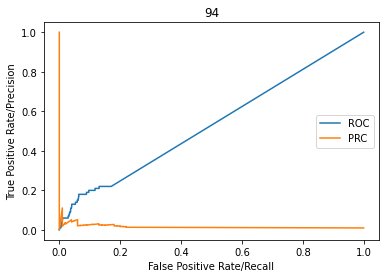

PRC AUC:0.015297571388552107
ROC AUC:0.5332287878787879


In [1583]:
fpr95, tpr95, thresholds95 = roc_curve(Y_test[:,94], probs[:, 94])
prec95, recall95, thresholds95 = precision_recall_curve(Y_test[:,94], probs[:,94])

plt.plot(fpr95,tpr95,label="ROC")
plt.plot(recall95,prec95,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('94')
plt.show()

print("PRC AUC:" + str(auc(recall95, prec95)))
print("ROC AUC:" + str(auc(fpr95, tpr95)))

In [1584]:
score_true_95=[]

In [1585]:
for x in range(0,iteration):
  if probs[x][94]>=0.5:
    score_true_95.append(1)
  else:
    score_true_95.append(0)

score_true_95

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1586]:
score_true_correct_index_95_LCS=[]
score_true_wrong_index_95_LCS=[]

In [1587]:
for x in range(0,iteration):
  if score_true_95[x]!=Y_test[x,94]:
    score_true_wrong_index_95_LCS.append(x+1)
  else:
    score_true_correct_index_95_LCS.append(x+1)

In [1588]:
correct_94=len(score_true_correct_index_95_LCS)
accuracy_95=correct_94/iteration

#### Class 95

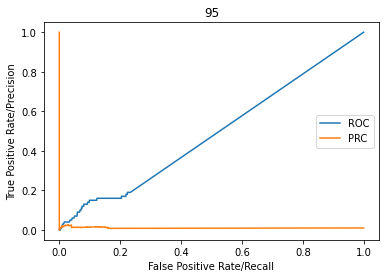

PRC AUC:0.010032086884191323
ROC AUC:0.48509797979797975


In [1589]:
fpr96, tpr96, thresholds96 = roc_curve(Y_test[:,95], probs[:,95])
prec96, recall96, thresholds96 = precision_recall_curve(Y_test[:,95], probs[:,95])

plt.plot(fpr96,tpr96,label="ROC")
plt.plot(recall96,prec96,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('95')
plt.show()

print("PRC AUC:" + str(auc(recall96, prec96)))
print("ROC AUC:" + str(auc(fpr96, tpr96)))

In [1590]:
score_true_96=[]

In [1591]:
for x in range(0,iteration):
  if probs[x][95]>=0.5:
    score_true_96.append(1)
  else:
    score_true_96.append(0)

score_true_96

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1592]:
score_true_correct_index_96_LCS=[]
score_true_wrong_index_96_LCS=[]

In [1593]:
for x in range(0,iteration):
  if score_true_96[x]!=Y_test[x,95]:
    score_true_wrong_index_96_LCS.append(x+1)
  else:
    score_true_correct_index_96_LCS.append(x+1)

In [1594]:
correct_95=len(score_true_correct_index_96_LCS)
accuracy_96=correct_95/iteration

#### Class 96

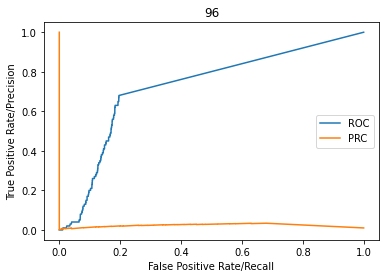

PRC AUC:0.02279871732688712
ROC AUC:0.7213262626262628


In [1595]:
fpr97, tpr97, thresholds97 = roc_curve(Y_test[:,96], probs[:,96])
prec97, recall97, thresholds97 = precision_recall_curve(Y_test[:,96], probs[:,96])

plt.plot(fpr97,tpr97,label="ROC")
plt.plot(recall97,prec97,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('96')
plt.show()

print("PRC AUC:" + str(auc(recall97, prec97)))
print("ROC AUC:" + str(auc(fpr97, tpr97)))

In [1596]:
score_true_97=[]

In [1597]:
for x in range(0,iteration):
  if probs[x][96]>=0.5:
    score_true_97.append(1)
  else:
    score_true_97.append(0)

score_true_97

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1598]:
score_true_correct_index_97_LCS=[]
score_true_wrong_index_97_LCS=[]

In [1599]:
for x in range(0,iteration):
  if score_true_97[x]!=Y_test[x,96]:
    score_true_wrong_index_97_LCS.append(x+1)
  else:
    score_true_correct_index_97_LCS.append(x+1)

In [1600]:
correct_96=len(score_true_correct_index_97_LCS)
accuracy_97=correct_96/iteration

#### Class 97

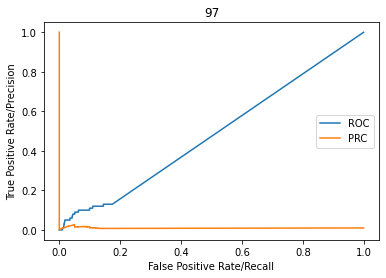

PRC AUC:0.00946211974251976
ROC AUC:0.48257121212121207


In [1601]:
fpr98, tpr98, thresholds98 = roc_curve(Y_test[:,97], probs[:, 97])
prec98, recall98, thresholds98 = precision_recall_curve(Y_test[:,97], probs[:,97])

plt.plot(fpr98,tpr98,label="ROC")
plt.plot(recall98,prec98,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('97')
plt.show()

print("PRC AUC:" + str(auc(recall98, prec98)))
print("ROC AUC:" + str(auc(fpr98, tpr98)))

In [1602]:
score_true_98=[]

In [1603]:
for x in range(0,iteration):
  if probs[x][97]>=0.5:
    score_true_98.append(1)
  else:
    score_true_98.append(0)

score_true_98

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1604]:
score_true_correct_index_98_LCS=[]
score_true_wrong_index_98_LCS=[]

In [1605]:
for x in range(0,iteration):
  if score_true_98[x]!=Y_test[x,97]:
    score_true_wrong_index_98_LCS.append(x+1)
  else:
    score_true_correct_index_98_LCS.append(x+1)

In [1606]:
correct_97=len(score_true_correct_index_98_LCS)
accuracy_98=correct_97/iteration

#### Class 98

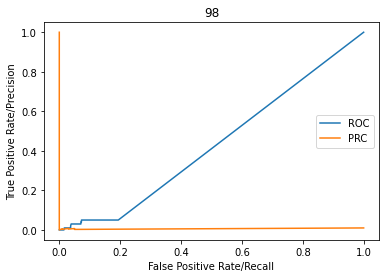

PRC AUC:0.006232933817947803
ROC AUC:0.430579797979798


In [1607]:
fpr99, tpr99, thresholds99 = roc_curve(Y_test[:,98], probs[:,98])
prec99, recall99, thresholds99 = precision_recall_curve(Y_test[:,98], probs[:,98])

plt.plot(fpr99,tpr99,label="ROC")
plt.plot(recall99,prec99,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('98')
plt.show()

print("PRC AUC:" + str(auc(recall99, prec99)))
print("ROC AUC:" + str(auc(fpr99, tpr99)))

In [1608]:
score_true_99=[]

In [1609]:
for x in range(0,iteration):
  if probs[x][98]>=0.5:
    score_true_99.append(1)
  else:
    score_true_99.append(0)

score_true_99

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1610]:
score_true_correct_index_99_LCS=[]
score_true_wrong_index_99_LCS=[]

In [1611]:
for x in range(0,iteration):
  if score_true_99[x]!=Y_test[x,98]:
    score_true_wrong_index_99_LCS.append(x+1)
  else:
    score_true_correct_index_99_LCS.append(x+1)

In [1612]:
correct_98=len(score_true_correct_index_99_LCS)
accuracy_99=correct_98/iteration

#### Class 99

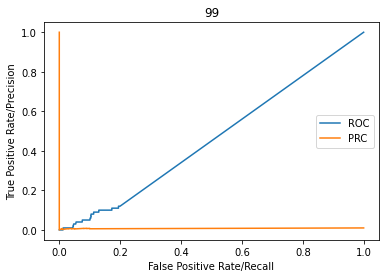

PRC AUC:0.0077654548843267114
ROC AUC:0.4606515151515152


In [1613]:
fpr100, tpr100, thresholds100 = roc_curve(Y_test[:,99], probs[:,99])
prec100, recall100, thresholds100 = precision_recall_curve(Y_test[:,99], probs[:,99])

plt.plot(fpr100,tpr100,label="ROC")
plt.plot(recall100,prec100,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('99')
plt.show()

print("PRC AUC:" + str(auc(recall100, prec100)))
print("ROC AUC:" + str(auc(fpr100, tpr100)))

In [1614]:
score_true_100=[]

In [1615]:
for x in range(0,iteration):
  if probs[x][99]>=0.5:
    score_true_100.append(1)
  else:
    score_true_100.append(0)

score_true_100

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1616]:
score_true_correct_index_100_LCS=[]
score_true_wrong_index_100_LCS=[]

In [1617]:
for x in range(0,iteration):
  if score_true_100[x]!=Y_test[x,99]:
    score_true_wrong_index_100_LCS.append(x+1)
  else:
    score_true_correct_index_100_LCS.append(x+1)

In [1618]:
correct_99=len(score_true_correct_index_100_LCS)
accuracy_100=correct_99/iteration

#**Black box instances**

In [1619]:
correct='correct'
incorrect='incorrect'

##**0-19**

###**0-9**

####Class 0

In [1620]:
correct_NN_1= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_0_correct.csv")
incorrect_NN_1=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_0_incorrect.csv")


#correct_NN_1= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_0_correct.csv")
#incorrect_NN_1=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_0_incorrect.csv")

correct_nn_1=correct_NN_1[correct].values
incorrect_nn_1=incorrect_NN_1[incorrect].values

In [1621]:
correct_1n=len(correct_nn_1)
accuracy_1n=correct_1n/iteration

####Class 1

In [1622]:
correct_NN_2= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_1_correct.csv")
incorrect_NN_2=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_1_incorrect.csv")

#correct_NN_2= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_1_correct.csv")
#incorrect_NN_2=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_1_incorrect.csv")

correct_nn_2=correct_NN_2[correct].values
incorrect_nn_2=incorrect_NN_2[incorrect].values

In [1623]:
correct_2n=len(correct_nn_2)
accuracy_2n=correct_2n/iteration

####Class 2

In [1624]:
correct_NN_3= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_2_correct.csv")
incorrect_NN_3=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_2_incorrect.csv")

#correct_NN_3= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_2_correct.csv")
#incorrect_NN_3=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_2_incorrect.csv")

correct_nn_3=correct_NN_3[correct].values
incorrect_nn_3=incorrect_NN_3[incorrect].values

In [1625]:
correct_3n=len(correct_nn_3)
accuracy_3n=correct_3n/iteration

####Class 3

In [1626]:
correct_NN_4= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_3_correct.csv")
incorrect_NN_4=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_3_incorrect.csv")

#correct_NN_4= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_3_correct.csv")
#incorrect_NN_4=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_3_incorrect.csv")

correct_nn_4=correct_NN_4[correct].values
incorrect_nn_4=incorrect_NN_4[incorrect].values

In [1627]:
correct_4n=len(correct_nn_4)
accuracy_4n=correct_4n/iteration

####Class 4

In [1628]:
correct_NN_5= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_4_correct.csv")
incorrect_NN_5=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_4_incorrect.csv")

#correct_NN_5= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_4_correct.csv")
#incorrect_NN_5=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_4_incorrect.csv")

correct_nn_5=correct_NN_5[correct].values
incorrect_nn_5=incorrect_NN_5[incorrect].values

In [1629]:
correct_5n=len(correct_nn_5)
accuracy_5n=correct_5n/iteration

####Class 5

In [1630]:
correct_NN_6= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_5_correct.csv")
incorrect_NN_6=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_5_incorrect.csv")

#correct_NN_6= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_5_correct.csv")
#incorrect_NN_6=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_5_incorrect.csv")

correct_nn_6=correct_NN_6[correct].values
incorrect_nn_6=incorrect_NN_6[incorrect].values

In [1631]:
correct_6n=len(correct_nn_6)
accuracy_6n=correct_6n/iteration

####Class 6

In [1632]:
correct_NN_7= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_6_correct.csv")
incorrect_NN_7=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_6_incorrect.csv")

#correct_NN_7= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_6_correct.csv")
#incorrect_NN_7=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_6_incorrect.csv")

correct_nn_7=correct_NN_7[correct].values
incorrect_nn_7=incorrect_NN_7[incorrect].values

In [1633]:
correct_7n=len(correct_nn_7)
accuracy_7n=correct_7n/iteration

####Class 7

In [1634]:
correct_NN_8= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_7_correct.csv")
incorrect_NN_8=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_7_incorrect.csv")

#correct_NN_8= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_7_correct.csv")
#incorrect_NN_8=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_7_incorrect.csv")

correct_nn_8=correct_NN_8[correct].values
incorrect_nn_8=incorrect_NN_8[incorrect].values

In [1635]:
correct_8n=len(correct_nn_8)
accuracy_8n=correct_8n/iteration

####Class 8

In [1636]:
correct_NN_9= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_8_correct.csv")
incorrect_NN_9=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_8_incorrect.csv")

#correct_NN_9= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_8_correct.csv")
#incorrect_NN_9=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_8_incorrect.csv")

correct_nn_9=correct_NN_9[correct].values
incorrect_nn_9=incorrect_NN_9[incorrect].values

In [1637]:
correct_9n=len(correct_nn_9)
accuracy_9n=correct_9n/iteration

####Class 9

In [1638]:
correct_NN_10= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_9_correct.csv")
incorrect_NN_10=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_9_incorrect.csv")

#correct_NN_10= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_9_correct.csv")
#incorrect_NN_10=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_9_incorrect.csv")

correct_nn_10=correct_NN_10[correct].values
incorrect_nn_10=incorrect_NN_10[incorrect].values

In [1639]:
correct_10n=len(correct_nn_10)
accuracy_10n=correct_10n/iteration

###**10-19**

####Class 10

In [1640]:
correct_NN_11= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_10_correct.csv")
incorrect_NN_11=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_10_incorrect.csv")


#correct_NN_11= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_10_correct.csv")
#incorrect_NN_11=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_10_incorrect.csv")

correct_nn_11=correct_NN_11[correct].values
incorrect_nn_11=incorrect_NN_11[incorrect].values

In [1641]:
correct_11n=len(correct_nn_11)
accuracy_11n=correct_11n/iteration

####Class 11

In [1642]:
correct_NN_12= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_11_correct.csv")
incorrect_NN_12=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_11_incorrect.csv")

#correct_NN_12= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_11_correct.csv")
#incorrect_NN_12=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_11_incorrect.csv")

correct_nn_12=correct_NN_12[correct].values
incorrect_nn_12=incorrect_NN_12[incorrect].values

In [1643]:
correct_12n=len(correct_nn_12)
accuracy_12n=correct_12n/iteration

####Class 12

In [1644]:
correct_NN_13= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_12_correct.csv")
incorrect_NN_13=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_12_incorrect.csv")

#correct_NN_13= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_12_correct.csv")
#incorrect_NN_13=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_12_incorrect.csv")

correct_nn_13=correct_NN_13[correct].values
incorrect_nn_13=incorrect_NN_13[incorrect].values

In [1645]:
correct_13n=len(correct_nn_13)
accuracy_13n=correct_13n/iteration

####Class 13

In [1646]:
correct_NN_14= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_13_correct.csv")
incorrect_NN_14=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_13_incorrect.csv")

#correct_NN_14= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_13_correct.csv")
#incorrect_NN_14=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_13_incorrect.csv")

correct_nn_14=correct_NN_14[correct].values
incorrect_nn_14=incorrect_NN_14[incorrect].values

In [1647]:
correct_14n=len(correct_nn_14)
accuracy_14n=correct_14n/iteration

####Class 14

In [1648]:
correct_NN_15= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_14_correct.csv")
incorrect_NN_15=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_14_incorrect.csv")

#correct_NN_15= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_14_correct.csv")
#incorrect_NN_15=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_14_incorrect.csv")

correct_nn_15=correct_NN_15[correct].values
incorrect_nn_15=incorrect_NN_15[incorrect].values

In [1649]:
correct_15n=len(correct_nn_15)
accuracy_15n=correct_15n/iteration

####Class 15

In [1650]:
correct_NN_16= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_15_correct.csv")
incorrect_NN_16=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_15_incorrect.csv")

#correct_NN_16= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_15_correct.csv")
#incorrect_NN_16=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_15_incorrect.csv")

correct_nn_16=correct_NN_16[correct].values
incorrect_nn_16=incorrect_NN_16[incorrect].values

In [1651]:
correct_16n=len(correct_nn_16)
accuracy_16n=correct_16n/iteration

####Class 16

In [1652]:
correct_NN_17= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_16_correct.csv")
incorrect_NN_17=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_16_incorrect.csv")

#correct_NN_17= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_16_correct.csv")
#incorrect_NN_17=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_16_incorrect.csv")

correct_nn_17=correct_NN_17[correct].values
incorrect_nn_17=incorrect_NN_17[incorrect].values

In [1653]:
correct_17n=len(correct_nn_17)
accuracy_17n=correct_17n/iteration

####Class 17

In [1654]:
correct_NN_18= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_17_correct.csv")
incorrect_NN_18=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_17_incorrect.csv")

#correct_NN_18= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_17_correct.csv")
#incorrect_NN_18=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_17_incorrect.csv")

correct_nn_18=correct_NN_18[correct].values
incorrect_nn_18=incorrect_NN_18[incorrect].values

In [1655]:
correct_18n=len(correct_nn_18)
accuracy_18n=correct_18n/iteration

####Class 18

In [1656]:
correct_NN_19= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_18_correct.csv")
incorrect_NN_19=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_18_incorrect.csv")

#correct_NN_19= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_18_correct.csv")
#incorrect_NN_19=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_18_incorrect.csv")

correct_nn_19=correct_NN_19[correct].values
incorrect_nn_19=incorrect_NN_19[incorrect].values

In [1657]:
correct_19n=len(correct_nn_19)
accuracy_19n=correct_19n/iteration

####Class 19

In [1658]:
correct_NN_20= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_19_correct.csv")
incorrect_NN_20=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_19_incorrect.csv")

#correct_NN_20= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_19_correct.csv")
#incorrect_NN_20=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_19_incorrect.csv")

correct_nn_20=correct_NN_20[correct].values
incorrect_nn_20=incorrect_NN_20[incorrect].values

In [1659]:
correct_20n=len(correct_nn_20)
accuracy_20n=correct_20n/iteration

##**20-39**

###**20-29**

####Class 20

In [1660]:
correct_NN_21= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_20_correct.csv")
incorrect_NN_21=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_20_incorrect.csv")


#correct_NN_21= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_20_correct.csv")
#incorrect_NN_21=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_20_incorrect.csv")

correct_nn_21=correct_NN_21[correct].values
incorrect_nn_21=incorrect_NN_21[incorrect].values

In [1661]:
correct_21n=len(correct_nn_21)
accuracy_21n=correct_21n/iteration

####Class 21

In [1662]:
correct_NN_22= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_21_correct.csv")
incorrect_NN_22=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_21_incorrect.csv")

#correct_NN_22= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_21_correct.csv")
#incorrect_NN_22=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_21_incorrect.csv")

correct_nn_22=correct_NN_22[correct].values
incorrect_nn_22=incorrect_NN_22[incorrect].values

In [1663]:
correct_22n=len(correct_nn_22)
accuracy_22n=correct_22n/iteration

####Class 22

In [1664]:
correct_NN_23= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_22_correct.csv")
incorrect_NN_23=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_22_incorrect.csv")

#correct_NN_23= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_22_correct.csv")
#incorrect_NN_23=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_22_incorrect.csv")

correct_nn_23=correct_NN_23[correct].values
incorrect_nn_23=incorrect_NN_23[incorrect].values

In [1665]:
correct_23n=len(correct_nn_23)
accuracy_23n=correct_23n/iteration

####Class 23

In [1666]:
correct_NN_24= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_23_correct.csv")
incorrect_NN_24=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_23_incorrect.csv")

#correct_NN_24= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_23_correct.csv")
#incorrect_NN_24=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_23_incorrect.csv")

correct_nn_24=correct_NN_24[correct].values
incorrect_nn_24=incorrect_NN_24[incorrect].values

In [1667]:
correct_24n=len(correct_nn_24)
accuracy_24n=correct_24n/iteration

####Class 24

In [1668]:
correct_NN_25= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_24_correct.csv")
incorrect_NN_25=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_24_incorrect.csv")

#correct_NN_25= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_24_correct.csv")
#incorrect_NN_25=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_24_incorrect.csv")

correct_nn_25=correct_NN_25[correct].values
incorrect_nn_25=incorrect_NN_25[incorrect].values

In [1669]:
correct_25n=len(correct_nn_25)
accuracy_25n=correct_25n/iteration

####Class 25

In [1670]:
correct_NN_26= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_25_correct.csv")
incorrect_NN_26=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_25_incorrect.csv")

#correct_NN_26= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_25_correct.csv")
#incorrect_NN_26=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_25_incorrect.csv")

correct_nn_26=correct_NN_26[correct].values
incorrect_nn_26=incorrect_NN_26[incorrect].values

In [1671]:
correct_26n=len(correct_nn_26)
accuracy_26n=correct_26n/iteration

####Class 26

In [1672]:
correct_NN_27= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_26_correct.csv")
incorrect_NN_27=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_26_incorrect.csv")

#correct_NN_27= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_26_correct.csv")
#incorrect_NN_27=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_26_incorrect.csv")

correct_nn_27=correct_NN_27[correct].values
incorrect_nn_27=incorrect_NN_27[incorrect].values

In [1673]:
correct_27n=len(correct_nn_27)
accuracy_27n=correct_27n/iteration

####Class 27

In [1674]:
correct_NN_28= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_27_correct.csv")
incorrect_NN_28=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_27_incorrect.csv")

#correct_NN_28= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_27_correct.csv")
#incorrect_NN_28=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_27_incorrect.csv")

correct_nn_28=correct_NN_28[correct].values
incorrect_nn_28=incorrect_NN_28[incorrect].values

In [1675]:
correct_28n=len(correct_nn_28)
accuracy_28n=correct_28n/iteration

####Class 28

In [1676]:
correct_NN_29= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_28_correct.csv")
incorrect_NN_29=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_28_incorrect.csv")

#correct_NN_29= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_28_correct.csv")
#incorrect_NN_29=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_28_incorrect.csv")

correct_nn_29=correct_NN_29[correct].values
incorrect_nn_29=incorrect_NN_29[incorrect].values

In [1677]:
correct_29n=len(correct_nn_29)
accuracy_29n=correct_29n/iteration

####Class 29

In [1678]:
correct_NN_30= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_29_correct.csv")
incorrect_NN_30=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_29_incorrect.csv")

#correct_NN_30= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_29_correct.csv")
#incorrect_NN_30=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_29_incorrect.csv")

correct_nn_30=correct_NN_30[correct].values
incorrect_nn_30=incorrect_NN_30[incorrect].values

In [1679]:
correct_30n=len(correct_nn_30)
accuracy_30n=correct_30n/iteration

###**30-39**

####Class 30

In [1680]:
correct_NN_31= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_30_correct.csv")
incorrect_NN_31=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_30_incorrect.csv")


#correct_NN_31= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_30_correct.csv")
#incorrect_NN_31=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_30_incorrect.csv")

correct_nn_31=correct_NN_31[correct].values
incorrect_nn_31=incorrect_NN_31[incorrect].values

In [1681]:
correct_31n=len(correct_nn_31)
accuracy_31n=correct_31n/iteration

####Class 31

In [1682]:
correct_NN_32= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_31_correct.csv")
incorrect_NN_32=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_31_incorrect.csv")

#correct_NN_32= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_31_correct.csv")
#incorrect_NN_32=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_31_incorrect.csv")

correct_nn_32=correct_NN_32[correct].values
incorrect_nn_32=incorrect_NN_32[incorrect].values

In [1683]:
correct_32n=len(correct_nn_32)
accuracy_32n=correct_32n/iteration

####Class 32

In [1684]:
correct_NN_33= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_32_correct.csv")
incorrect_NN_33=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_32_incorrect.csv")

#correct_NN_33= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_32_correct.csv")
#incorrect_NN_33=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_32_incorrect.csv")

correct_nn_33=correct_NN_33[correct].values
incorrect_nn_33=incorrect_NN_33[incorrect].values

In [1685]:
correct_33n=len(correct_nn_33)
accuracy_33n=correct_33n/iteration

####Class 33

In [1686]:
correct_NN_34= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_33_correct.csv")
incorrect_NN_34=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_33_incorrect.csv")

#correct_NN_34= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_33_correct.csv")
#incorrect_NN_34=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_33_incorrect.csv")

correct_nn_34=correct_NN_34[correct].values
incorrect_nn_34=incorrect_NN_34[incorrect].values

In [1687]:
correct_34n=len(correct_nn_34)
accuracy_34n=correct_34n/iteration

####Class 34

In [1688]:
correct_NN_35= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_34_correct.csv")
incorrect_NN_35=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_34_incorrect.csv")

#correct_NN_35= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_34_correct.csv")
#incorrect_NN_35=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_34_incorrect.csv")

correct_nn_35=correct_NN_35[correct].values
incorrect_nn_35=incorrect_NN_35[incorrect].values

In [1689]:
correct_35n=len(correct_nn_35)
accuracy_35n=correct_35n/iteration

####Class 35

In [1690]:
correct_NN_36= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_35_correct.csv")
incorrect_NN_36=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_35_incorrect.csv")

#correct_NN_36= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_35_correct.csv")
#incorrect_NN_36=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_35_incorrect.csv")

correct_nn_36=correct_NN_36[correct].values
incorrect_nn_36=incorrect_NN_36[incorrect].values

In [1691]:
correct_36n=len(correct_nn_36)
accuracy_36n=correct_36n/iteration

####Class 36

In [1692]:
correct_NN_37= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_36_correct.csv")
incorrect_NN_37=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_36_incorrect.csv")

#correct_NN_37= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_36_correct.csv")
#incorrect_NN_37=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_36_incorrect.csv")

correct_nn_37=correct_NN_37[correct].values
incorrect_nn_37=incorrect_NN_37[incorrect].values

In [1693]:
correct_37n=len(correct_nn_37)
accuracy_37n=correct_37n/iteration

####Class 37

In [1694]:
correct_NN_38= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_37_correct.csv")
incorrect_NN_38=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_37_incorrect.csv")

#correct_NN_38= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_37_correct.csv")
#incorrect_NN_38=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_37_incorrect.csv")

correct_nn_38=correct_NN_38[correct].values
incorrect_nn_38=incorrect_NN_38[incorrect].values

In [1695]:
correct_38n=len(correct_nn_38)
accuracy_38n=correct_38n/iteration

####Class 38

In [1696]:
correct_NN_39= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_38_correct.csv")
incorrect_NN_39=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_38_incorrect.csv")

#correct_NN_39= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_38_correct.csv")
#incorrect_NN_39=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_38_incorrect.csv")

correct_nn_39=correct_NN_39[correct].values
incorrect_nn_39=incorrect_NN_39[incorrect].values

In [1697]:
correct_39n=len(correct_nn_39)
accuracy_39n=correct_39n/iteration

####Class 39

In [1698]:
correct_NN_40= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_39_correct.csv")
incorrect_NN_40=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_39_incorrect.csv")

#correct_NN_40= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_39_correct.csv")
#incorrect_NN_40=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_39_incorrect.csv")

correct_nn_40=correct_NN_40[correct].values
incorrect_nn_40=incorrect_NN_40[incorrect].values

In [1699]:
correct_40n=len(correct_nn_40)
accuracy_40n=correct_40n/iteration

##**40-59**

###**40-49**

####Class 40

In [1700]:
correct_NN_41= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_40_correct.csv")
incorrect_NN_41=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_40_incorrect.csv")


#correct_NN_41= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_40_correct.csv")
#incorrect_NN_41=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_40_incorrect.csv")

correct_nn_41=correct_NN_41[correct].values
incorrect_nn_41=incorrect_NN_41[incorrect].values

In [1701]:
correct_41n=len(correct_nn_41)
accuracy_41n=correct_41n/iteration

####Class 41

In [1702]:
correct_NN_42= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_41_correct.csv")
incorrect_NN_42=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_41_incorrect.csv")

#correct_NN_42= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_41_correct.csv")
#incorrect_NN_42=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_41_incorrect.csv")

correct_nn_42=correct_NN_42[correct].values
incorrect_nn_42=incorrect_NN_42[incorrect].values

In [1703]:
correct_42n=len(correct_nn_42)
accuracy_42n=correct_42n/iteration

####Class 42

In [1704]:
correct_NN_43= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_42_correct.csv")
incorrect_NN_43=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_42_incorrect.csv")

#correct_NN_43= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_42_correct.csv")
#incorrect_NN_43=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_42_incorrect.csv")

correct_nn_43=correct_NN_43[correct].values
incorrect_nn_43=incorrect_NN_43[incorrect].values

In [1705]:
correct_43n=len(correct_nn_43)
accuracy_43n=correct_43n/iteration

####Class 43

In [1706]:
correct_NN_44= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_43_correct.csv")
incorrect_NN_44=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_43_incorrect.csv")

#correct_NN_44= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_43_correct.csv")
#incorrect_NN_44=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_43_incorrect.csv")

correct_nn_44=correct_NN_44[correct].values
incorrect_nn_44=incorrect_NN_44[incorrect].values

In [1707]:
correct_44n=len(correct_nn_44)
accuracy_44n=correct_44n/iteration

####Class 44

In [1708]:
correct_NN_45= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_44_correct.csv")
incorrect_NN_45=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_44_incorrect.csv")

#correct_NN_45= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_44_correct.csv")
#incorrect_NN_45=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_44_incorrect.csv")

correct_nn_45=correct_NN_45[correct].values
incorrect_nn_45=incorrect_NN_45[incorrect].values

In [1709]:
correct_45n=len(correct_nn_45)
accuracy_45n=correct_45n/iteration

####Class 45

In [1710]:
correct_NN_46= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_45_correct.csv")
incorrect_NN_46=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_45_incorrect.csv")

#correct_NN_46= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_45_correct.csv")
#incorrect_NN_46=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_45_incorrect.csv")

correct_nn_46=correct_NN_46[correct].values
incorrect_nn_46=incorrect_NN_46[incorrect].values

In [1711]:
correct_46n=len(correct_nn_46)
accuracy_46n=correct_46n/iteration

####Class 46

In [1712]:
correct_NN_47= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_46_correct.csv")
incorrect_NN_47=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_46_incorrect.csv")

#correct_NN_47= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_46_correct.csv")
#incorrect_NN_47=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_46_incorrect.csv")

correct_nn_47=correct_NN_47[correct].values
incorrect_nn_47=incorrect_NN_47[incorrect].values

In [1713]:
correct_47n=len(correct_nn_47)
accuracy_47n=correct_47n/iteration

####Class 47

In [1714]:
correct_NN_48= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_47_correct.csv")
incorrect_NN_48=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_47_incorrect.csv")

#correct_NN_48= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_47_correct.csv")
#incorrect_NN_48=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_47_incorrect.csv")

correct_nn_48=correct_NN_48[correct].values
incorrect_nn_48=incorrect_NN_48[incorrect].values

In [1715]:
correct_48n=len(correct_nn_48)
accuracy_48n=correct_48n/iteration

####Class 48

In [1716]:
correct_NN_49= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_48_correct.csv")
incorrect_NN_49=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_48_incorrect.csv")

#correct_NN_49= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_48_correct.csv")
#incorrect_NN_49=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_48_incorrect.csv")

correct_nn_49=correct_NN_49[correct].values
incorrect_nn_49=incorrect_NN_49[incorrect].values

In [1717]:
correct_49n=len(correct_nn_49)
accuracy_49n=correct_49n/iteration

####Class 49

In [1718]:
correct_NN_50= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_49_correct.csv")
incorrect_NN_50=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_49_incorrect.csv")

#correct_NN_50= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_49_correct.csv")
#incorrect_NN_50=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_49_incorrect.csv")

correct_nn_50=correct_NN_50[correct].values
incorrect_nn_50=incorrect_NN_50[incorrect].values

In [1719]:
correct_50n=len(correct_nn_50)
accuracy_50n=correct_50n/iteration

###**50-59**

####Class 50

In [1720]:
correct_NN_51= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_50_correct.csv")
incorrect_NN_51=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_50_incorrect.csv")


#correct_NN_51= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_50_correct.csv")
#incorrect_NN_51=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_50_incorrect.csv")

correct_nn_51=correct_NN_51[correct].values
incorrect_nn_51=incorrect_NN_51[incorrect].values

In [1721]:
correct_51n=len(correct_nn_51)
accuracy_51n=correct_51n/iteration

####Class 51

In [1722]:
correct_NN_52= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_51_correct.csv")
incorrect_NN_52=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_51_incorrect.csv")

#correct_NN_52= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_51_correct.csv")
#incorrect_NN_52=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_51_incorrect.csv")

correct_nn_52=correct_NN_52[correct].values
incorrect_nn_52=incorrect_NN_52[incorrect].values

In [1723]:
correct_52n=len(correct_nn_52)
accuracy_52n=correct_52n/iteration

####Class 52

In [1724]:
correct_NN_53= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_52_correct.csv")
incorrect_NN_53=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_52_incorrect.csv")

#correct_NN_53= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_52_correct.csv")
#incorrect_NN_53=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_52_incorrect.csv")

correct_nn_53=correct_NN_53[correct].values
incorrect_nn_53=incorrect_NN_53[incorrect].values

In [1725]:
correct_53n=len(correct_nn_53)
accuracy_53n=correct_53n/iteration

####Class 53

In [1726]:
correct_NN_54= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_53_correct.csv")
incorrect_NN_54=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_53_incorrect.csv")

#correct_NN_54= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_53_correct.csv")
#incorrect_NN_54=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_53_incorrect.csv")

correct_nn_54=correct_NN_54[correct].values
incorrect_nn_54=incorrect_NN_54[incorrect].values

In [1727]:
correct_54n=len(correct_nn_54)
accuracy_54n=correct_54n/iteration

####Class 54

In [1728]:
correct_NN_55= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_54_correct.csv")
incorrect_NN_55=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_54_incorrect.csv")

#correct_NN_55= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_54_correct.csv")
#incorrect_NN_55=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_54_incorrect.csv")

correct_nn_55=correct_NN_55[correct].values
incorrect_nn_55=incorrect_NN_55[incorrect].values

In [1729]:
correct_55n=len(correct_nn_55)
accuracy_55n=correct_55n/iteration

####Class 55

In [1730]:
correct_NN_56= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_55_correct.csv")
incorrect_NN_56=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_55_incorrect.csv")

#correct_NN_56= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_55_correct.csv")
#incorrect_NN_56=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_55_incorrect.csv")

correct_nn_56=correct_NN_56[correct].values
incorrect_nn_56=incorrect_NN_56[incorrect].values

In [1731]:
correct_56n=len(correct_nn_56)
accuracy_56n=correct_56n/iteration

####Class 56

In [1732]:
correct_NN_57= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_56_correct.csv")
incorrect_NN_57=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_56_incorrect.csv")

#correct_NN_57= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_56_correct.csv")
#incorrect_NN_57=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_56_incorrect.csv")

correct_nn_57=correct_NN_57[correct].values
incorrect_nn_57=incorrect_NN_57[incorrect].values

In [1733]:
correct_57n=len(correct_nn_57)
accuracy_57n=correct_57n/iteration

####Class 57

In [1734]:
correct_NN_58= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_57_correct.csv")
incorrect_NN_58=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_57_incorrect.csv")

#correct_NN_38= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_57_correct.csv")
#incorrect_NN_38=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_57_incorrect.csv")

correct_nn_58=correct_NN_58[correct].values
incorrect_nn_58=incorrect_NN_58[incorrect].values

In [1735]:
correct_58n=len(correct_nn_58)
accuracy_58n=correct_58n/iteration

####Class 58

In [1736]:
correct_NN_59= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_58_correct.csv")
incorrect_NN_59=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_58_incorrect.csv")

#correct_NN_59= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_58_correct.csv")
#incorrect_NN_59=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_58_incorrect.csv")

correct_nn_59=correct_NN_59[correct].values
incorrect_nn_59=incorrect_NN_59[incorrect].values

In [1737]:
correct_59n=len(correct_nn_59)
accuracy_59n=correct_59n/iteration

####Class 59

In [1738]:
correct_NN_60= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_59_correct.csv")
incorrect_NN_60=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_59_incorrect.csv")

#correct_NN_60= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_59_correct.csv")
#incorrect_NN_60=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_59_incorrect.csv")

correct_nn_60=correct_NN_60[correct].values
incorrect_nn_60=incorrect_NN_60[incorrect].values

In [1739]:
correct_60n=len(correct_nn_60)
accuracy_60n=correct_60n/iteration

##**60-79**

###**60-69**

####Class 60

In [1740]:
correct_NN_61= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_60_correct.csv")
incorrect_NN_61=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_60_incorrect.csv")


#correct_NN_61= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_60_correct.csv")
#incorrect_NN_61=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_60_incorrect.csv")

correct_nn_61=correct_NN_61[correct].values
incorrect_nn_61=incorrect_NN_61[incorrect].values

In [1741]:
correct_61n=len(correct_nn_61)
accuracy_61n=correct_61n/iteration

####Class 61

In [1742]:
correct_NN_62= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_61_correct.csv")
incorrect_NN_62=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_61_incorrect.csv")

#correct_NN_62= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_61_correct.csv")
#incorrect_NN_62=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_61_incorrect.csv")

correct_nn_62=correct_NN_62[correct].values
incorrect_nn_62=incorrect_NN_62[incorrect].values

In [1743]:
correct_62n=len(correct_nn_62)
accuracy_62n=correct_62n/iteration

####Class 62

In [1744]:
correct_NN_63= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_62_correct.csv")
incorrect_NN_63=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_62_incorrect.csv")

#correct_NN_63= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_62_correct.csv")
#incorrect_NN_63=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_62_incorrect.csv")

correct_nn_63=correct_NN_63[correct].values
incorrect_nn_63=incorrect_NN_63[incorrect].values

In [1745]:
correct_63n=len(correct_nn_63)
accuracy_63n=correct_63n/iteration

####Class 63

In [1746]:
correct_NN_64= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_63_correct.csv")
incorrect_NN_64=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_63_incorrect.csv")

#correct_NN_64= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_63_correct.csv")
#incorrect_NN_64=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_63_incorrect.csv")

correct_nn_64=correct_NN_64[correct].values
incorrect_nn_64=incorrect_NN_64[incorrect].values

In [1747]:
correct_64n=len(correct_nn_64)
accuracy_64n=correct_64n/iteration

####Class 64

In [1748]:
correct_NN_65= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_64_correct.csv")
incorrect_NN_65=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_64_incorrect.csv")

#correct_NN_65= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_64_correct.csv")
#incorrect_NN_65=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_64_incorrect.csv")

correct_nn_65=correct_NN_65[correct].values
incorrect_nn_65=incorrect_NN_65[incorrect].values

In [1749]:
correct_65n=len(correct_nn_65)
accuracy_65n=correct_65n/iteration

####Class 65

In [1750]:
correct_NN_66= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_65_correct.csv")
incorrect_NN_66=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_65_incorrect.csv")

#correct_NN_66= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_65_correct.csv")
#incorrect_NN_66=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_65_incorrect.csv")

correct_nn_66=correct_NN_66[correct].values
incorrect_nn_66=incorrect_NN_66[incorrect].values

In [1751]:
correct_66n=len(correct_nn_66)
accuracy_66n=correct_66n/iteration

####Class 66

In [1752]:
correct_NN_67= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_66_correct.csv")
incorrect_NN_67=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_66_incorrect.csv")

#correct_NN_67= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_66_correct.csv")
#incorrect_NN_67=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_66_incorrect.csv")

correct_nn_67=correct_NN_67[correct].values
incorrect_nn_67=incorrect_NN_67[incorrect].values

In [1753]:
correct_67n=len(correct_nn_67)
accuracy_67n=correct_67n/iteration

####Class 67

In [1754]:
correct_NN_68= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_67_correct.csv")
incorrect_NN_68=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_67_incorrect.csv")

#correct_NN_68= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_67_correct.csv")
#incorrect_NN_68=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_67_incorrect.csv")

correct_nn_68=correct_NN_68[correct].values
incorrect_nn_68=incorrect_NN_68[incorrect].values

In [1755]:
correct_68n=len(correct_nn_68)
accuracy_68n=correct_68n/iteration

####Class 68

In [1756]:
correct_NN_69= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_68_correct.csv")
incorrect_NN_69=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_68_incorrect.csv")

#correct_NN_69= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_68_correct.csv")
#incorrect_NN_69=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_68_incorrect.csv")

correct_nn_69=correct_NN_69[correct].values
incorrect_nn_69=incorrect_NN_69[incorrect].values

In [1757]:
correct_69n=len(correct_nn_69)
accuracy_69n=correct_69n/iteration

####Class 69

In [1758]:
correct_NN_70= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_69_correct.csv")
incorrect_NN_70=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_69_incorrect.csv")

#correct_NN_70= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_69_correct.csv")
#incorrect_NN_70=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_69_incorrect.csv")

correct_nn_70=correct_NN_70[correct].values
incorrect_nn_70=incorrect_NN_70[incorrect].values

In [1759]:
correct_70n=len(correct_nn_70)
accuracy_70n=correct_70n/iteration

###**70-79**

####Class 70

In [1760]:
correct_NN_71= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_70_correct.csv")
incorrect_NN_71=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_70_incorrect.csv")


#correct_NN_71= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_70_correct.csv")
#incorrect_NN_71=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_70_incorrect.csv")

correct_nn_71=correct_NN_71[correct].values
incorrect_nn_71=incorrect_NN_71[incorrect].values

In [1761]:
correct_71n=len(correct_nn_71)
accuracy_71n=correct_71n/iteration

####Class 71

In [1762]:
correct_NN_72= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_71_correct.csv")
incorrect_NN_72=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_71_incorrect.csv")

#correct_NN_72= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_71_correct.csv")
#incorrect_NN_72=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_71_incorrect.csv")

correct_nn_72=correct_NN_72[correct].values
incorrect_nn_72=incorrect_NN_72[incorrect].values

In [1763]:
correct_72n=len(correct_nn_72)
accuracy_72n=correct_72n/iteration

####Class 72

In [1764]:
correct_NN_73= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_72_correct.csv")
incorrect_NN_73=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_72_incorrect.csv")

#correct_NN_73= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_72_correct.csv")
#incorrect_NN_73=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_72_incorrect.csv")

correct_nn_73=correct_NN_73[correct].values
incorrect_nn_73=incorrect_NN_73[incorrect].values

In [1765]:
correct_73n=len(correct_nn_73)
accuracy_73n=correct_73n/iteration

####Class 73

In [1766]:
correct_NN_74= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_73_correct.csv")
incorrect_NN_74=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_73_incorrect.csv")

#correct_NN_74= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_73_correct.csv")
#incorrect_NN_74=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_73_incorrect.csv")

correct_nn_74=correct_NN_74[correct].values
incorrect_nn_74=incorrect_NN_74[incorrect].values

In [1767]:
correct_74n=len(correct_nn_74)
accuracy_74n=correct_74n/iteration

####Class 74

In [1768]:
correct_NN_75= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_74_correct.csv")
incorrect_NN_75=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_74_incorrect.csv")

#correct_NN_75= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_74_correct.csv")
#incorrect_NN_75=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_74_incorrect.csv")

correct_nn_75=correct_NN_75[correct].values
incorrect_nn_75=incorrect_NN_75[incorrect].values

In [1769]:
correct_75n=len(correct_nn_75)
accuracy_75n=correct_75n/iteration

####Class 75

In [1770]:
correct_NN_76= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_75_correct.csv")
incorrect_NN_76=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_75_incorrect.csv")

#correct_NN_76= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_75_correct.csv")
#incorrect_NN_76=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_75_incorrect.csv")

correct_nn_76=correct_NN_76[correct].values
incorrect_nn_76=incorrect_NN_76[incorrect].values

In [1771]:
correct_76n=len(correct_nn_76)
accuracy_76n=correct_76n/iteration

####Class 76

In [1772]:
correct_NN_77= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_76_correct.csv")
incorrect_NN_77=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_76_incorrect.csv")

#correct_NN_77= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_76_correct.csv")
#incorrect_NN_77=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_76_incorrect.csv")

correct_nn_77=correct_NN_77[correct].values
incorrect_nn_77=incorrect_NN_77[incorrect].values

In [1773]:
correct_77n=len(correct_nn_77)
accuracy_77n=correct_77n/iteration

####Class 77

In [1774]:
correct_NN_78= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_77_correct.csv")
incorrect_NN_78=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_77_incorrect.csv")

#correct_NN_78= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_77_correct.csv")
#incorrect_NN_78=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_77_incorrect.csv")

correct_nn_78=correct_NN_78[correct].values
incorrect_nn_78=incorrect_NN_78[incorrect].values

In [1775]:
correct_78n=len(correct_nn_78)
accuracy_78n=correct_78n/iteration

####Class 78

In [1776]:
correct_NN_79= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_78_correct.csv")
incorrect_NN_79=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_78_incorrect.csv")

#correct_NN_79= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_78_correct.csv")
#incorrect_NN_79=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_78_incorrect.csv")

correct_nn_79=correct_NN_79[correct].values
incorrect_nn_79=incorrect_NN_79[incorrect].values

In [1777]:
correct_79n=len(correct_nn_79)
accuracy_79n=correct_79n/iteration

####Class 79

In [1778]:
correct_NN_80= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_79_correct.csv")
incorrect_NN_80=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_79_incorrect.csv")

#correct_NN_80= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_79_correct.csv")
#incorrect_NN_80=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_79_incorrect.csv")

correct_nn_80=correct_NN_80[correct].values
incorrect_nn_80=incorrect_NN_80[incorrect].values

In [1779]:
correct_80n=len(correct_nn_80)
accuracy_80n=correct_80n/iteration

##**80-99**

###**80-89**

####Class 80

In [1780]:
correct_NN_81= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_80_correct.csv")
incorrect_NN_81=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_80_incorrect.csv")


#correct_NN_81= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_80_correct.csv")
#incorrect_NN_81=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_80_incorrect.csv")

correct_nn_81=correct_NN_81[correct].values
incorrect_nn_81=incorrect_NN_81[incorrect].values

In [1781]:
correct_81n=len(correct_nn_81)
accuracy_81n=correct_81n/iteration

####Class 81

In [1782]:
correct_NN_82= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_81_correct.csv")
incorrect_NN_82=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_81_incorrect.csv")

#correct_NN_82= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_81_correct.csv")
#incorrect_NN_82=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_81_incorrect.csv")

correct_nn_82=correct_NN_82[correct].values
incorrect_nn_82=incorrect_NN_82[incorrect].values

In [1783]:
correct_82n=len(correct_nn_82)
accuracy_82n=correct_82n/iteration

####Class 82

In [1784]:
correct_NN_83= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_82_correct.csv")
incorrect_NN_83=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_82_incorrect.csv")

#correct_NN_83= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_82_correct.csv")
#incorrect_NN_83=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_82_incorrect.csv")

correct_nn_83=correct_NN_83[correct].values
incorrect_nn_83=incorrect_NN_83[incorrect].values

In [1785]:
correct_83n=len(correct_nn_83)
accuracy_83n=correct_83n/iteration

####Class 83

In [1786]:
correct_NN_84= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_83_correct.csv")
incorrect_NN_84=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_83_incorrect.csv")

#correct_NN_84= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_83_correct.csv")
#incorrect_NN_84=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_83_incorrect.csv")

correct_nn_84=correct_NN_84[correct].values
incorrect_nn_84=incorrect_NN_84[incorrect].values

In [1787]:
correct_84n=len(correct_nn_84)
accuracy_84n=correct_84n/iteration

####Class 84

In [1788]:
correct_NN_85= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_84_correct.csv")
incorrect_NN_85=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_84_incorrect.csv")

#correct_NN_85= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_84_correct.csv")
#incorrect_NN_85=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_84_incorrect.csv")

correct_nn_85=correct_NN_85[correct].values
incorrect_nn_85=incorrect_NN_85[incorrect].values

In [1789]:
correct_85n=len(correct_nn_85)
accuracy_85n=correct_85n/iteration

####Class 85

In [1790]:
correct_NN_86= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_85_correct.csv")
incorrect_NN_86=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_85_incorrect.csv")

#correct_NN_86= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_85_correct.csv")
#incorrect_NN_86=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_85_incorrect.csv")

correct_nn_86=correct_NN_86[correct].values
incorrect_nn_86=incorrect_NN_86[incorrect].values

In [1791]:
correct_86n=len(correct_nn_86)
accuracy_86n=correct_86n/iteration

####Class 86

In [1792]:
correct_NN_87= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_86_correct.csv")
incorrect_NN_87=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_86_incorrect.csv")

#correct_NN_87= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_86_correct.csv")
#incorrect_NN_87=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_86_incorrect.csv")

correct_nn_87=correct_NN_87[correct].values
incorrect_nn_87=incorrect_NN_87[incorrect].values

In [1793]:
correct_87n=len(correct_nn_87)
accuracy_87n=correct_87n/iteration

####Class 87

In [1794]:
correct_NN_88= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_87_correct.csv")
incorrect_NN_88=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_87_incorrect.csv")

#correct_NN_88= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_87_correct.csv")
#incorrect_NN_88=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_87_incorrect.csv")

correct_nn_88=correct_NN_88[correct].values
incorrect_nn_88=incorrect_NN_88[incorrect].values

In [1795]:
correct_88n=len(correct_nn_88)
accuracy_88n=correct_88n/iteration

####Class 88

In [1796]:
correct_NN_89= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_88_correct.csv")
incorrect_NN_89=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_88_incorrect.csv")

#correct_NN_89= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_88_correct.csv")
#incorrect_NN_89=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_88_incorrect.csv")

correct_nn_89=correct_NN_89[correct].values
incorrect_nn_89=incorrect_NN_89[incorrect].values

In [1797]:
correct_89n=len(correct_nn_89)
accuracy_89n=correct_89n/iteration

####Class 89

In [1798]:
correct_NN_90= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_89_correct.csv")
incorrect_NN_90=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_89_incorrect.csv")

#correct_NN_90= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_89_correct.csv")
#incorrect_NN_90=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_89_incorrect.csv")

correct_nn_90=correct_NN_90[correct].values
incorrect_nn_90=incorrect_NN_90[incorrect].values

In [1799]:
correct_90n=len(correct_nn_90)
accuracy_90n=correct_90n/iteration

###**90-99**

####Class 90

In [1800]:
correct_NN_91= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_90_correct.csv")
incorrect_NN_91=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_90_incorrect.csv")


#correct_NN_91= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_90_correct.csv")
#incorrect_NN_91=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_90_incorrect.csv")

correct_nn_91=correct_NN_91[correct].values
incorrect_nn_91=incorrect_NN_91[incorrect].values

In [1801]:
correct_91n=len(correct_nn_91)
accuracy_91n=correct_91n/iteration

####Class 91

In [1802]:
correct_NN_92= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_91_correct.csv")
incorrect_NN_92=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_91_incorrect.csv")

#correct_NN_92= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_91_correct.csv")
#incorrect_NN_92=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_91_incorrect.csv")

correct_nn_92=correct_NN_92[correct].values
incorrect_nn_92=incorrect_NN_92[incorrect].values

In [1803]:
correct_92n=len(correct_nn_92)
accuracy_92n=correct_92n/iteration

####Class 92

In [1804]:
correct_NN_93= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_92_correct.csv")
incorrect_NN_93=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_92_incorrect.csv")

#correct_NN_93= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_92_correct.csv")
#incorrect_NN_93=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_92_incorrect.csv")

correct_nn_93=correct_NN_93[correct].values
incorrect_nn_93=incorrect_NN_93[incorrect].values

In [1805]:
correct_93n=len(correct_nn_93)
accuracy_93n=correct_93n/iteration

####Class 93

In [1806]:
correct_NN_94= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_93_correct.csv")
incorrect_NN_94=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_93_incorrect.csv")

#correct_NN_94= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_93_correct.csv")
#incorrect_NN_94=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_93_incorrect.csv")

correct_nn_94=correct_NN_94[correct].values
incorrect_nn_94=incorrect_NN_94[incorrect].values

In [1807]:
correct_94n=len(correct_nn_94)
accuracy_94n=correct_94n/iteration

####Class 94

In [1808]:
correct_NN_95= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_94_correct.csv")
incorrect_NN_95=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_94_incorrect.csv")

#correct_NN_95= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_94_correct.csv")
#incorrect_NN_95=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_94_incorrect.csv")

correct_nn_95=correct_NN_95[correct].values
incorrect_nn_95=incorrect_NN_95[incorrect].values

In [1809]:
correct_95n=len(correct_nn_95)
accuracy_95n=correct_95n/iteration

####Class 95

In [1810]:
correct_NN_96= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_95_correct.csv")
incorrect_NN_96=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_95_incorrect.csv")

#correct_NN_96= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_95_correct.csv")
#incorrect_NN_96=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_95_incorrect.csv")

correct_nn_96=correct_NN_96[correct].values
incorrect_nn_96=incorrect_NN_96[incorrect].values

In [1811]:
correct_96n=len(correct_nn_96)
accuracy_96n=correct_96n/iteration

####Class 96

In [1812]:
correct_NN_97= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_96_correct.csv")
incorrect_NN_97=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_96_incorrect.csv")

#correct_NN_97= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_96_correct.csv")
#incorrect_NN_97=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_96_incorrect.csv")

correct_nn_97=correct_NN_97[correct].values
incorrect_nn_97=incorrect_NN_97[incorrect].values

In [1813]:
correct_97n=len(correct_nn_97)
accuracy_97n=correct_97n/iteration

####Class 97

In [1814]:
correct_NN_98= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_97_correct.csv")
incorrect_NN_98=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_97_incorrect.csv")

#correct_NN_98= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_97_correct.csv")
#incorrect_NN_98=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_97_incorrect.csv")

correct_nn_98=correct_NN_98[correct].values
incorrect_nn_98=incorrect_NN_98[incorrect].values

In [1815]:
correct_98n=len(correct_nn_98)
accuracy_98n=correct_98n/iteration

####Class 98

In [1816]:
correct_NN_99= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_98_correct.csv")
incorrect_NN_99=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_98_incorrect.csv")

#correct_NN_99= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_98_correct.csv")
#incorrect_NN_99=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_98_incorrect.csv")

correct_nn_99=correct_NN_99[correct].values
incorrect_nn_99=incorrect_NN_99[incorrect].values

In [1817]:
correct_99n=len(correct_nn_99)
accuracy_99n=correct_99n/iteration

####Class 99

In [1818]:
correct_NN_100= pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_99_correct.csv")
incorrect_NN_100=pd.read_csv("Vgg_19_cifar100_500_Neural_Network_class_99_incorrect.csv")

#correct_NN_100= pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_99_correct.csv")
#incorrect_NN_100=pd.read_csv("/content/Vgg_19_cifar100_500_Neural_Network_class_99_incorrect.csv")

correct_nn_100=correct_NN_100[correct].values
incorrect_nn_100=incorrect_NN_100[incorrect].values

In [1819]:
correct_100n=len(correct_nn_100)
accuracy_100n=correct_100n/iteration

#**Shared labels**

##**0-19**

###**0-9**

####Class 0

In [1820]:
correct_shared_1=list(set(score_true_correct_index_1_LCS)&set(correct_nn_1))
incorrect_shared_1=list(set(score_true_wrong_index_1_LCS)&set(incorrect_nn_1))

In [1821]:
class0_correct_shared=pd.DataFrame(correct_shared_1,columns=['correct'])
class0_wrong_shared=pd.DataFrame(incorrect_shared_1,columns=['incorrect'])

class0_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_0_correct.csv',index=False)
class0_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_0_incorrect.csv',index=False)

####Class 1

In [1822]:
correct_shared_2=list(set(score_true_correct_index_2_LCS)&set(correct_nn_2))
incorrect_shared_2=list(set(score_true_wrong_index_2_LCS)&set(incorrect_nn_2))

In [1823]:
class1_correct_shared=pd.DataFrame(correct_shared_2,columns=['correct'])
class1_wrong_shared=pd.DataFrame(incorrect_shared_2,columns=['incorrect'])

class1_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_1_correct.csv',index=False)
class1_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_1_incorrect.csv',index=False)

####Class 2

In [1824]:
correct_shared_3=list(set(score_true_correct_index_3_LCS)&set(correct_nn_3))
incorrect_shared_3=list(set(score_true_wrong_index_3_LCS)&set(incorrect_nn_3))

In [1825]:
class2_correct_shared=pd.DataFrame(correct_shared_3,columns=['correct'])
class2_wrong_shared=pd.DataFrame(incorrect_shared_3,columns=['incorrect'])

class2_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_2_correct.csv',index=False)
class2_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_2_incorrect.csv',index=False)

####Class 3

In [1826]:
correct_shared_4=list(set(score_true_correct_index_4_LCS)&set(correct_nn_4))
incorrect_shared_4=list(set(score_true_wrong_index_4_LCS)&set(incorrect_nn_4))

In [1827]:
class3_correct_shared=pd.DataFrame(correct_shared_4,columns=['correct'])
class3_wrong_shared=pd.DataFrame(incorrect_shared_4,columns=['incorrect'])

class3_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_3_correct.csv',index=False)
class3_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_3_incorrect.csv',index=False)

####Class 4

In [1828]:
correct_shared_5=list(set(score_true_correct_index_5_LCS)&set(correct_nn_5))
incorrect_shared_5=list(set(score_true_wrong_index_5_LCS)&set(incorrect_nn_5))

In [1829]:
class4_correct_shared=pd.DataFrame(correct_shared_5,columns=['correct'])
class4_wrong_shared=pd.DataFrame(incorrect_shared_5,columns=['incorrect'])

class4_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_4_correct.csv',index=False)
class4_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_4_incorrect.csv',index=False)

####Class 5

In [1830]:
correct_shared_6=list(set(score_true_correct_index_6_LCS)&set(correct_nn_6))
incorrect_shared_6=list(set(score_true_wrong_index_6_LCS)&set(incorrect_nn_6))

In [1831]:
class5_correct_shared=pd.DataFrame(correct_shared_6,columns=['correct'])
class5_wrong_shared=pd.DataFrame(incorrect_shared_6,columns=['incorrect'])

class5_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_5_correct.csv',index=False)
class5_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_5_incorrect.csv',index=False)

####Class 6

In [1832]:
correct_shared_7=list(set(score_true_correct_index_7_LCS)&set(correct_nn_7))
incorrect_shared_7=list(set(score_true_wrong_index_7_LCS)&set(incorrect_nn_7))

In [1833]:
class6_correct_shared=pd.DataFrame(correct_shared_7,columns=['correct'])
class6_wrong_shared=pd.DataFrame(incorrect_shared_7,columns=['incorrect'])

class6_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_6_correct.csv',index=False)
class6_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_6_incorrect.csv',index=False)

####Class 7

In [1834]:
correct_shared_8=list(set(score_true_correct_index_8_LCS)&set(correct_nn_8))
incorrect_shared_8=list(set(score_true_wrong_index_8_LCS)&set(incorrect_nn_8))

In [1835]:
class7_correct_shared=pd.DataFrame(correct_shared_8,columns=['correct'])
class7_wrong_shared=pd.DataFrame(incorrect_shared_8,columns=['incorrect'])

class7_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_7_correct.csv',index=False)
class7_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_7_incorrect.csv',index=False)

####Class 8

In [1836]:
correct_shared_9=list(set(score_true_correct_index_9_LCS)&set(correct_nn_9))
incorrect_shared_9=list(set(score_true_wrong_index_9_LCS)&set(incorrect_nn_9))

In [1837]:
class8_correct_shared=pd.DataFrame(correct_shared_9,columns=['correct'])
class8_wrong_shared=pd.DataFrame(incorrect_shared_9,columns=['incorrect'])

class8_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_8_correct.csv',index=False)
class8_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_8_incorrect.csv',index=False)

####Class 9

In [1838]:
correct_shared_10=list(set(score_true_correct_index_10_LCS)&set(correct_nn_10))
incorrect_shared_10=list(set(score_true_wrong_index_10_LCS)&set(incorrect_nn_10))

In [1839]:
class9_correct_shared=pd.DataFrame(correct_shared_10,columns=['correct'])
class9_wrong_shared=pd.DataFrame(incorrect_shared_10,columns=['incorrect'])

class9_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_9_correct.csv',index=False)
class9_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_9_incorrect.csv',index=False)

###**10-19**

####Class 10

In [1840]:
correct_shared_11=list(set(score_true_correct_index_11_LCS)&set(correct_nn_11))
incorrect_shared_11=list(set(score_true_wrong_index_11_LCS)&set(incorrect_nn_11))

In [1841]:
class10_correct_shared=pd.DataFrame(correct_shared_11,columns=['correct'])
class10_wrong_shared=pd.DataFrame(incorrect_shared_11,columns=['incorrect'])

class10_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_10_correct.csv',index=False)
class10_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_10_incorrect.csv',index=False)

####Class 11

In [1842]:
correct_shared_12=list(set(score_true_correct_index_12_LCS)&set(correct_nn_12))
incorrect_shared_12=list(set(score_true_wrong_index_12_LCS)&set(incorrect_nn_12))

In [1843]:
class11_correct_shared=pd.DataFrame(correct_shared_12,columns=['correct'])
class11_wrong_shared=pd.DataFrame(incorrect_shared_12,columns=['incorrect'])

class11_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_11_correct.csv',index=False)
class11_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_11_incorrect.csv',index=False)

####Class 12

In [1844]:
correct_shared_13=list(set(score_true_correct_index_13_LCS)&set(correct_nn_13))
incorrect_shared_13=list(set(score_true_wrong_index_13_LCS)&set(incorrect_nn_13))

In [1845]:
class12_correct_shared=pd.DataFrame(correct_shared_13,columns=['correct'])
class12_wrong_shared=pd.DataFrame(incorrect_shared_13,columns=['incorrect'])

class12_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_12_correct.csv',index=False)
class12_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_12_incorrect.csv',index=False)

####Class 13

In [1846]:
correct_shared_14=list(set(score_true_correct_index_14_LCS)&set(correct_nn_14))
incorrect_shared_14=list(set(score_true_wrong_index_14_LCS)&set(incorrect_nn_14))

In [1847]:
class13_correct_shared=pd.DataFrame(correct_shared_14,columns=['correct'])
class13_wrong_shared=pd.DataFrame(incorrect_shared_14,columns=['incorrect'])

class13_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_13_correct.csv',index=False)
class13_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_13_incorrect.csv',index=False)

####Class 14

In [1848]:
correct_shared_15=list(set(score_true_correct_index_15_LCS)&set(correct_nn_15))
incorrect_shared_15=list(set(score_true_wrong_index_15_LCS)&set(incorrect_nn_15))

In [1849]:
class14_correct_shared=pd.DataFrame(correct_shared_15,columns=['correct'])
class14_wrong_shared=pd.DataFrame(incorrect_shared_15,columns=['incorrect'])

class14_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_14_correct.csv',index=False)
class14_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_14_incorrect.csv',index=False)

####Class 15

In [1850]:
correct_shared_16=list(set(score_true_correct_index_16_LCS)&set(correct_nn_16))
incorrect_shared_16=list(set(score_true_wrong_index_16_LCS)&set(incorrect_nn_16))

In [1851]:
class15_correct_shared=pd.DataFrame(correct_shared_16,columns=['correct'])
class15_wrong_shared=pd.DataFrame(incorrect_shared_16,columns=['incorrect'])

class15_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_15_correct.csv',index=False)
class15_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_15_incorrect.csv',index=False)

####Class 16

In [1852]:
correct_shared_17=list(set(score_true_correct_index_17_LCS)&set(correct_nn_17))
incorrect_shared_17=list(set(score_true_wrong_index_17_LCS)&set(incorrect_nn_17))

In [1853]:
class16_correct_shared=pd.DataFrame(correct_shared_17,columns=['correct'])
class16_wrong_shared=pd.DataFrame(incorrect_shared_17,columns=['incorrect'])

class16_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_16_correct.csv',index=False)
class16_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_16_incorrect.csv',index=False)

####Class 17

In [1854]:
correct_shared_18=list(set(score_true_correct_index_18_LCS)&set(correct_nn_18))
incorrect_shared_18=list(set(score_true_wrong_index_18_LCS)&set(incorrect_nn_18))

In [1855]:
class17_correct_shared=pd.DataFrame(correct_shared_18,columns=['correct'])
class17_wrong_shared=pd.DataFrame(incorrect_shared_18,columns=['incorrect'])

class17_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_17_correct.csv',index=False)
class17_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_17_incorrect.csv',index=False)

####Class 18

In [1856]:
correct_shared_19=list(set(score_true_correct_index_19_LCS)&set(correct_nn_19))
incorrect_shared_19=list(set(score_true_wrong_index_19_LCS)&set(incorrect_nn_19))

In [1857]:
class18_correct_shared=pd.DataFrame(correct_shared_19,columns=['correct'])
class18_wrong_shared=pd.DataFrame(incorrect_shared_19,columns=['incorrect'])

class18_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_18_correct.csv',index=False)
class18_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_18_incorrect.csv',index=False)

####Class 19

In [1858]:
correct_shared_20=list(set(score_true_correct_index_20_LCS)&set(correct_nn_20))
incorrect_shared_20=list(set(score_true_wrong_index_20_LCS)&set(incorrect_nn_20))

In [1859]:
class19_correct_shared=pd.DataFrame(correct_shared_20,columns=['correct'])
class19_wrong_shared=pd.DataFrame(incorrect_shared_20,columns=['incorrect'])

class19_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_19_correct.csv',index=False)
class19_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_19_incorrect.csv',index=False)

##**20-39**

###**20-29**

####Class 20

In [1860]:
correct_shared_21=list(set(score_true_correct_index_21_LCS)&set(correct_nn_21))
incorrect_shared_21=list(set(score_true_wrong_index_21_LCS)&set(incorrect_nn_21))

In [1861]:
class20_correct_shared=pd.DataFrame(correct_shared_21,columns=['correct'])
class20_wrong_shared=pd.DataFrame(incorrect_shared_21,columns=['incorrect'])

class20_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_20_correct.csv',index=False)
class20_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_20_incorrect.csv',index=False)

####Class 21

In [1862]:
correct_shared_22=list(set(score_true_correct_index_22_LCS)&set(correct_nn_22))
incorrect_shared_22=list(set(score_true_wrong_index_22_LCS)&set(incorrect_nn_22))

In [1863]:
class21_correct_shared=pd.DataFrame(correct_shared_22,columns=['correct'])
class21_wrong_shared=pd.DataFrame(incorrect_shared_22,columns=['incorrect'])

class21_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_21_correct.csv',index=False)
class21_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_21_incorrect.csv',index=False)

####Class 22

In [1864]:
correct_shared_23=list(set(score_true_correct_index_23_LCS)&set(correct_nn_23))
incorrect_shared_23=list(set(score_true_wrong_index_23_LCS)&set(incorrect_nn_23))

In [1865]:
class22_correct_shared=pd.DataFrame(correct_shared_23,columns=['correct'])
class22_wrong_shared=pd.DataFrame(incorrect_shared_23,columns=['incorrect'])

class22_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_22_correct.csv',index=False)
class22_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_22_incorrect.csv',index=False)

####Class 23

In [1866]:
correct_shared_24=list(set(score_true_correct_index_24_LCS)&set(correct_nn_24))
incorrect_shared_24=list(set(score_true_wrong_index_24_LCS)&set(incorrect_nn_24))

In [1867]:
class23_correct_shared=pd.DataFrame(correct_shared_24,columns=['correct'])
class23_wrong_shared=pd.DataFrame(incorrect_shared_24,columns=['incorrect'])

class23_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_23_correct.csv',index=False)
class23_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_23_incorrect.csv',index=False)

####Class 24

In [1868]:
correct_shared_25=list(set(score_true_correct_index_25_LCS)&set(correct_nn_25))
incorrect_shared_25=list(set(score_true_wrong_index_25_LCS)&set(incorrect_nn_25))

In [1869]:
class24_correct_shared=pd.DataFrame(correct_shared_25,columns=['correct'])
class24_wrong_shared=pd.DataFrame(incorrect_shared_25,columns=['incorrect'])

class24_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_24_correct.csv',index=False)
class24_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_24_incorrect.csv',index=False)

####Class 25

In [1870]:
correct_shared_26=list(set(score_true_correct_index_26_LCS)&set(correct_nn_26))
incorrect_shared_26=list(set(score_true_wrong_index_26_LCS)&set(incorrect_nn_26))

In [1871]:
class25_correct_shared=pd.DataFrame(correct_shared_26,columns=['correct'])
class25_wrong_shared=pd.DataFrame(incorrect_shared_26,columns=['incorrect'])

class25_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_25_correct.csv',index=False)
class25_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_25_incorrect.csv',index=False)

####Class 26

In [1872]:
correct_shared_27=list(set(score_true_correct_index_27_LCS)&set(correct_nn_27))
incorrect_shared_27=list(set(score_true_wrong_index_27_LCS)&set(incorrect_nn_27))

In [1873]:
class26_correct_shared=pd.DataFrame(correct_shared_27,columns=['correct'])
class26_wrong_shared=pd.DataFrame(incorrect_shared_27,columns=['incorrect'])

class26_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_26_correct.csv',index=False)
class26_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_26_incorrect.csv',index=False)

####Class 27

In [1874]:
correct_shared_28=list(set(score_true_correct_index_28_LCS)&set(correct_nn_28))
incorrect_shared_28=list(set(score_true_wrong_index_28_LCS)&set(incorrect_nn_28))

In [1875]:
class27_correct_shared=pd.DataFrame(correct_shared_28,columns=['correct'])
class27_wrong_shared=pd.DataFrame(incorrect_shared_28,columns=['incorrect'])

class27_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_27_correct.csv',index=False)
class27_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_27_incorrect.csv',index=False)

####Class 28

In [1876]:
correct_shared_29=list(set(score_true_correct_index_29_LCS)&set(correct_nn_29))
incorrect_shared_29=list(set(score_true_wrong_index_29_LCS)&set(incorrect_nn_29))

In [1877]:
class28_correct_shared=pd.DataFrame(correct_shared_29,columns=['correct'])
class28_wrong_shared=pd.DataFrame(incorrect_shared_29,columns=['incorrect'])

class28_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_28_correct.csv',index=False)
class28_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_28_incorrect.csv',index=False)

####Class 29

In [1878]:
correct_shared_30=list(set(score_true_correct_index_30_LCS)&set(correct_nn_30))
incorrect_shared_30=list(set(score_true_wrong_index_30_LCS)&set(incorrect_nn_30))

In [1879]:
class29_correct_shared=pd.DataFrame(correct_shared_30,columns=['correct'])
class29_wrong_shared=pd.DataFrame(incorrect_shared_30,columns=['incorrect'])

class29_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_29_correct.csv',index=False)
class29_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_29_incorrect.csv',index=False)

###**30-39**

####Class 30

In [1880]:
correct_shared_31=list(set(score_true_correct_index_31_LCS)&set(correct_nn_31))
incorrect_shared_31=list(set(score_true_wrong_index_31_LCS)&set(incorrect_nn_31))

In [1881]:
class30_correct_shared=pd.DataFrame(correct_shared_31,columns=['correct'])
class30_wrong_shared=pd.DataFrame(incorrect_shared_31,columns=['incorrect'])

class30_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_30_correct.csv',index=False)
class30_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_30_incorrect.csv',index=False)

####Class 31

In [1882]:
correct_shared_32=list(set(score_true_correct_index_32_LCS)&set(correct_nn_32))
incorrect_shared_32=list(set(score_true_wrong_index_32_LCS)&set(incorrect_nn_32))

In [1883]:
class31_correct_shared=pd.DataFrame(correct_shared_32,columns=['correct'])
class31_wrong_shared=pd.DataFrame(incorrect_shared_32,columns=['incorrect'])

class31_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_31_correct.csv',index=False)
class31_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_31_incorrect.csv',index=False)

####Class 32

In [1884]:
correct_shared_33=list(set(score_true_correct_index_33_LCS)&set(correct_nn_33))
incorrect_shared_33=list(set(score_true_wrong_index_33_LCS)&set(incorrect_nn_33))

In [1885]:
class32_correct_shared=pd.DataFrame(correct_shared_33,columns=['correct'])
class32_wrong_shared=pd.DataFrame(incorrect_shared_33,columns=['incorrect'])

class32_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_32_correct.csv',index=False)
class32_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_32_incorrect.csv',index=False)

####Class 33

In [1886]:
correct_shared_34=list(set(score_true_correct_index_34_LCS)&set(correct_nn_34))
incorrect_shared_34=list(set(score_true_wrong_index_34_LCS)&set(incorrect_nn_34))

In [1887]:
class33_correct_shared=pd.DataFrame(correct_shared_34,columns=['correct'])
class33_wrong_shared=pd.DataFrame(incorrect_shared_34,columns=['incorrect'])

class33_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_33_correct.csv',index=False)
class33_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_33_incorrect.csv',index=False)

####Class 34

In [1888]:
correct_shared_35=list(set(score_true_correct_index_35_LCS)&set(correct_nn_35))
incorrect_shared_35=list(set(score_true_wrong_index_35_LCS)&set(incorrect_nn_35))

In [1889]:
class34_correct_shared=pd.DataFrame(correct_shared_35,columns=['correct'])
class34_wrong_shared=pd.DataFrame(incorrect_shared_35,columns=['incorrect'])

class34_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_34_correct.csv',index=False)
class34_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_34_incorrect.csv',index=False)

####Class 35

In [1890]:
correct_shared_36=list(set(score_true_correct_index_36_LCS)&set(correct_nn_36))
incorrect_shared_36=list(set(score_true_wrong_index_36_LCS)&set(incorrect_nn_36))

In [1891]:
class35_correct_shared=pd.DataFrame(correct_shared_36,columns=['correct'])
class35_wrong_shared=pd.DataFrame(incorrect_shared_36,columns=['incorrect'])

class35_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_35_correct.csv',index=False)
class35_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_35_incorrect.csv',index=False)

####Class 36

In [1892]:
correct_shared_37=list(set(score_true_correct_index_37_LCS)&set(correct_nn_37))
incorrect_shared_37=list(set(score_true_wrong_index_37_LCS)&set(incorrect_nn_37))

In [1893]:
class36_correct_shared=pd.DataFrame(correct_shared_37,columns=['correct'])
class36_wrong_shared=pd.DataFrame(incorrect_shared_37,columns=['incorrect'])

class36_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_36_correct.csv',index=False)
class36_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_36_incorrect.csv',index=False)

####Class 37

In [1894]:
correct_shared_38=list(set(score_true_correct_index_38_LCS)&set(correct_nn_38))
incorrect_shared_38=list(set(score_true_wrong_index_38_LCS)&set(incorrect_nn_38))

In [1895]:
class37_correct_shared=pd.DataFrame(correct_shared_38,columns=['correct'])
class37_wrong_shared=pd.DataFrame(incorrect_shared_38,columns=['incorrect'])

class37_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_37_correct.csv',index=False)
class37_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_37_incorrect.csv',index=False)

####Class 38

In [1896]:
correct_shared_39=list(set(score_true_correct_index_39_LCS)&set(correct_nn_39))
incorrect_shared_39=list(set(score_true_wrong_index_39_LCS)&set(incorrect_nn_39))

In [1897]:
class38_correct_shared=pd.DataFrame(correct_shared_39,columns=['correct'])
class38_wrong_shared=pd.DataFrame(incorrect_shared_39,columns=['incorrect'])

class38_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_38_correct.csv',index=False)
class38_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_38_incorrect.csv',index=False)

####Class 39

In [1898]:
correct_shared_40=list(set(score_true_correct_index_40_LCS)&set(correct_nn_40))
incorrect_shared_40=list(set(score_true_wrong_index_40_LCS)&set(incorrect_nn_40))

In [1899]:
class39_correct_shared=pd.DataFrame(correct_shared_40,columns=['correct'])
class39_wrong_shared=pd.DataFrame(incorrect_shared_40,columns=['incorrect'])

class39_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_39_correct.csv',index=False)
class39_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_39_incorrect.csv',index=False)

##**40-59**

###**40-49**

####Class 40

In [1900]:
correct_shared_41=list(set(score_true_correct_index_41_LCS)&set(correct_nn_41))
incorrect_shared_41=list(set(score_true_wrong_index_41_LCS)&set(incorrect_nn_41))

In [1901]:
class40_correct_shared=pd.DataFrame(correct_shared_41,columns=['correct'])
class40_wrong_shared=pd.DataFrame(incorrect_shared_41,columns=['incorrect'])

class40_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_40_correct.csv',index=False)
class40_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_40_incorrect.csv',index=False)

####Class 41

In [1902]:
correct_shared_42=list(set(score_true_correct_index_42_LCS)&set(correct_nn_42))
incorrect_shared_42=list(set(score_true_wrong_index_42_LCS)&set(incorrect_nn_42))

In [1903]:
class41_correct_shared=pd.DataFrame(correct_shared_42,columns=['correct'])
class41_wrong_shared=pd.DataFrame(incorrect_shared_42,columns=['incorrect'])

class41_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_41_correct.csv',index=False)
class41_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_41_incorrect.csv',index=False)

####Class 42

In [1904]:
correct_shared_43=list(set(score_true_correct_index_43_LCS)&set(correct_nn_43))
incorrect_shared_43=list(set(score_true_wrong_index_43_LCS)&set(incorrect_nn_43))

In [1905]:
class42_correct_shared=pd.DataFrame(correct_shared_43,columns=['correct'])
class42_wrong_shared=pd.DataFrame(incorrect_shared_43,columns=['incorrect'])

class42_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_42_correct.csv',index=False)
class42_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_42_incorrect.csv',index=False)

####Class 43

In [1906]:
correct_shared_44=list(set(score_true_correct_index_44_LCS)&set(correct_nn_44))
incorrect_shared_44=list(set(score_true_wrong_index_44_LCS)&set(incorrect_nn_44))

In [1907]:
class43_correct_shared=pd.DataFrame(correct_shared_44,columns=['correct'])
class43_wrong_shared=pd.DataFrame(incorrect_shared_44,columns=['incorrect'])

class43_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_43_correct.csv',index=False)
class43_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_43_incorrect.csv',index=False)

####Class 44

In [1908]:
correct_shared_45=list(set(score_true_correct_index_45_LCS)&set(correct_nn_45))
incorrect_shared_45=list(set(score_true_wrong_index_45_LCS)&set(incorrect_nn_45))

In [1909]:
class44_correct_shared=pd.DataFrame(correct_shared_45,columns=['correct'])
class44_wrong_shared=pd.DataFrame(incorrect_shared_45,columns=['incorrect'])

class44_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_44_correct.csv',index=False)
class44_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_44_incorrect.csv',index=False)

####Class 45

In [1910]:
correct_shared_46=list(set(score_true_correct_index_46_LCS)&set(correct_nn_46))
incorrect_shared_46=list(set(score_true_wrong_index_46_LCS)&set(incorrect_nn_46))

In [1911]:
class45_correct_shared=pd.DataFrame(correct_shared_46,columns=['correct'])
class45_wrong_shared=pd.DataFrame(incorrect_shared_46,columns=['incorrect'])

class45_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_45_correct.csv',index=False)
class45_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_45_incorrect.csv',index=False)

####Class 46

In [1912]:
correct_shared_47=list(set(score_true_correct_index_47_LCS)&set(correct_nn_47))
incorrect_shared_47=list(set(score_true_wrong_index_47_LCS)&set(incorrect_nn_47))

In [1913]:
class46_correct_shared=pd.DataFrame(correct_shared_47,columns=['correct'])
class46_wrong_shared=pd.DataFrame(incorrect_shared_47,columns=['incorrect'])

class46_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_46_correct.csv',index=False)
class46_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_46_incorrect.csv',index=False)

####Class 47

In [1914]:
correct_shared_48=list(set(score_true_correct_index_48_LCS)&set(correct_nn_48))
incorrect_shared_48=list(set(score_true_wrong_index_48_LCS)&set(incorrect_nn_48))

In [1915]:
class47_correct_shared=pd.DataFrame(correct_shared_48,columns=['correct'])
class47_wrong_shared=pd.DataFrame(incorrect_shared_48,columns=['incorrect'])

class47_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_47_correct.csv',index=False)
class47_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_47_incorrect.csv',index=False)

####Class 48

In [1916]:
correct_shared_49=list(set(score_true_correct_index_49_LCS)&set(correct_nn_49))
incorrect_shared_49=list(set(score_true_wrong_index_49_LCS)&set(incorrect_nn_49))

In [1917]:
class48_correct_shared=pd.DataFrame(correct_shared_49,columns=['correct'])
class48_wrong_shared=pd.DataFrame(incorrect_shared_49,columns=['incorrect'])

class48_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_48_correct.csv',index=False)
class48_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_48_incorrect.csv',index=False)

####Class 49

In [1918]:
correct_shared_50=list(set(score_true_correct_index_50_LCS)&set(correct_nn_50))
incorrect_shared_50=list(set(score_true_wrong_index_50_LCS)&set(incorrect_nn_50))

In [1919]:
class49_correct_shared=pd.DataFrame(correct_shared_50,columns=['correct'])
class49_wrong_shared=pd.DataFrame(incorrect_shared_50,columns=['incorrect'])

class49_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_49_correct.csv',index=False)
class49_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_49_incorrect.csv',index=False)

###**50-59**

####Class 50

In [1920]:
correct_shared_51=list(set(score_true_correct_index_51_LCS)&set(correct_nn_51))
incorrect_shared_51=list(set(score_true_wrong_index_51_LCS)&set(incorrect_nn_51))

In [1921]:
class50_correct_shared=pd.DataFrame(correct_shared_51,columns=['correct'])
class50_wrong_shared=pd.DataFrame(incorrect_shared_51,columns=['incorrect'])

class50_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_50_correct.csv',index=False)
class50_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_50_incorrect.csv',index=False)

####Class 51

In [1922]:
correct_shared_52=list(set(score_true_correct_index_52_LCS)&set(correct_nn_52))
incorrect_shared_52=list(set(score_true_wrong_index_52_LCS)&set(incorrect_nn_52))

In [1923]:
class51_correct_shared=pd.DataFrame(correct_shared_52,columns=['correct'])
class51_wrong_shared=pd.DataFrame(incorrect_shared_52,columns=['incorrect'])

class51_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_51_correct.csv',index=False)
class51_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_51_incorrect.csv',index=False)

####Class 52

In [1924]:
correct_shared_53=list(set(score_true_correct_index_53_LCS)&set(correct_nn_53))
incorrect_shared_53=list(set(score_true_wrong_index_53_LCS)&set(incorrect_nn_53))

In [1925]:
class52_correct_shared=pd.DataFrame(correct_shared_53,columns=['correct'])
class52_wrong_shared=pd.DataFrame(incorrect_shared_53,columns=['incorrect'])

class52_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_52_correct.csv',index=False)
class52_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_52_incorrect.csv',index=False)

####Class 53

In [1926]:
correct_shared_54=list(set(score_true_correct_index_54_LCS)&set(correct_nn_54))
incorrect_shared_54=list(set(score_true_wrong_index_54_LCS)&set(incorrect_nn_54))

In [1927]:
class53_correct_shared=pd.DataFrame(correct_shared_54,columns=['correct'])
class53_wrong_shared=pd.DataFrame(incorrect_shared_54,columns=['incorrect'])

class53_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_53_correct.csv',index=False)
class53_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_53_incorrect.csv',index=False)

####Class 54

In [1928]:
correct_shared_55=list(set(score_true_correct_index_55_LCS)&set(correct_nn_55))
incorrect_shared_55=list(set(score_true_wrong_index_55_LCS)&set(incorrect_nn_55))

In [1929]:
class54_correct_shared=pd.DataFrame(correct_shared_55,columns=['correct'])
class54_wrong_shared=pd.DataFrame(incorrect_shared_55,columns=['incorrect'])

class54_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_54_correct.csv',index=False)
class54_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_54_incorrect.csv',index=False)

####Class 55

In [1930]:
correct_shared_56=list(set(score_true_correct_index_56_LCS)&set(correct_nn_56))
incorrect_shared_56=list(set(score_true_wrong_index_56_LCS)&set(incorrect_nn_56))

In [1931]:
class55_correct_shared=pd.DataFrame(correct_shared_56,columns=['correct'])
class55_wrong_shared=pd.DataFrame(incorrect_shared_56,columns=['incorrect'])

class55_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_55_correct.csv',index=False)
class55_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_55_incorrect.csv',index=False)

####Class 56

In [1932]:
correct_shared_57=list(set(score_true_correct_index_57_LCS)&set(correct_nn_57))
incorrect_shared_57=list(set(score_true_wrong_index_57_LCS)&set(incorrect_nn_57))

In [1933]:
class56_correct_shared=pd.DataFrame(correct_shared_57,columns=['correct'])
class56_wrong_shared=pd.DataFrame(incorrect_shared_57,columns=['incorrect'])

class56_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_56_correct.csv',index=False)
class56_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_56_incorrect.csv',index=False)

####Class 57

In [1934]:
correct_shared_58=list(set(score_true_correct_index_58_LCS)&set(correct_nn_58))
incorrect_shared_58=list(set(score_true_wrong_index_58_LCS)&set(incorrect_nn_58))

In [1935]:
class57_correct_shared=pd.DataFrame(correct_shared_58,columns=['correct'])
class57_wrong_shared=pd.DataFrame(incorrect_shared_58,columns=['incorrect'])

class57_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_57_correct.csv',index=False)
class57_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_57_incorrect.csv',index=False)

####Class 58

In [1936]:
correct_shared_59=list(set(score_true_correct_index_59_LCS)&set(correct_nn_59))
incorrect_shared_59=list(set(score_true_wrong_index_59_LCS)&set(incorrect_nn_59))

In [1937]:
class58_correct_shared=pd.DataFrame(correct_shared_59,columns=['correct'])
class58_wrong_shared=pd.DataFrame(incorrect_shared_59,columns=['incorrect'])

class58_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_58_correct.csv',index=False)
class58_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_58_incorrect.csv',index=False)

####Class 59

In [1938]:
correct_shared_60=list(set(score_true_correct_index_60_LCS)&set(correct_nn_60))
incorrect_shared_60=list(set(score_true_wrong_index_60_LCS)&set(incorrect_nn_60))

In [1939]:
class59_correct_shared=pd.DataFrame(correct_shared_60,columns=['correct'])
class59_wrong_shared=pd.DataFrame(incorrect_shared_60,columns=['incorrect'])

class59_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_59_correct.csv',index=False)
class59_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_59_incorrect.csv',index=False)

##**60-79**

###**60-69**

####Class 60

In [1940]:
correct_shared_61=list(set(score_true_correct_index_61_LCS)&set(correct_nn_61))
incorrect_shared_61=list(set(score_true_wrong_index_61_LCS)&set(incorrect_nn_61))

In [1941]:
class60_correct_shared=pd.DataFrame(correct_shared_61,columns=['correct'])
class60_wrong_shared=pd.DataFrame(incorrect_shared_61,columns=['incorrect'])

class60_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_60_correct.csv',index=False)
class60_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_60_incorrect.csv',index=False)

####Class 61

In [1942]:
correct_shared_62=list(set(score_true_correct_index_62_LCS)&set(correct_nn_62))
incorrect_shared_62=list(set(score_true_wrong_index_62_LCS)&set(incorrect_nn_62))

In [1943]:
class61_correct_shared=pd.DataFrame(correct_shared_62,columns=['correct'])
class61_wrong_shared=pd.DataFrame(incorrect_shared_62,columns=['incorrect'])

class61_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_61_correct.csv',index=False)
class61_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_61_incorrect.csv',index=False)

####Class 62

In [1944]:
correct_shared_63=list(set(score_true_correct_index_63_LCS)&set(correct_nn_63))
incorrect_shared_63=list(set(score_true_wrong_index_63_LCS)&set(incorrect_nn_63))

In [1945]:
class62_correct_shared=pd.DataFrame(correct_shared_63,columns=['correct'])
class62_wrong_shared=pd.DataFrame(incorrect_shared_63,columns=['incorrect'])

class62_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_62_correct.csv',index=False)
class62_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_62_incorrect.csv',index=False)

####Class 63

In [1946]:
correct_shared_64=list(set(score_true_correct_index_64_LCS)&set(correct_nn_64))
incorrect_shared_64=list(set(score_true_wrong_index_64_LCS)&set(incorrect_nn_64))

In [1947]:
class63_correct_shared=pd.DataFrame(correct_shared_64,columns=['correct'])
class63_wrong_shared=pd.DataFrame(incorrect_shared_64,columns=['incorrect'])

class63_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_63_correct.csv',index=False)
class63_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_63_incorrect.csv',index=False)

####Class 64

In [1948]:
correct_shared_65=list(set(score_true_correct_index_65_LCS)&set(correct_nn_65))
incorrect_shared_65=list(set(score_true_wrong_index_65_LCS)&set(incorrect_nn_65))

In [1949]:
class64_correct_shared=pd.DataFrame(correct_shared_65,columns=['correct'])
class64_wrong_shared=pd.DataFrame(incorrect_shared_65,columns=['incorrect'])

class64_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_64_correct.csv',index=False)
class64_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_64_incorrect.csv',index=False)

####Class 65

In [1950]:
correct_shared_66=list(set(score_true_correct_index_66_LCS)&set(correct_nn_66))
incorrect_shared_66=list(set(score_true_wrong_index_66_LCS)&set(incorrect_nn_66))

In [1951]:
class65_correct_shared=pd.DataFrame(correct_shared_66,columns=['correct'])
class65_wrong_shared=pd.DataFrame(incorrect_shared_66,columns=['incorrect'])

class65_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_65_correct.csv',index=False)
class65_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_65_incorrect.csv',index=False)

####Class 66

In [1952]:
correct_shared_67=list(set(score_true_correct_index_67_LCS)&set(correct_nn_67))
incorrect_shared_67=list(set(score_true_wrong_index_67_LCS)&set(incorrect_nn_67))

In [1953]:
class66_correct_shared=pd.DataFrame(correct_shared_67,columns=['correct'])
class66_wrong_shared=pd.DataFrame(incorrect_shared_67,columns=['incorrect'])

class66_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_66_correct.csv',index=False)
class66_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_66_incorrect.csv',index=False)

####Class 67

In [1954]:
correct_shared_68=list(set(score_true_correct_index_68_LCS)&set(correct_nn_68))
incorrect_shared_68=list(set(score_true_wrong_index_68_LCS)&set(incorrect_nn_68))

In [1955]:
class67_correct_shared=pd.DataFrame(correct_shared_68,columns=['correct'])
class67_wrong_shared=pd.DataFrame(incorrect_shared_68,columns=['incorrect'])

class67_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_67_correct.csv',index=False)
class67_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_67_incorrect.csv',index=False)

####Class 68

In [1956]:
correct_shared_69=list(set(score_true_correct_index_69_LCS)&set(correct_nn_69))
incorrect_shared_69=list(set(score_true_wrong_index_69_LCS)&set(incorrect_nn_69))

In [1957]:
class68_correct_shared=pd.DataFrame(correct_shared_69,columns=['correct'])
class68_wrong_shared=pd.DataFrame(incorrect_shared_69,columns=['incorrect'])

class68_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_68_correct.csv',index=False)
class68_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_68_incorrect.csv',index=False)

####Class 69

In [1958]:
correct_shared_70=list(set(score_true_correct_index_70_LCS)&set(correct_nn_70))
incorrect_shared_70=list(set(score_true_wrong_index_70_LCS)&set(incorrect_nn_70))

In [1959]:
class69_correct_shared=pd.DataFrame(correct_shared_70,columns=['correct'])
class69_wrong_shared=pd.DataFrame(incorrect_shared_70,columns=['incorrect'])

class69_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_69_correct.csv',index=False)
class69_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_69_incorrect.csv',index=False)

###**70-79**

####Class 70

In [1960]:
correct_shared_71=list(set(score_true_correct_index_71_LCS)&set(correct_nn_71))
incorrect_shared_71=list(set(score_true_wrong_index_71_LCS)&set(incorrect_nn_71))

In [1961]:
class70_correct_shared=pd.DataFrame(correct_shared_71,columns=['correct'])
class70_wrong_shared=pd.DataFrame(incorrect_shared_71,columns=['incorrect'])

class70_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_70_correct.csv',index=False)
class70_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_70_incorrect.csv',index=False)

####Class 71

In [1962]:
correct_shared_72=list(set(score_true_correct_index_72_LCS)&set(correct_nn_72))
incorrect_shared_72=list(set(score_true_wrong_index_72_LCS)&set(incorrect_nn_72))

In [1963]:
class71_correct_shared=pd.DataFrame(correct_shared_72,columns=['correct'])
class71_wrong_shared=pd.DataFrame(incorrect_shared_72,columns=['incorrect'])

class71_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_71_correct.csv',index=False)
class71_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_71_incorrect.csv',index=False)

####Class 72

In [1964]:
correct_shared_73=list(set(score_true_correct_index_73_LCS)&set(correct_nn_73))
incorrect_shared_73=list(set(score_true_wrong_index_73_LCS)&set(incorrect_nn_73))

In [1965]:
class72_correct_shared=pd.DataFrame(correct_shared_73,columns=['correct'])
class72_wrong_shared=pd.DataFrame(incorrect_shared_73,columns=['incorrect'])

class72_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_72_correct.csv',index=False)
class72_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_72_incorrect.csv',index=False)

####Class 73

In [1966]:
correct_shared_74=list(set(score_true_correct_index_74_LCS)&set(correct_nn_74))
incorrect_shared_74=list(set(score_true_wrong_index_74_LCS)&set(incorrect_nn_74))

In [1967]:
class73_correct_shared=pd.DataFrame(correct_shared_74,columns=['correct'])
class73_wrong_shared=pd.DataFrame(incorrect_shared_74,columns=['incorrect'])

class73_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_73_correct.csv',index=False)
class73_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_73_incorrect.csv',index=False)

####Class 74

In [1968]:
correct_shared_75=list(set(score_true_correct_index_75_LCS)&set(correct_nn_75))
incorrect_shared_75=list(set(score_true_wrong_index_75_LCS)&set(incorrect_nn_75))

In [1969]:
class74_correct_shared=pd.DataFrame(correct_shared_75,columns=['correct'])
class74_wrong_shared=pd.DataFrame(incorrect_shared_75,columns=['incorrect'])

class74_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_74_correct.csv',index=False)
class74_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_74_incorrect.csv',index=False)

####Class 75

In [1970]:
correct_shared_76=list(set(score_true_correct_index_76_LCS)&set(correct_nn_76))
incorrect_shared_76=list(set(score_true_wrong_index_76_LCS)&set(incorrect_nn_76))

In [1971]:
class75_correct_shared=pd.DataFrame(correct_shared_76,columns=['correct'])
class75_wrong_shared=pd.DataFrame(incorrect_shared_76,columns=['incorrect'])

class75_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_75_correct.csv',index=False)
class75_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_75_incorrect.csv',index=False)

####Class 76

In [1972]:
correct_shared_77=list(set(score_true_correct_index_77_LCS)&set(correct_nn_77))
incorrect_shared_77=list(set(score_true_wrong_index_77_LCS)&set(incorrect_nn_77))

In [1973]:
class76_correct_shared=pd.DataFrame(correct_shared_77,columns=['correct'])
class76_wrong_shared=pd.DataFrame(incorrect_shared_77,columns=['incorrect'])

class76_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_76_correct.csv',index=False)
class76_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_76_incorrect.csv',index=False)

####Class 77

In [1974]:
correct_shared_78=list(set(score_true_correct_index_78_LCS)&set(correct_nn_78))
incorrect_shared_78=list(set(score_true_wrong_index_78_LCS)&set(incorrect_nn_78))

In [1975]:
class77_correct_shared=pd.DataFrame(correct_shared_78,columns=['correct'])
class77_wrong_shared=pd.DataFrame(incorrect_shared_78,columns=['incorrect'])

class77_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_77_correct.csv',index=False)
class77_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_77_incorrect.csv',index=False)

####Class 78

In [1976]:
correct_shared_79=list(set(score_true_correct_index_79_LCS)&set(correct_nn_79))
incorrect_shared_79=list(set(score_true_wrong_index_79_LCS)&set(incorrect_nn_79))

In [1977]:
class78_correct_shared=pd.DataFrame(correct_shared_79,columns=['correct'])
class78_wrong_shared=pd.DataFrame(incorrect_shared_79,columns=['incorrect'])

class78_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_78_correct.csv',index=False)
class78_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_78_incorrect.csv',index=False)

####Class 79

In [1978]:
correct_shared_80=list(set(score_true_correct_index_80_LCS)&set(correct_nn_80))
incorrect_shared_80=list(set(score_true_wrong_index_80_LCS)&set(incorrect_nn_80))

In [1979]:
class79_correct_shared=pd.DataFrame(correct_shared_80,columns=['correct'])
class79_wrong_shared=pd.DataFrame(incorrect_shared_80,columns=['incorrect'])

class79_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_79_correct.csv',index=False)
class79_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_79_incorrect.csv',index=False)

##**80-99**

###**80-89**

####Class 80

In [1980]:
correct_shared_81=list(set(score_true_correct_index_81_LCS)&set(correct_nn_81))
incorrect_shared_81=list(set(score_true_wrong_index_81_LCS)&set(incorrect_nn_81))

In [1981]:
class80_correct_shared=pd.DataFrame(correct_shared_81,columns=['correct'])
class80_wrong_shared=pd.DataFrame(incorrect_shared_81,columns=['incorrect'])

class80_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_80_correct.csv',index=False)
class80_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_80_incorrect.csv',index=False)

####Class 81

In [1982]:
correct_shared_82=list(set(score_true_correct_index_82_LCS)&set(correct_nn_82))
incorrect_shared_82=list(set(score_true_wrong_index_82_LCS)&set(incorrect_nn_82))

In [1983]:
class81_correct_shared=pd.DataFrame(correct_shared_82,columns=['correct'])
class81_wrong_shared=pd.DataFrame(incorrect_shared_82,columns=['incorrect'])

class81_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_81_correct.csv',index=False)
class81_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_81_incorrect.csv',index=False)

####Class 82

In [1984]:
correct_shared_83=list(set(score_true_correct_index_83_LCS)&set(correct_nn_83))
incorrect_shared_83=list(set(score_true_wrong_index_83_LCS)&set(incorrect_nn_83))

In [1985]:
class82_correct_shared=pd.DataFrame(correct_shared_83,columns=['correct'])
class82_wrong_shared=pd.DataFrame(incorrect_shared_83,columns=['incorrect'])

class82_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_82_correct.csv',index=False)
class82_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_82_incorrect.csv',index=False)

####Class 83

In [1986]:
correct_shared_84=list(set(score_true_correct_index_84_LCS)&set(correct_nn_84))
incorrect_shared_84=list(set(score_true_wrong_index_84_LCS)&set(incorrect_nn_84))

In [1987]:
class83_correct_shared=pd.DataFrame(correct_shared_84,columns=['correct'])
class83_wrong_shared=pd.DataFrame(incorrect_shared_84,columns=['incorrect'])

class83_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_83_correct.csv',index=False)
class83_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_83_incorrect.csv',index=False)

####Class 84

In [1988]:
correct_shared_85=list(set(score_true_correct_index_85_LCS)&set(correct_nn_85))
incorrect_shared_85=list(set(score_true_wrong_index_85_LCS)&set(incorrect_nn_85))

In [1989]:
class84_correct_shared=pd.DataFrame(correct_shared_85,columns=['correct'])
class84_wrong_shared=pd.DataFrame(incorrect_shared_85,columns=['incorrect'])

class84_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_84_correct.csv',index=False)
class84_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_84_incorrect.csv',index=False)

####Class 85

In [1990]:
correct_shared_86=list(set(score_true_correct_index_86_LCS)&set(correct_nn_86))
incorrect_shared_86=list(set(score_true_wrong_index_86_LCS)&set(incorrect_nn_86))

In [1991]:
class85_correct_shared=pd.DataFrame(correct_shared_86,columns=['correct'])
class85_wrong_shared=pd.DataFrame(incorrect_shared_86,columns=['incorrect'])

class85_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_85_correct.csv',index=False)
class85_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_85_incorrect.csv',index=False)

####Class 86

In [1992]:
correct_shared_87=list(set(score_true_correct_index_87_LCS)&set(correct_nn_87))
incorrect_shared_87=list(set(score_true_wrong_index_87_LCS)&set(incorrect_nn_87))

In [1993]:
class86_correct_shared=pd.DataFrame(correct_shared_87,columns=['correct'])
class86_wrong_shared=pd.DataFrame(incorrect_shared_87,columns=['incorrect'])

class86_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_86_correct.csv',index=False)
class86_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_86_incorrect.csv',index=False)

####Class 87

In [1994]:
correct_shared_88=list(set(score_true_correct_index_88_LCS)&set(correct_nn_88))
incorrect_shared_88=list(set(score_true_wrong_index_88_LCS)&set(incorrect_nn_88))

In [1995]:
class87_correct_shared=pd.DataFrame(correct_shared_88,columns=['correct'])
class87_wrong_shared=pd.DataFrame(incorrect_shared_88,columns=['incorrect'])

class87_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_87_correct.csv',index=False)
class87_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_87_incorrect.csv',index=False)

####Class 88

In [1996]:
correct_shared_89=list(set(score_true_correct_index_89_LCS)&set(correct_nn_89))
incorrect_shared_89=list(set(score_true_wrong_index_89_LCS)&set(incorrect_nn_89))

In [1997]:
class88_correct_shared=pd.DataFrame(correct_shared_89,columns=['correct'])
class88_wrong_shared=pd.DataFrame(incorrect_shared_89,columns=['incorrect'])

class88_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_88_correct.csv',index=False)
class88_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_88_incorrect.csv',index=False)

####Class 89

In [1998]:
correct_shared_90=list(set(score_true_correct_index_90_LCS)&set(correct_nn_90))
incorrect_shared_90=list(set(score_true_wrong_index_90_LCS)&set(incorrect_nn_90))

In [1999]:
class89_correct_shared=pd.DataFrame(correct_shared_90,columns=['correct'])
class89_wrong_shared=pd.DataFrame(incorrect_shared_90,columns=['incorrect'])

class89_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_89_correct.csv',index=False)
class89_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_89_incorrect.csv',index=False)

###**90-99**

####Class 90

In [2000]:
correct_shared_91=list(set(score_true_correct_index_91_LCS)&set(correct_nn_91))
incorrect_shared_91=list(set(score_true_wrong_index_91_LCS)&set(incorrect_nn_91))

In [2001]:
class90_correct_shared=pd.DataFrame(correct_shared_91,columns=['correct'])
class90_wrong_shared=pd.DataFrame(incorrect_shared_91,columns=['incorrect'])

class90_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_90_correct.csv',index=False)
class90_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_90_incorrect.csv',index=False)

####Class 91

In [2002]:
correct_shared_92=list(set(score_true_correct_index_92_LCS)&set(correct_nn_92))
incorrect_shared_92=list(set(score_true_wrong_index_92_LCS)&set(incorrect_nn_92))

In [2003]:
class91_correct_shared=pd.DataFrame(correct_shared_92,columns=['correct'])
class91_wrong_shared=pd.DataFrame(incorrect_shared_92,columns=['incorrect'])

class91_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_91_correct.csv',index=False)
class91_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_91_incorrect.csv',index=False)

####Class 92

In [2004]:
correct_shared_93=list(set(score_true_correct_index_93_LCS)&set(correct_nn_93))
incorrect_shared_93=list(set(score_true_wrong_index_93_LCS)&set(incorrect_nn_93))

In [2005]:
class92_correct_shared=pd.DataFrame(correct_shared_93,columns=['correct'])
class92_wrong_shared=pd.DataFrame(incorrect_shared_93,columns=['incorrect'])

class92_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_92_correct.csv',index=False)
class92_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_92_incorrect.csv',index=False)

####Class 93

In [2006]:
correct_shared_94=list(set(score_true_correct_index_94_LCS)&set(correct_nn_94))
incorrect_shared_94=list(set(score_true_wrong_index_94_LCS)&set(incorrect_nn_94))

In [2007]:
class93_correct_shared=pd.DataFrame(correct_shared_94,columns=['correct'])
class93_wrong_shared=pd.DataFrame(incorrect_shared_94,columns=['incorrect'])

class93_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_93_correct.csv',index=False)
class93_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_93_incorrect.csv',index=False)

####Class 94

In [2008]:
correct_shared_95=list(set(score_true_correct_index_95_LCS)&set(correct_nn_95))
incorrect_shared_95=list(set(score_true_wrong_index_95_LCS)&set(incorrect_nn_95))

In [2009]:
class94_correct_shared=pd.DataFrame(correct_shared_95,columns=['correct'])
class94_wrong_shared=pd.DataFrame(incorrect_shared_95,columns=['incorrect'])

class94_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_94_correct.csv',index=False)
class94_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_94_incorrect.csv',index=False)

####Class 95

In [2010]:
correct_shared_96=list(set(score_true_correct_index_96_LCS)&set(correct_nn_96))
incorrect_shared_96=list(set(score_true_wrong_index_96_LCS)&set(incorrect_nn_96))

In [2011]:
class95_correct_shared=pd.DataFrame(correct_shared_96,columns=['correct'])
class95_wrong_shared=pd.DataFrame(incorrect_shared_96,columns=['incorrect'])

class95_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_95_correct.csv',index=False)
class95_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_95_incorrect.csv',index=False)

####Class 96

In [2012]:
correct_shared_97=list(set(score_true_correct_index_97_LCS)&set(correct_nn_97))
incorrect_shared_97=list(set(score_true_wrong_index_97_LCS)&set(incorrect_nn_97))

In [2013]:
class96_correct_shared=pd.DataFrame(correct_shared_97,columns=['correct'])
class96_wrong_shared=pd.DataFrame(incorrect_shared_97,columns=['incorrect'])

class96_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_96_correct.csv',index=False)
class96_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_96_incorrect.csv',index=False)

####Class 97

In [2014]:
correct_shared_98=list(set(score_true_correct_index_98_LCS)&set(correct_nn_98))
incorrect_shared_98=list(set(score_true_wrong_index_98_LCS)&set(incorrect_nn_98))

In [2015]:
class97_correct_shared=pd.DataFrame(correct_shared_98,columns=['correct'])
class97_wrong_shared=pd.DataFrame(incorrect_shared_98,columns=['incorrect'])

class97_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_97_correct.csv',index=False)
class97_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_97_incorrect.csv',index=False)

####Class 98

In [2016]:
correct_shared_99=list(set(score_true_correct_index_99_LCS)&set(correct_nn_99))
incorrect_shared_99=list(set(score_true_wrong_index_99_LCS)&set(incorrect_nn_99))

In [2017]:
class98_correct_shared=pd.DataFrame(correct_shared_99,columns=['correct'])
class98_wrong_shared=pd.DataFrame(incorrect_shared_99,columns=['incorrect'])

class98_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_98_correct.csv',index=False)
class98_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_98_incorrect.csv',index=False)

####Class 99

In [2018]:
correct_shared_100=list(set(score_true_correct_index_100_LCS)&set(correct_nn_100))
incorrect_shared_100=list(set(score_true_wrong_index_100_LCS)&set(incorrect_nn_100))

In [2019]:
class99_correct_shared=pd.DataFrame(correct_shared_100,columns=['correct'])
class99_wrong_shared=pd.DataFrame(incorrect_shared_100,columns=['incorrect'])

class99_correct_shared.to_csv('Vgg19_cifar100_500_shared_class_99_correct.csv',index=False)
class99_wrong_shared.to_csv('Vgg19_cifar100_500_shared_class_99_incorrect.csv',index=False)

#**Average scores**

In [2020]:
average_accuracy_LCS_0=(accuracy_1+accuracy_2+accuracy_3+accuracy_4+accuracy_5+accuracy_6+accuracy_7+accuracy_8+accuracy_9+accuracy_10)
average_accuracy_LCS_1=(accuracy_11+accuracy_12+accuracy_13+accuracy_14+accuracy_15+accuracy_16+accuracy_17+accuracy_18+accuracy_19+accuracy_20)
average_accuracy_LCS_2=(accuracy_21+accuracy_22+accuracy_23+accuracy_24+accuracy_25+accuracy_26+accuracy_27+accuracy_28+accuracy_29+accuracy_30)
average_accuracy_LCS_3=(accuracy_31+accuracy_32+accuracy_33+accuracy_34+accuracy_35+accuracy_36+accuracy_37+accuracy_38+accuracy_39+accuracy_40)
average_accuracy_LCS_4=(accuracy_41+accuracy_42+accuracy_43+accuracy_44+accuracy_45+accuracy_46+accuracy_47+accuracy_48+accuracy_49+accuracy_50)

average_accuracy_LCS_5=(accuracy_51+accuracy_52+accuracy_53+accuracy_54+accuracy_55+accuracy_56+accuracy_57+accuracy_8+accuracy_59+accuracy_60)
average_accuracy_LCS_6=(accuracy_61+accuracy_62+accuracy_63+accuracy_64+accuracy_65+accuracy_66+accuracy_67+accuracy_8+accuracy_69+accuracy_70)
average_accuracy_LCS_7=(accuracy_71+accuracy_72+accuracy_73+accuracy_74+accuracy_75+accuracy_76+accuracy_77+accuracy_8+accuracy_79+accuracy_80)
average_accuracy_LCS_8=(accuracy_81+accuracy_82+accuracy_83+accuracy_84+accuracy_85+accuracy_86+accuracy_87+accuracy_8+accuracy_89+accuracy_90)
average_accuracy_LCS_9=(accuracy_91+accuracy_92+accuracy_93+accuracy_94+accuracy_95+accuracy_96+accuracy_97+accuracy_8+accuracy_99+accuracy_100)

average_accuracy_LCS=(average_accuracy_LCS_0+average_accuracy_LCS_1+average_accuracy_LCS_2+average_accuracy_LCS_3+average_accuracy_LCS_4+average_accuracy_LCS_5+average_accuracy_LCS_6+average_accuracy_LCS_7+average_accuracy_LCS_8+average_accuracy_LCS_9)/100

average_accuracy_LCS

0.9886600000000001

In [2021]:
average_accuracy_0=(accuracy_1n+accuracy_2n+accuracy_3n+accuracy_4n+accuracy_5n+accuracy_6n+accuracy_7n+accuracy_8n+accuracy_9n+accuracy_10n)
average_accuracy_1=(accuracy_11n+accuracy_12n+accuracy_13n+accuracy_14n+accuracy_15n+accuracy_16n+accuracy_17n+accuracy_18n+accuracy_19n+accuracy_20n)
average_accuracy_2=(accuracy_21n+accuracy_22n+accuracy_23n+accuracy_24n+accuracy_25n+accuracy_26n+accuracy_27n+accuracy_28n+accuracy_29n+accuracy_30n)
average_accuracy_3=(accuracy_31n+accuracy_32n+accuracy_33n+accuracy_34n+accuracy_35n+accuracy_36n+accuracy_37n+accuracy_38n+accuracy_39n+accuracy_40n)
average_accuracy_4=(accuracy_41n+accuracy_42n+accuracy_43n+accuracy_44n+accuracy_45n+accuracy_46n+accuracy_47n+accuracy_48n+accuracy_49n+accuracy_50n)

average_accuracy_5=(accuracy_51n+accuracy_52n+accuracy_53n+accuracy_54n+accuracy_55n+accuracy_56n+accuracy_57n+accuracy_8n+accuracy_59n+accuracy_60n)
average_accuracy_6=(accuracy_61n+accuracy_62n+accuracy_63n+accuracy_64n+accuracy_65n+accuracy_66n+accuracy_67n+accuracy_8n+accuracy_69n+accuracy_70n)
average_accuracy_7=(accuracy_71n+accuracy_72n+accuracy_73n+accuracy_74n+accuracy_75n+accuracy_76n+accuracy_77n+accuracy_8n+accuracy_79n+accuracy_80n)
average_accuracy_8=(accuracy_81n+accuracy_82n+accuracy_83n+accuracy_84n+accuracy_85n+accuracy_86n+accuracy_87n+accuracy_8n+accuracy_89n+accuracy_90n)
average_accuracy_9=(accuracy_91n+accuracy_92n+accuracy_93n+accuracy_94n+accuracy_95n+accuracy_96n+accuracy_97n+accuracy_8n+accuracy_99n+accuracy_100n)


average_accuracy=(average_accuracy_0+average_accuracy_1+average_accuracy_2+average_accuracy_3+average_accuracy_4+average_accuracy_5+average_accuracy_6+average_accuracy_7+average_accuracy_8+average_accuracy_9)/100

average_accuracy

0.992367